# Preparation

In [26]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt, time
from scipy.stats import chi2

import tensorflow as tf
import sklearn
from sklearn.linear_model import Lasso
from keras_tuner import BayesianOptimization, HyperModel
from keras.models import load_model
import statsmodels.api as sm

np.random.seed(15)
tf.random.set_seed(15)

In [121]:
#Import Data Files & Integrate To One Source File

first_object = True

for current_dir, dirs, files in os.walk("C:\\Users\\Dimas\\Documents\\TI\\TA\\2 Coba PMill\\PMill", topdown = True):
    for d in dirs:
        if "SetupSheets_files" in d:
            path = os.path.join(current_dir, d)
            for curr_dir, dirz, filez in os.walk(path, topdown = True):
                for f in filez:
                    if "template database CSM" or "template setup sheet" in f:
                        try:
                            p = os.path.join(curr_dir, f)
                            print("Loading File: ", p)
                            table = pd.read_html(p)
                            table = np.array(table, dtype=object)
                            table = table.reshape(table.shape[1],table.shape[2])
                            if first_object:
                                df = pd.DataFrame(table)
                                df.columns = df.iloc[0]
                                df = df.iloc[1:,:43].reset_index(drop = True)
                                first_object = False
                            else:
                                df_temp = pd.DataFrame(table)
                                df_temp.columns = df_temp.iloc[0]
                                df_temp = df_temp.iloc[1:,:43].reset_index(drop = True)
                                df = pd.concat([df, df_temp], ignore_index = True)
                        except:
                            pass

Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\19074-01-01 LOBE P-N PKB.B10b NI. TR FOR VOGELSANG VX 136-140 QD\SetupSheets_files\setupsheets_log.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\19074-01-01 LOBE P-N PKB.B10b NI. TR FOR VOGELSANG VX 136-140 QD\SetupSheets_files\Table-Of-Contents.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\19074-01-01 LOBE P-N PKB.B10b NI. TR FOR VOGELSANG VX 136-140 QD\SetupSheets_files\ncp-x142886f063d383af0000708500000000\template setup sheet.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\21244-01- 700265 ARM INTERMEDIATE SANKE\SetupSheets_files\setupsheets_log.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\21244-01- 700265 ARM INTERMEDIATE SANKE\SetupSheets_files\Table-Of-Contents.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\21244-01- 700265 ARM INTERMEDIATE SANKE\SetupSheets_files\ncp-x1c7d862063d384950001a017000000

Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\P21285-01-13 Bootle Stopper-rev (01-03-22) Re\SetupSheets_files\ncp-x564215c063db762200221cb600000000\template setup sheet.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\ROLL CUTTER Re\SetupSheets_files\setupsheets_log.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\ROLL CUTTER Re\SetupSheets_files\Table-Of-Contents.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\ROLL CUTTER Re\SetupSheets_files\ncp-x21d516e063db76e00023437200000000\template setup sheet.html
Loading File:  C:\Users\Dimas\Documents\TI\TA\2 Coba PMill\PMill\ROLL CUTTER Re\SetupSheets_files\snapshots\ncp-x1e2a1c606157d5e1000208a700000000.png


In [122]:
df

,Tool Path,Project,Strategy,Tool Name,Tool Type,Tool Diameter,Tool Tip Radius,Tool Length,Overhang,Num of Flutes,...,Rapid Feed Rate,Spindle,Cut Length,Stepover,Stepdown,Machining Thickness,Cutting Time,Total Time,NaN,NaN
0,A1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,Offset Area Clearance,17 SECO,Tip Radiused,17,3,85,60,2,...,7000,4000,147521,10,0.35,0.3,1:13:45,1:37:26,NaN,NaN
1,A2-rgh,19074-01-01 LOBE P-N PKB.B10b NI,Offset Area Clearance,17 SECO,Tip Radiused,17,3,85,60,2,...,7000,4000,147522,10,0.35,0.3,1:13:45,1:37:25,NaN,NaN
2,A3-rgh,19074-01-01 LOBE P-N PKB.B10b NI,Offset Area Clearance,17 SECO,Tip Radiused,17,3,85,60,2,...,7000,4000,147520,10,0.35,0.3,1:13:45,1:37:26,NaN,NaN
3,A4-rgh,19074-01-01 LOBE P-N PKB.B10b NI,Offset Area Clearance,17 SECO,Tip Radiused,17,3,85,60,2,...,7000,4000,147521,10,0.35,0.3,1:13:45,1:37:25,NaN,NaN
4,B1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,Offset Area Clearance,6SMFC,Ball Nosed,6,3,50.5,30,2,...,7000,7427,6606.72,3,0.3,0.3,0:04:56,0:08:57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,D1-rgh,ROLL CUTTER Re,Pattern,6FLATE,End Mill,6,NaN,40,15,2,...,7000,6000,1209.07,5,NaN,-0.2,0:00:24,0:00:35,NaN,NaN
246,D2-semi,ROLL CUTTER Re,Rotary,6FLATE,End Mill,6,NaN,40,15,2,...,7000,6000,28782,1,NaN,0.4,0:09:35,0:10:09,NaN,NaN
247,D3-semi,ROLL CUTTER Re,Rotary,6FLATE,End Mill,6,NaN,40,15,2,...,7000,6000,57903.5,0.5,NaN,0.2,0:28:57,0:30:30,NaN,NaN
248,D4-fin,ROLL CUTTER Re,Rotary,6FLATE,End Mill,6,NaN,40,15,2,...,7000,6000,81.3376,0.25,NaN,0,0:00:03,0:00:04,NaN,NaN


In [5]:
#Export Integrated File So That It Can Be Combined With The Actual Time and Be Imported Right Away Next Time

df.to_excel("dataset_tambahan.xlsx", index = False)
os.getcwd()

'C:\\Users\\Dimas\\Documents\\TI\\TA\\3 Python'

In [20]:
#Import Integrated & Edited Dataset File

df = pd.read_excel("aktual_tambahan.xlsx")
df

,Toolpath,Project,Machine,Strategy,Tool_Name,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,...,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Cutting_Time,Total_Time,Aktual
0,A1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,1000.0,7000,4000,147521.000,10.0,0.35,0.300,1:13:45,1:37:26,02:36:26
1,A2-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,1000.0,7000,4000,147522.000,10.0,0.35,0.300,1:13:45,1:37:25,02:36:26
2,A3-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,1000.0,7000,4000,147520.000,10.0,0.35,0.300,1:13:45,1:37:26,02:36:26
3,A4-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,1000.0,7000,4000,147521.000,10.0,0.35,0.300,1:13:45,1:37:25,02:36:26
4,B1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,6SMFC,Ball Nosed,6.0,3.0,50.5,30.0,...,668.5,7000,7427,6606.720,3.0,0.30,0.300,0:04:56,0:08:57,00:15:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,E1-rghmtng,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,500.0,7000,5000,706.731,NaN,0.50,0.500,0:00:42,0:00:43,00:01:05
388,E2-semi,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,500.0,7000,5000,1531.390,NaN,1.00,0.150,0:01:31,0:01:33,00:01:55
389,E3-finukur,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,500.0,7000,5000,1553.090,NaN,1.00,-0.011,0:01:33,0:01:34,00:01:56
390,E4-fin,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,500.0,7000,5000,1858.830,NaN,0.25,0.000,0:01:51,0:01:55,00:02:18


# Data Preprocessing

In [4]:
#Define A Function For Checking Variable Type, Number, and Percentage of Missing & Unique Values

def df_summ(df):
    result = pd.DataFrame()
    
    result['Kolom'] = df.columns
    result['Tipe'] = df.dtypes.values
    result['Missing'] = df.isna().sum().values
    result['Missing (%)'] = result['Missing']*100/len(df)
    result['Unik'] = df.nunique().values
    result['Unik (%)'] = result['Unik']*100/len(df)
    
    return result

In [5]:
df_summ(df)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Toolpath,object,0,0.000000,225,57.397959
1,Project,object,0,0.000000,21,5.357143
2,Machine,object,0,0.000000,4,1.020408
3,Strategy,object,0,0.000000,16,4.081633
4,Tool_Name,object,0,0.000000,58,14.795918
5,Tool_Type,object,0,0.000000,5,1.275510
6,Tool_Diameter,float64,0,0.000000,18,4.591837
7,Tool_Tip_Radius,float64,218,55.612245,7,1.785714
8,Tool_Length,float64,0,0.000000,31,7.908163
9,Overhang,float64,0,0.000000,45,11.479592


In [6]:
#Check For Any Duplicated Records

df.duplicated().sum()

0

In [7]:
#Check Descriptional Statistics For Numerical Variables In Dataset

df.describe()

,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Shank_Clearance,Holder_Clearance,Head_Clearance,Tolerance,...,Radial_Thickness,Axial_Thickness,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness
count,392.000000,174.000000,392.000000,392.000000,392.000000,392.000000,0.0,0.0,242.0,392.000000,...,234.000000,234.000000,392.000000,392.000000,392.000000,392.000000,392.000000,194.000000,180.00000,392.000000
mean,6.575000,2.662356,39.770306,30.347092,2.127551,119.095816,NaN,NaN,600.0,0.023028,...,0.061944,0.017692,1111.191327,584.357143,7382.653061,5655.227041,9403.664824,3.480412,0.39100,0.065293
std,4.304187,0.813900,20.625452,14.280366,0.548475,29.033061,NaN,NaN,0.0,0.036226,...,0.269872,1.387687,729.458403,431.785893,1138.269473,2617.608053,22184.201887,3.271167,0.62611,0.239259
min,1.000000,0.000000,2.000000,10.000000,1.000000,77.100000,NaN,NaN,600.0,0.001000,...,-1.500000,-5.000000,28.000000,1.600000,3000.000000,200.000000,4.000000,0.070000,0.05000,-1.500000
25%,4.000000,3.000000,30.000000,20.000000,2.000000,102.000000,NaN,NaN,600.0,0.005000,...,-0.014000,0.000000,600.000000,300.000000,7000.000000,4400.000000,275.990000,0.300000,0.15000,0.000000
50%,6.000000,3.000000,40.000000,28.800000,2.000000,109.000000,NaN,NaN,600.0,0.005000,...,0.000000,0.000000,1200.000000,600.000000,7000.000000,5500.000000,1857.555000,3.000000,0.25000,0.000000
75%,6.000000,3.000000,50.500000,40.000000,2.000000,117.300000,NaN,NaN,600.0,0.010000,...,0.013750,0.000000,1425.000000,750.000000,7000.000000,7000.000000,6809.200000,5.000000,0.30000,0.120000
max,32.000000,4.000000,120.000000,72.000000,4.000000,206.000000,NaN,NaN,600.0,0.110000,...,2.000000,19.000000,3000.000000,2000.000000,10000.000000,10000.000000,180322.000000,16.000000,5.00000,2.000000


In [21]:
#Drop Records That Doesnt Have The Dependent/Target Variable (Y) Values

df = df.dropna(subset = ["Aktual"]).reset_index(drop = True)

In [22]:
#Convert From Timestamp Format (HH:mm:ss) to seconds unit

df['Estimasi_Detik'] = df['Total_Time'].apply(lambda row: (dt.strptime(row,'%H:%M:%S').hour)*3600
                                              + 60*(dt.strptime(row,'%H:%M:%S').minute)
                                              + dt.strptime(row,'%H:%M:%S').second)
df['Aktual_Detik'] = df['Aktual'].apply(lambda row: row.hour*3600 + row.minute*60 + row.second)
df

,Toolpath,Project,Machine,Strategy,Tool_Name,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,...,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Cutting_Time,Total_Time,Aktual,Estimasi_Detik,Aktual_Detik
0,A1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,4000,147521.000,10.0,0.35,0.300,1:13:45,1:37:26,02:36:26,5846,9386
1,A2-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,4000,147522.000,10.0,0.35,0.300,1:13:45,1:37:25,02:36:26,5845,9386
2,A3-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,4000,147520.000,10.0,0.35,0.300,1:13:45,1:37:26,02:36:26,5846,9386
3,A4-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,17 SECO,Tip Radiused,17.0,3.0,85.0,60.0,...,4000,147521.000,10.0,0.35,0.300,1:13:45,1:37:25,02:36:26,5845,9386
4,B1-rgh,19074-01-01 LOBE P-N PKB.B10b NI,F1,Offset Area Clearance,6SMFC,Ball Nosed,6.0,3.0,50.5,30.0,...,7427,6606.720,3.0,0.30,0.300,0:04:56,0:08:57,00:15:32,537,932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,E1-rghmtng,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,5000,706.731,NaN,0.50,0.500,0:00:42,0:00:43,00:01:05,43,65
344,E2-semi,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,5000,1531.390,NaN,1.00,0.150,0:01:31,0:01:33,00:01:55,93,115
345,E3-finukur,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,5000,1553.090,NaN,1.00,-0.011,0:01:33,0:01:34,00:01:56,94,116
346,E4-fin,21224-02-01 RIGHT CAM INTERMEDIATE,PRO,Constant Z,6FLATE_1_1,End Mill,6.0,NaN,40.0,18.8,...,5000,1858.830,NaN,0.25,0.000,0:01:51,0:01:55,00:02:18,115,138


In [23]:
#Calculate The Performance Metrics for Current/Existing Method of Machining Time Estimation

print('R2: %.3f' % sklearn.metrics.r2_score(df['Aktual_Detik'], df['Estimasi_Detik']))
print('Mean Absolute Error: %.3f' % sklearn.metrics.mean_absolute_error(df['Aktual_Detik'], df['Estimasi_Detik']))  
print('Mean Squared Error: %.3f' % sklearn.metrics.mean_squared_error(df['Aktual_Detik'], df['Estimasi_Detik']))  
print('Root Mean Squared Error: %.3f' % np.sqrt(sklearn.metrics.mean_squared_error(df['Aktual_Detik'], df['Estimasi_Detik'])))

R2: 0.832
Mean Absolute Error: 212.259
Mean Squared Error: 280618.420
Root Mean Squared Error: 529.734


In [11]:
#Drop Columns That Are Irrelevant For Time Estimation In Nature (Identity Variables)
#and Columns That Has Close to 100% Missing Values

df = df.drop(columns = ['Toolpath', 'Project', 'Tool_Name', 'Shank_Clearance', 'Holder_Clearance', 'Head_Clearance',
                    'Short_Link_Type', 'Long_Link_Type', 'Default_Link_Type', 'Cutting_Time', 'Total_Time',
                    'Aktual'])

In [12]:
#Replace The Missing Values of The Remaining Columns with 0 Because It Is Left Unspecified by The Programmer/Planner to Zero

df = df.fillna(value = {"Tool_Tip_Radius":0, "Global_Thickness":0, "Radial_Thickness":0, "Axial_Thickness":0,
                      "Stepover":0, "Stepdown":0})

In [13]:
#Recheck the dataset after preprocessed (1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine              348 non-null    object 
 1   Strategy             348 non-null    object 
 2   Tool_Type            348 non-null    object 
 3   Tool_Diameter        348 non-null    float64
 4   Tool_Tip_Radius      348 non-null    float64
 5   Tool_Length          348 non-null    float64
 6   Overhang             348 non-null    float64
 7   Num_of_Flutes        348 non-null    int64  
 8   Gauge_Length         348 non-null    float64
 9   Holder               348 non-null    object 
 10  Tolerance            348 non-null    float64
 11  Block_X              348 non-null    float64
 12  Block_Y              348 non-null    float64
 13  Block_Z              348 non-null    float64
 14  Max_X                348 non-null    float64
 15  Min_X                348 non-null    flo

In [14]:
#Recheck the dataset after preprocessed (2)

df_summ(df)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Machine,object,0,0.0,4,1.149425
1,Strategy,object,0,0.0,16,4.597701
2,Tool_Type,object,0,0.0,5,1.436782
3,Tool_Diameter,float64,0,0.0,18,5.172414
4,Tool_Tip_Radius,float64,0,0.0,7,2.011494
5,Tool_Length,float64,0,0.0,30,8.620690
6,Overhang,float64,0,0.0,45,12.931034
7,Num_of_Flutes,int64,0,0.0,2,0.574713
8,Gauge_Length,float64,0,0.0,59,16.954023
9,Holder,object,0,0.0,8,2.298851


In [15]:
df

,Machine,Strategy,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Holder,...,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Estimasi_Detik,Aktual_Detik
0,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.0,60.0,2,108.0,dummy toolholder name,...,2000,1000.0,7000,4000,147521.000,10.0,0.35,0.300,5846,9386
1,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.0,60.0,2,108.0,dummy toolholder name,...,2000,1000.0,7000,4000,147522.000,10.0,0.35,0.300,5845,9386
2,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.0,60.0,2,108.0,dummy toolholder name,...,2000,1000.0,7000,4000,147520.000,10.0,0.35,0.300,5846,9386
3,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.0,60.0,2,108.0,dummy toolholder name,...,2000,1000.0,7000,4000,147521.000,10.0,0.35,0.300,5845,9386
4,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,1337,668.5,7000,7427,6606.720,3.0,0.30,0.300,537,932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,706.731,0.0,0.50,0.500,43,65
344,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1531.390,0.0,1.00,0.150,93,115
345,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1553.090,0.0,1.00,-0.011,94,116
346,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1858.830,0.0,0.25,0.000,115,138


In [16]:
#Check The Correlation Table for The Numerical Variables

df.corr()

,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Tolerance,Block_X,Block_Y,Block_Z,...,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Estimasi_Detik,Aktual_Detik
Tool_Diameter,1.000000,0.521807,0.541220,0.385600,-0.216922,-0.098270,0.383590,0.223256,0.269258,0.122490,...,0.493600,0.457782,0.110329,-0.061501,0.347137,0.766586,0.102756,0.308443,0.314079,0.293224
Tool_Tip_Radius,0.521807,1.000000,0.314963,0.091612,-0.180452,-0.362360,0.369030,0.086913,0.225543,0.314878,...,0.620629,0.605795,0.262113,0.462588,0.341687,0.474354,-0.086174,0.143551,0.327243,0.299313
Tool_Length,0.541220,0.314963,1.000000,0.335446,0.041405,0.074280,0.154893,0.186992,0.197811,0.179935,...,0.397599,0.406570,0.186957,-0.080152,0.323140,0.273265,0.103460,0.191847,0.274330,0.261495
Overhang,0.385600,0.091612,0.335446,1.000000,-0.063993,0.572552,0.158466,-0.132742,-0.077886,0.115137,...,-0.113229,-0.061072,-0.006223,-0.514729,0.125249,0.210266,-0.003076,0.162844,0.121446,0.123629
Num_of_Flutes,-0.216922,-0.180452,0.041405,-0.063993,1.000000,0.044910,-0.073230,-0.013467,-0.022177,0.056491,...,-0.106222,-0.110191,-0.023338,0.068900,0.019024,-0.223381,0.015476,-0.135855,0.044492,0.044666
Gauge_Length,-0.098270,-0.362360,0.074280,0.572552,0.044910,1.000000,-0.223305,0.010971,-0.094738,-0.075131,...,-0.461555,-0.398926,-0.210129,-0.597211,-0.205859,-0.178376,-0.132248,-0.127886,-0.207873,-0.190830
Tolerance,0.383590,0.369030,0.154893,0.158466,-0.073230,-0.223305,1.000000,-0.041575,0.072472,0.262979,...,0.245095,0.236088,0.148815,0.056545,0.353920,0.500130,0.037869,0.502087,0.432077,0.407164
Block_X,0.223256,0.086913,0.186992,-0.132742,-0.013467,0.010971,-0.041575,1.000000,0.677537,-0.071944,...,0.305977,0.230776,0.065825,0.096922,0.106399,0.202832,0.185305,0.002491,0.055393,0.035663
Block_Y,0.269258,0.225543,0.197811,-0.077886,-0.022177,-0.094738,0.072472,0.677537,1.000000,0.194596,...,0.460765,0.349816,-0.034481,0.239507,0.270493,0.195062,0.347885,0.165251,0.220023,0.201837
Block_Z,0.122490,0.314878,0.179935,0.115137,0.056491,-0.075131,0.262979,-0.071944,0.194596,1.000000,...,0.259137,0.265580,0.116416,0.184383,0.453542,0.192834,-0.058397,0.133239,0.495491,0.521847


<AxesSubplot:>

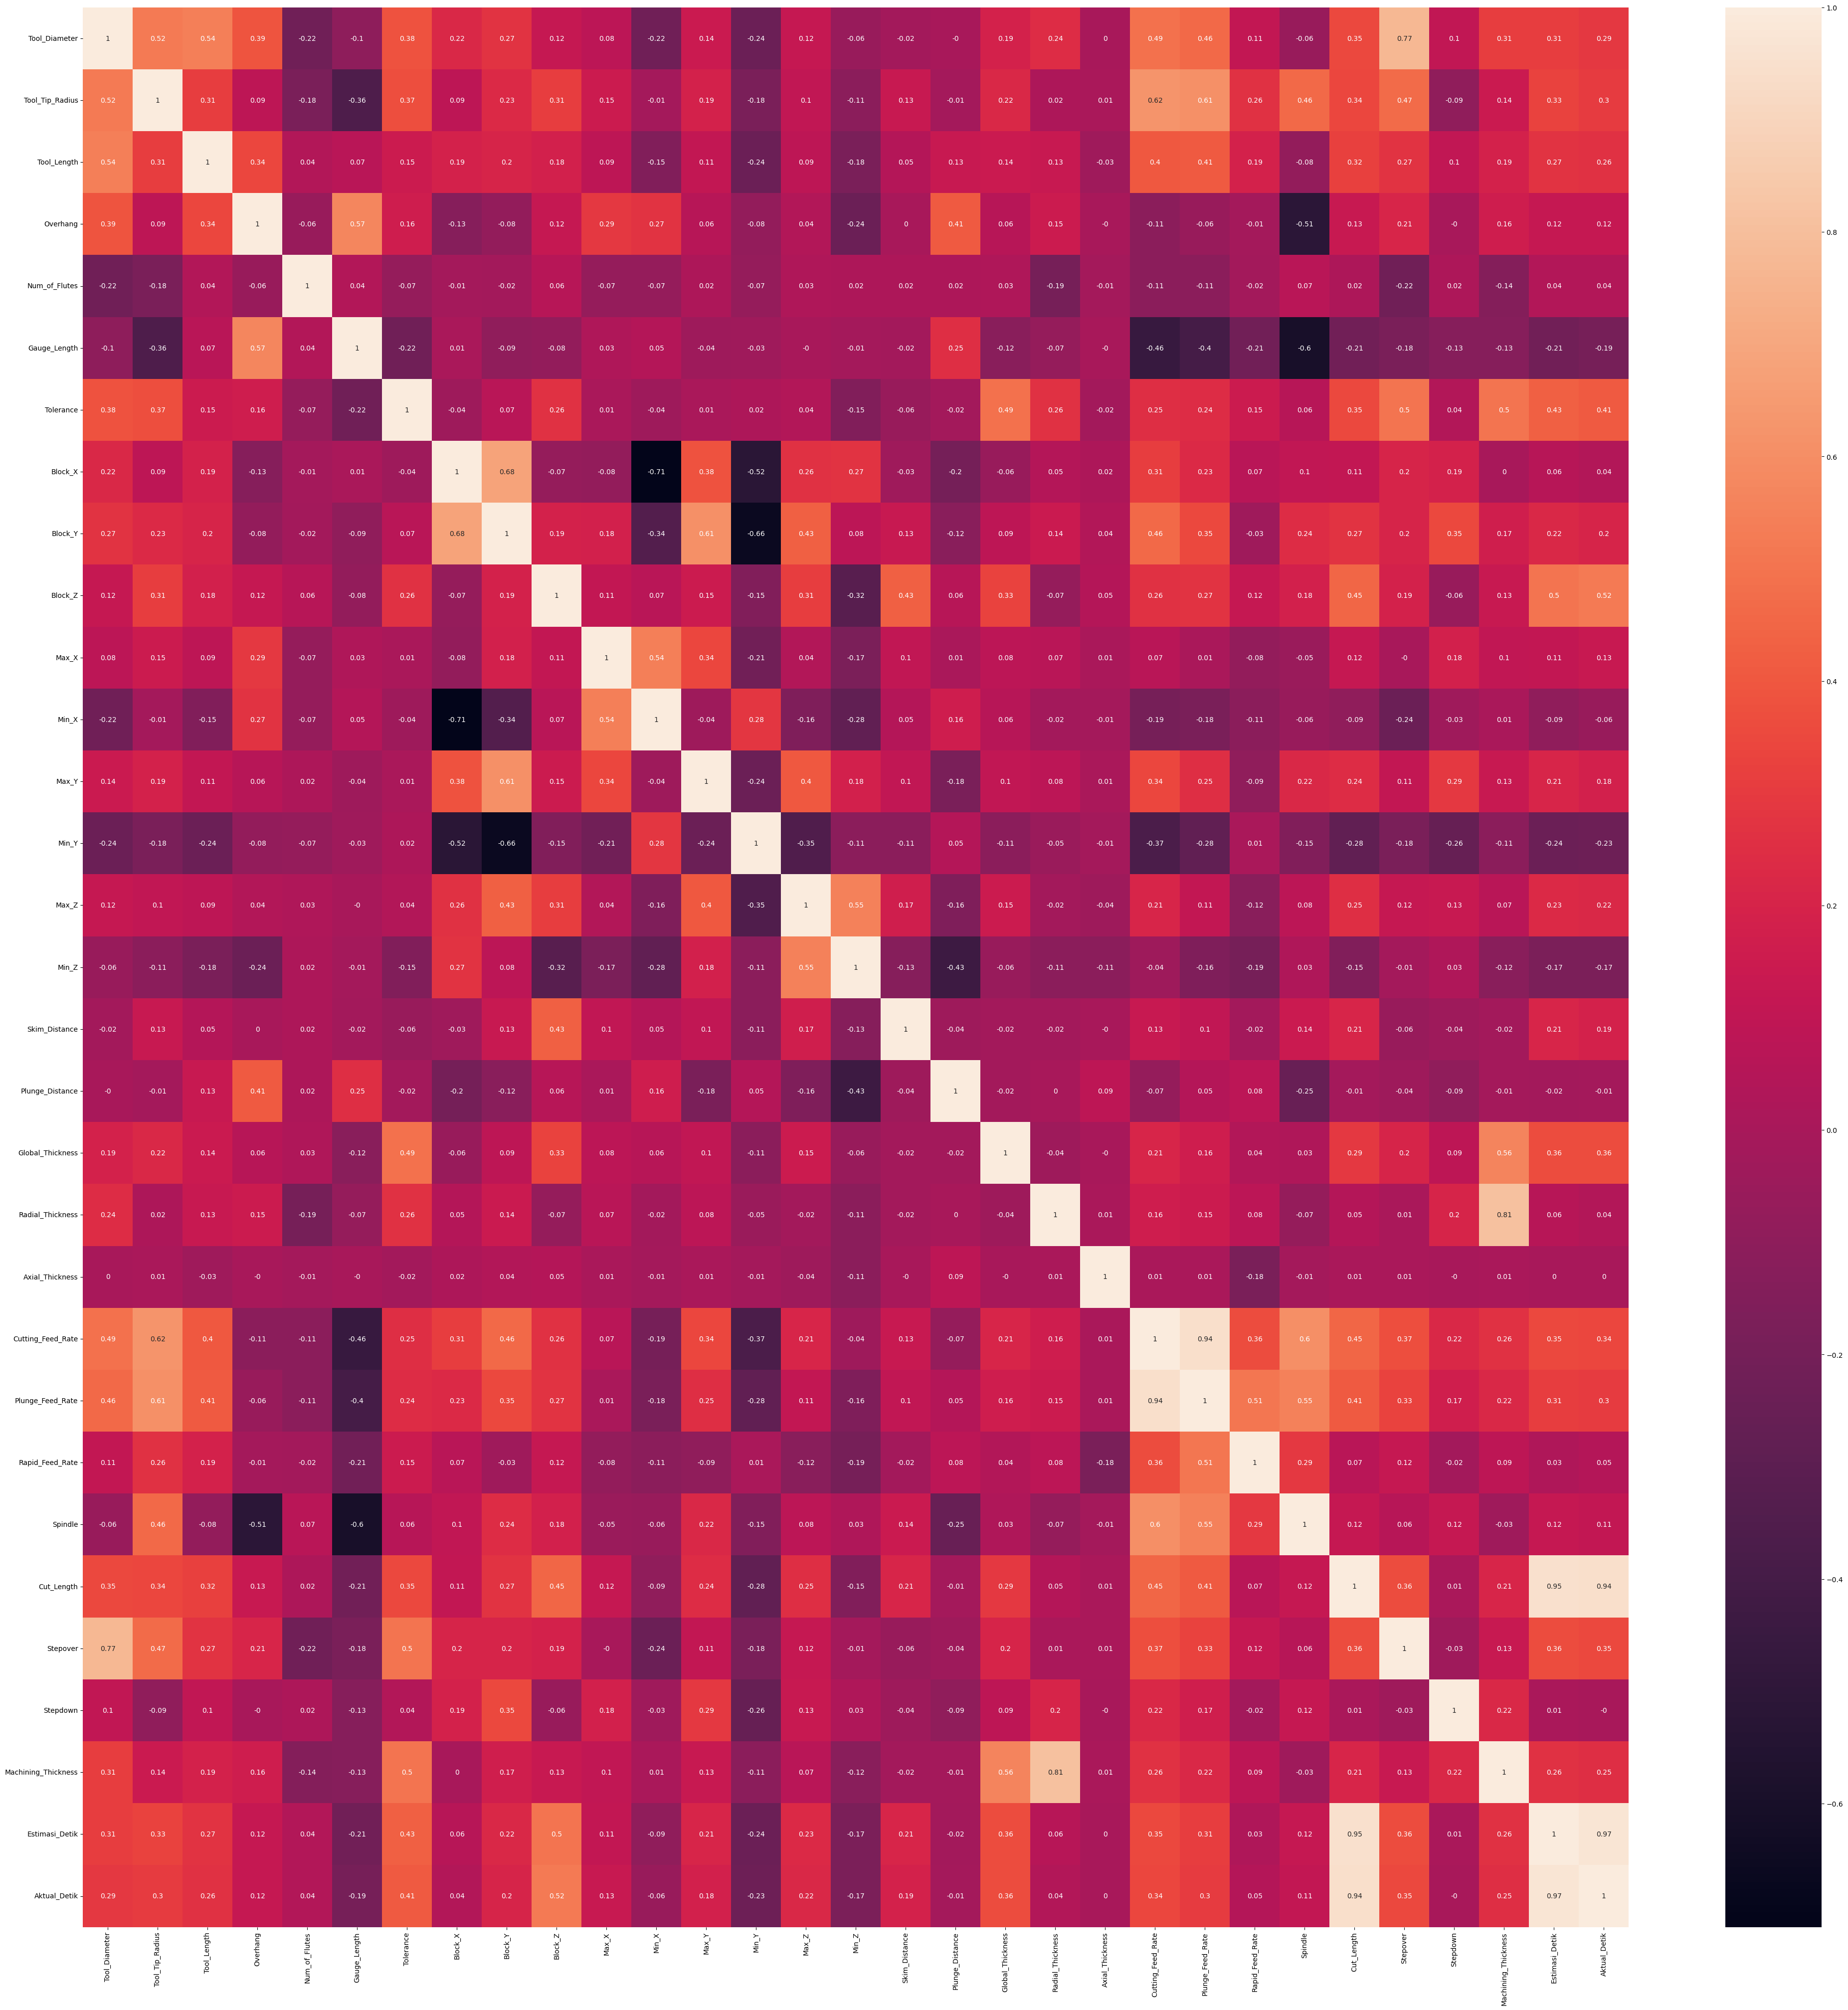

In [17]:
#Visualize Correlation Table With Heat Map

correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize = (50,50)) 
sns.heatmap(data=correlation_matrix, annot = True, ax = ax)

In [18]:
exception = ['Machine', 'Strategy', 'Tool_Type', 'Holder', 'Estimasi_Detik']
num_col = []

for i in df.columns:
    if i not in exception:
        num_col.append(i)
df_out = df[num_col].to_numpy()

# Covariance matrix
covariance  = np.cov(df_out , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df_out , axis=0)


# Distances between center point and 
distances = []
for i, val in enumerate(df_out):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.99, df_out.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )
safeIndexes = np.where(distances <= cutoff)

print('--- Index of Outliers ----')
print(outlierIndexes)

df.iloc[outlierIndexes]

--- Index of Outliers ----
(array([  0,   1,   2,   3,  12,  13,  14,  15,  17,  18,  30,  31,  32,
        37,  38,  39,  43,  50,  51,  52,  74,  83, 119, 157, 162, 165,
       172, 176, 196, 219, 240, 242, 243, 244, 248, 249, 264, 332],
      dtype=int64),)


,Machine,Strategy,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Holder,...,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Estimasi_Detik,Aktual_Detik
0,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.00,60.00,2,108.00,dummy toolholder name,...,2000,1000.0,7000,4000,147521.0000,10.00,0.35,0.30,5846,9386
1,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.00,60.00,2,108.00,dummy toolholder name,...,2000,1000.0,7000,4000,147522.0000,10.00,0.35,0.30,5845,9386
2,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.00,60.00,2,108.00,dummy toolholder name,...,2000,1000.0,7000,4000,147520.0000,10.00,0.35,0.30,5846,9386
3,F1,Offset Area Clearance,Tip Radiused,17.0,3.0,85.00,60.00,2,108.00,dummy toolholder name,...,2000,1000.0,7000,4000,147521.0000,10.00,0.35,0.30,5845,9386
12,F1,Surface Machine,Ball Nosed,6.0,3.0,50.50,31.20,2,115.20,MINI-MINI CHCUK MMC8-90,...,2000,1000.0,7000,9000,55606.6000,0.15,0.00,0.01,2158,2922
13,F1,Surface Machine,Ball Nosed,6.0,3.0,50.50,31.20,2,115.20,MINI-MINI CHCUK MMC8-90,...,2000,1000.0,7000,9000,55606.9000,0.15,0.00,0.01,2158,2926
14,F1,Surface Machine,Ball Nosed,6.0,3.0,50.50,31.20,2,115.20,MINI-MINI CHCUK MMC8-90,...,2000,1000.0,7000,9000,55606.6000,0.15,0.00,0.01,2158,2921
15,F1,Surface Machine,Ball Nosed,6.0,3.0,50.50,31.20,2,115.20,MINI-MINI CHCUK MMC8-90,...,2000,1000.0,7000,9000,55606.9000,0.15,0.00,0.01,2158,2920
17,PRO,Offset Area Clearance,Tip Radiused,17.0,4.0,40.00,45.00,1,113.00,MILLING CHUCK 32,...,2000,1000.0,7000,4000,38929.0000,9.00,0.30,0.30,1255,1426
18,PRO,Offset Flat,Tip Radiused,17.0,4.0,40.00,45.00,1,113.00,MILLING CHUCK 32,...,1500,750.0,7000,4000,1773.8700,6.00,0.00,0.60,82,113


In [19]:
clean_df = df.iloc[safeIndexes].reset_index(drop = True)
clean_df

,Machine,Strategy,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Holder,...,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness,Estimasi_Detik,Aktual_Detik
0,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,1337,668.5,7000,7427,6606.720,3.0,0.30,0.300,537,932
1,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,1337,668.5,7000,7427,5379.750,3.0,0.30,0.300,425,711
2,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,1337,668.5,7000,7427,6838.690,3.0,0.30,0.300,557,958
3,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,1337,668.5,7000,7427,6799.370,3.0,0.30,0.300,553,954
4,F1,Surface Machine,Ball Nosed,6.0,3.0,50.5,31.2,2,115.2,MINI-MINI CHCUK MMC8-90,...,1200,600.0,7000,7000,23385.400,1.0,0.00,0.150,1423,1726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,706.731,0.0,0.50,0.500,43,65
306,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1531.390,0.0,1.00,0.150,93,115
307,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1553.090,0.0,1.00,-0.011,94,116
308,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,1000,500.0,7000,5000,1858.830,0.0,0.25,0.000,115,138


In [20]:
df_summ(clean_df)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Machine,object,0,0.0,4,1.290323
1,Strategy,object,0,0.0,16,5.161290
2,Tool_Type,object,0,0.0,4,1.290323
3,Tool_Diameter,float64,0,0.0,16,5.161290
4,Tool_Tip_Radius,float64,0,0.0,6,1.935484
5,Tool_Length,float64,0,0.0,28,9.032258
6,Overhang,float64,0,0.0,44,14.193548
7,Num_of_Flutes,int64,0,0.0,1,0.322581
8,Gauge_Length,float64,0,0.0,56,18.064516
9,Holder,object,0,0.0,6,1.935484


In [21]:
#Export The Preprocessed Dataset So That We Could Import It Right Away Next Time Without Rerunning The Preprocessing Steps

clean_df.to_csv("bersih_tambahan.csv", index=False)

In [27]:
#Import The Preprocessed Dataset

df = pd.read_csv("bersih_tambahan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine              310 non-null    object 
 1   Strategy             310 non-null    object 
 2   Tool_Type            310 non-null    object 
 3   Tool_Diameter        310 non-null    float64
 4   Tool_Tip_Radius      310 non-null    float64
 5   Tool_Length          310 non-null    float64
 6   Overhang             310 non-null    float64
 7   Num_of_Flutes        310 non-null    int64  
 8   Gauge_Length         310 non-null    float64
 9   Holder               310 non-null    object 
 10  Tolerance            310 non-null    float64
 11  Block_X              310 non-null    float64
 12  Block_Y              310 non-null    float64
 13  Block_Z              310 non-null    float64
 14  Max_X                310 non-null    float64
 15  Min_X                310 non-null    flo

In [28]:
#Split The Dataset Into Predictor (X) and Target (Y) Variables

x = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [5]:
x

,Machine,Strategy,Tool_Type,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Holder,...,Radial_Thickness,Axial_Thickness,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness
0,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1337,668.5,7000,7427,6606.720,3.0,0.30,0.300
1,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1337,668.5,7000,7427,5379.750,3.0,0.30,0.300
2,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1337,668.5,7000,7427,6838.690,3.0,0.30,0.300
3,F1,Offset Area Clearance,Ball Nosed,6.0,3.0,50.5,30.0,2,114.0,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1337,668.5,7000,7427,6799.370,3.0,0.30,0.300
4,F1,Surface Machine,Ball Nosed,6.0,3.0,50.5,31.2,2,115.2,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1200,600.0,7000,7000,23385.400,1.0,0.00,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,0.500,0.0,1000,500.0,7000,5000,706.731,0.0,0.50,0.500
306,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,0.150,0.0,1000,500.0,7000,5000,1531.390,0.0,1.00,0.150
307,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,-0.011,0.0,1000,500.0,7000,5000,1553.090,0.0,1.00,-0.011
308,PRO,Constant Z,End Mill,6.0,0.0,40.0,18.8,2,103.3,MINI-MINI CHCUK MMC8-90,...,0.000,0.0,1000,500.0,7000,5000,1858.830,0.0,0.25,0.000


array([[<AxesSubplot:title={'center':'Tool_Diameter'}>,
        <AxesSubplot:title={'center':'Tool_Tip_Radius'}>,
        <AxesSubplot:title={'center':'Tool_Length'}>,
        <AxesSubplot:title={'center':'Overhang'}>,
        <AxesSubplot:title={'center':'Num_of_Flutes'}>],
       [<AxesSubplot:title={'center':'Gauge_Length'}>,
        <AxesSubplot:title={'center':'Tolerance'}>,
        <AxesSubplot:title={'center':'Block_X'}>,
        <AxesSubplot:title={'center':'Block_Y'}>,
        <AxesSubplot:title={'center':'Block_Z'}>],
       [<AxesSubplot:title={'center':'Max_X'}>,
        <AxesSubplot:title={'center':'Min_X'}>,
        <AxesSubplot:title={'center':'Max_Y'}>,
        <AxesSubplot:title={'center':'Min_Y'}>,
        <AxesSubplot:title={'center':'Max_Z'}>],
       [<AxesSubplot:title={'center':'Min_Z'}>,
        <AxesSubplot:title={'center':'Skim_Distance'}>,
        <AxesSubplot:title={'center':'Plunge_Distance'}>,
        <AxesSubplot:title={'center':'Global_Thickness'}>,
    

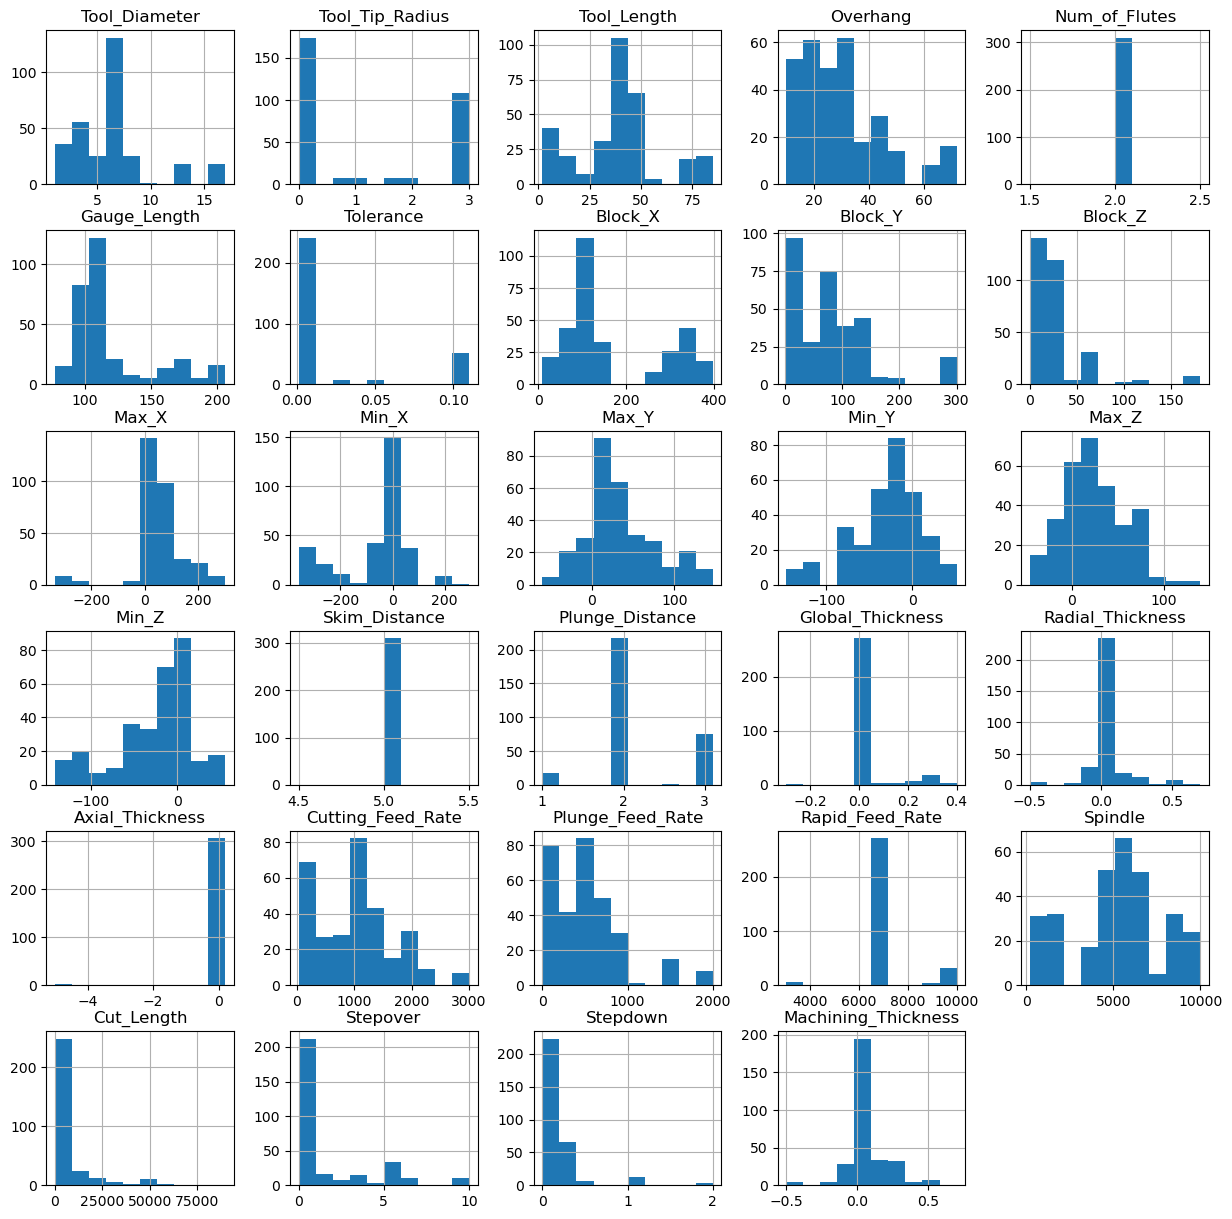

In [6]:
#Check The Variable's Distribution

x.hist(figsize = [15,15])

<AxesSubplot:>

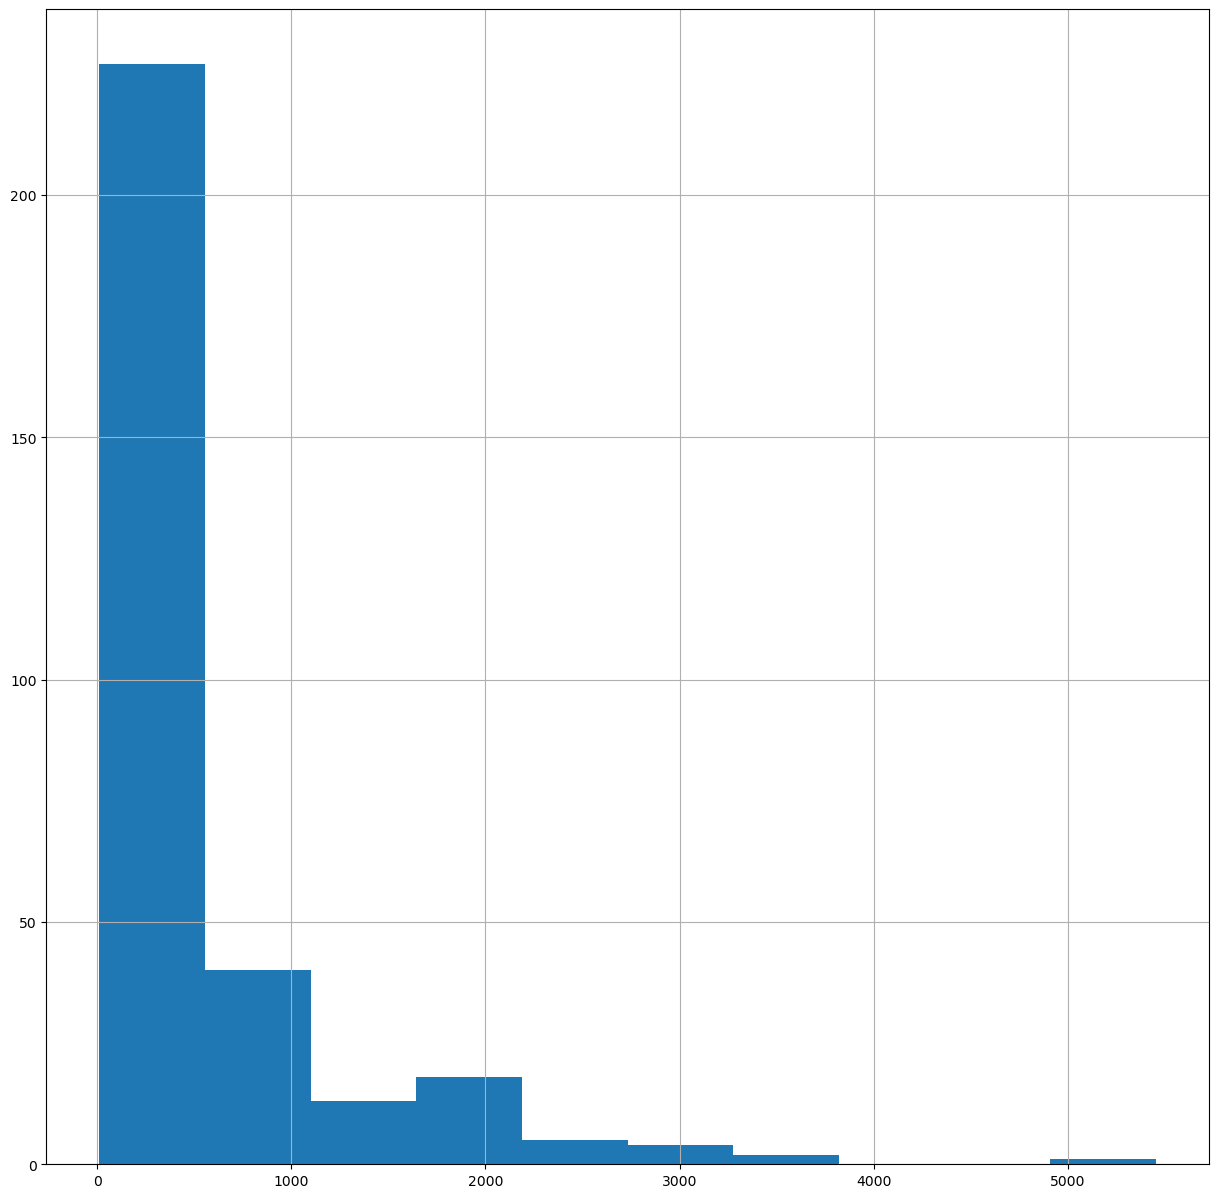

In [7]:
#Check The Target Variable's Distribution

y.hist(figsize = [15,15])

In [29]:
#Convert Categorical Variables To A Dummy (One Hot Encoded) Variables, with The First Level/Class Category Dropped
cat_col = ['Machine', 'Strategy', 'Tool_Type', 'Holder']
x = pd.get_dummies(x, columns = cat_col, drop_first = True)

In [9]:
x

,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Tolerance,Block_X,Block_Y,Block_Z,...,Strategy_Stitch Corner,Strategy_Surface Machine,Tool_Type_Drill,Tool_Type_End Mill,Tool_Type_Tip Radiused,Holder_MINI-MINI CHCUK MMC8-90 TAPER,Holder_SHRINKFITA2,Holder_dummy toolholder name,Holder_michuck2,Holder_mini chuck
0,6.0,3.0,50.5,30.0,2,114.0,0.100,162.000,176.390,176.395,...,0,0,0,0,0,0,0,0,0,0
1,6.0,3.0,50.5,30.0,2,114.0,0.100,162.000,176.390,176.395,...,0,0,0,0,0,0,0,0,0,0
2,6.0,3.0,50.5,30.0,2,114.0,0.100,162.000,176.390,176.395,...,0,0,0,0,0,0,0,0,0,0
3,6.0,3.0,50.5,30.0,2,114.0,0.100,162.000,176.390,176.395,...,0,0,0,0,0,0,0,0,0,0
4,6.0,3.0,50.5,31.2,2,115.2,0.005,144.000,181.381,181.381,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,6.0,0.0,40.0,18.8,2,103.3,0.005,60.000,60.000,3.200,...,0,0,0,1,0,0,0,0,0,0
306,6.0,0.0,40.0,18.8,2,103.3,0.050,60.000,60.000,17.000,...,0,0,0,1,0,0,0,0,0,0
307,6.0,0.0,40.0,18.8,2,103.3,0.005,60.000,60.000,17.000,...,0,0,0,1,0,0,0,0,0,0
308,6.0,0.0,40.0,18.8,2,103.3,0.005,94.000,94.000,14.000,...,0,0,0,1,0,0,0,0,0,0


In [30]:
#Scale The Numerical Predictor Variable.
#We Use Normalization/MinMax Scaler Because The Variables Seem to Have Non-Gaussian (Normal Distribution)

num_col = []
for i in x.columns:
    if i not in cat_col:
        num_col.append(i)
        
minmaxscaler = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
x_minmax = pd.DataFrame(minmaxscaler.fit_transform(x[num_col]), columns = num_col)
x_minmax

,Tool_Diameter,Tool_Tip_Radius,Tool_Length,Overhang,Num_of_Flutes,Gauge_Length,Tolerance,Block_X,Block_Y,Block_Z,...,Strategy_Stitch Corner,Strategy_Surface Machine,Tool_Type_Drill,Tool_Type_End Mill,Tool_Type_Tip Radiused,Holder_MINI-MINI CHCUK MMC8-90 TAPER,Holder_SHRINKFITA2,Holder_dummy toolholder name,Holder_michuck2,Holder_mini chuck
0,0.3125,1.0,0.584337,0.322581,0.0,0.286268,0.908257,0.392144,0.585619,0.972511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3125,1.0,0.584337,0.322581,0.0,0.286268,0.908257,0.392144,0.585619,0.972511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3125,1.0,0.584337,0.322581,0.0,0.286268,0.908257,0.392144,0.585619,0.972511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3125,1.0,0.584337,0.322581,0.0,0.286268,0.908257,0.392144,0.585619,0.972511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.3125,1.0,0.584337,0.341935,0.0,0.295578,0.036697,0.345782,0.602350,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.3125,0.0,0.457831,0.141935,0.0,0.203258,0.036697,0.129427,0.195441,0.017642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
306,0.3125,0.0,0.457831,0.141935,0.0,0.203258,0.449541,0.129427,0.195441,0.093725,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.3125,0.0,0.457831,0.141935,0.0,0.203258,0.036697,0.129427,0.195441,0.093725,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.3125,0.0,0.457831,0.141935,0.0,0.203258,0.036697,0.216999,0.309420,0.077186,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Split Dataset Into Training and Testing Dataset

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x_minmax, y, test_size = 0.2, random_state = 15)

# Data Modelling

In [8]:
#Try Model With All 55 Independent Variables

X_train_ols = sm.add_constant(X_train)

regmodel = sm.OLS(y_train, X_train_ols).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Aktual_Detik   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     36.93
Date:                Sun, 28 May 2023   Prob (F-statistic):           1.03e-76
Time:                        18:02:50   Log-Likelihood:                -1701.2
No. Observations:                 248   AIC:                             3506.
Df Residuals:                     196   BIC:                             3689.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  410.3785    571.441      0.718      0.474    -716.583    1537.340
Tool_Diameter                          235.9833    404.291      0.584      0.560    -561.336    1033.303
Tool_Tip_Radius                        230.1622    183.513      1.254      0.211    -131.752     592.077
Tool_Length                           -143.9763    179.427     -0.802      0.423    -497.832     209.880
Overhang                               900.6815    321.615      2.800      0.006     266.410    1534.953
Num_of_Flutes                        -3.417e-13   9.61e-13     -0.355      0.723   -2.24e-12    1.55e-12
Gauge_Length                         -1238.4480    484.119     -2.558      0.011   -2193.199    -283.697
Tolerance                               46.5621    139.895      0.333      0.740    -229.330     322.454
Block_X                               -197.5961    180.897     -1.092      0.276    -554.351     159.159
Block_Y                                -42.2105    249.822     -0.169      0.866    -534.895     450.474
Block_Z                                241.6387    207.179      1.166      0.245    -166.947     650.224
Max_X                                  289.6380    244.863      1.183      0.238    -193.266     772.542
Min_X                                 -442.6105    239.534     -1.848      0.066    -915.006      29.785
Max_Y                                   36.5877    171.113      0.214      0.831    -300.872     374.047
Min_Y                                 -148.6706    161.884     -0.918      0.360    -467.928     170.587
Max_Z                                 -418.0818    197.159     -2.121      0.035    -806.908     -29.256
Min_Z                                  226.1560    181.420      1.247      0.214    -131.630     583.942
Skim_Distance                        -1.942e-13   3.64e-13     -0.533      0.595   -9.13e-13    5.24e-13
Plunge_Distance                       -367.1366    152.582     -2.406      0.017    -668.050     -66.223
Global_Thickness                       212.2112    212.128      1.000      0.318    -206.135     630.557
Radial_Thickness                       175.9838    134.870      1.305      0.193     -89.999     441.966
Axial_Thickness                          6.8010    251.666      0.027      0.978    -489.520     503.122
Cutting_Feed_Rate                    -1080.6932    372.073     -2.905      0.004   -1814.473    -346.913
Plunge_Feed_Rate                       234.3351    367.129      0.638      0.524    -489.696     958.366
Rapid_Feed_Rate                        -88.4267    179.072     -0.494      0.622    -441.583     264.729
Spindle                                243.0699    314.050      0.774      0.440    -376.280     862.420
Cut_Length                            

In [9]:
#Evaluate The First Model With 55 Independent Variables
X_test_ols = sm.add_constant(X_test, has_constant='add')
y_pred = regmodel.predict(X_test_ols)

print('R2: %.3f' % sklearn.metrics.r2_score(y_test, y_pred))
print('Adjusted R2: %.3f' % (1 - (1 - sklearn.metrics.r2_score(y_test, y_pred)) * (len(y_pred) - 1) / (len(y_pred) - 55 - 1)))
print('Mean Absolute Error: %.3f' % sklearn.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: %.3f' % sklearn.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error: %.3f' % np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

R2: 0.899
Adjusted R2: -0.023
Mean Absolute Error: 146.769
Mean Squared Error: 37145.614
Root Mean Squared Error: 192.732


# COBAA LASSO

In [10]:
#Searching for An Optimal Number of Independent Variable

# step-1: specify range of hyperparameters to tune
hyper_params = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]


# step-2: perform grid search
# 2.1 specify model
lasso = Lasso(max_iter = 10e5)     

# 2.2 call GridSearchCV()
model_cv = sklearn.model_selection.GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= ['r2', 'neg_root_mean_squared_error'],
                        refit = 'neg_root_mean_squared_error',
                        verbose = 1,
                        return_train_score = True)      

# fit the model
model_cv.fit(X_train, y_train)

#Save The Result into A Dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.303090,0.106047,0.001235,0.000424,0.001,{'alpha': 0.001},0.778300,0.734669,0.806840,0.884804,...,-383.509371,155.755987,5,-217.635628,-212.805362,-207.694085,-244.954959,-226.720681,-221.962143,13.095466
1,0.030284,0.010387,0.001018,0.000033,0.01,{'alpha': 0.01},0.782943,0.736765,0.806742,0.885211,...,-365.294969,125.238080,4,-217.649348,-212.815871,-207.698697,-244.962138,-226.741713,-221.973553,13.096135
2,0.008184,0.003149,0.000381,0.000468,0.1,{'alpha': 0.1},0.815100,0.753419,0.805399,0.889120,...,-297.561722,57.414134,2,-218.675605,-213.667650,-208.151866,-245.568641,-227.759031,-222.764558,13.099428
3,0.002262,0.000388,0.001042,0.000052,1,{'alpha': 1},0.836810,0.792106,0.814685,0.912801,...,-287.140667,60.261723,1,-231.806940,-235.481569,-219.247647,-259.290338,-239.114486,-236.988196,13.005761
4,0.001213,0.000396,0.000859,0.000436,10,{'alpha': 10},0.775973,0.756144,0.818922,0.888798,...,-323.605114,71.501901,3,-300.380781,-297.169751,-303.540019,-326.608034,-298.678522,-305.275421,10.874470
5,0.001209,0.000399,0.000601,0.000491,100,{'alpha': 100},0.158437,0.196913,0.057847,0.148428,...,-683.720712,107.611630,6,-687.210631,-704.433105,-642.457914,-707.196794,-665.750277,-681.409744,24.458787
6,0.001034,0.000038,0.001004,0.000006,1000,{'alpha': 1000},-0.029470,-0.026276,-0.022039,-0.087662,...,-747.763636,102.382508,7,-738.940655,-770.666321,-742.544328,-785.826696,-714.420810,-750.479762,25.112837


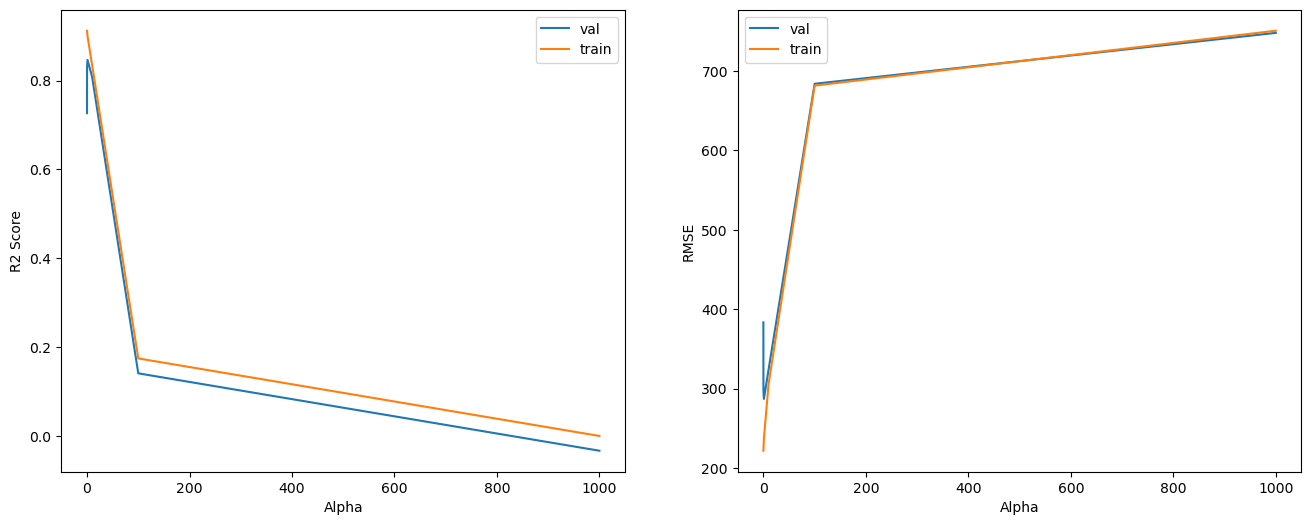

In [11]:
# plotting cv results
fig, ax = plt.subplots(1, 2, figsize = (16,6))

ax[0].plot(cv_results["param_alpha"], cv_results["mean_test_r2"])
ax[0].plot(cv_results["param_alpha"], cv_results["mean_train_r2"])
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R2 Score')
ax[0].legend(['val', 'train'])

ax[1].plot(cv_results["param_alpha"], -cv_results["mean_test_neg_root_mean_squared_error"])
ax[1].plot(cv_results["param_alpha"], -cv_results["mean_train_neg_root_mean_squared_error"])
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].legend(['val', 'train'])

In [12]:
model_cv.best_params_

{'alpha': 1}

In [13]:
lasso = Lasso(alpha=1, max_iter = 10e5).fit(X_train, y_train)

scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error', 'r2':'r2'}

scores = sklearn.model_selection.cross_validate(lasso, X_train.values, y_train.values, scoring=scoring,
                                                return_train_score=True, return_estimator = True)

In [14]:
print('\nTraining R2: %.3f' % scores['train_r2'].mean())
# print('Training Adjusted R2: %.3f' % (1 - (1 - train_score) * (len(y_test) - 1) / (len(y_test) - coeff_used - 1)))
print('Training Mean Absolute Error: %.3f' % -scores['train_abs_error'].mean())
print('Training Root Mean Squared Error: %.3f' % np.sqrt(-scores['train_squared_error'].mean()))

print('\nValidation R2: %.3f' % scores['test_r2'].mean())
# print('Testing Adjusted R2: %.3f' % (1 - (1 - test_score) * (len(y_test) - 1) / (len(y_test) - coeff_used - 1)))
print('Val. Mean Absolute Error: %.3f' % -scores['test_abs_error'].mean())
print('Val. Root Mean Squared Error: %.3f' % np.sqrt(-scores['test_squared_error'].mean()))


Training R2: 0.900
Training Mean Absolute Error: 142.815
Training Root Mean Squared Error: 237.345

Validation R2: 0.847
Val. Mean Absolute Error: 176.649
Val. Root Mean Squared Error: 293.396


In [15]:
y_pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

In [16]:
coeff_used = np.sum(lasso.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(lasso.coef_ != 0):
    print(X_test.columns[i])

# print('\nTraining R2: %.3f' % train_score)
# print('Training Adjusted R2: %.3f' % (1 - (1 - train_score) * (len(y_test) - 1) / (len(y_test) - coeff_used - 1)))

print('\nTesting R2: %.3f' % test_score)
print('Testing Adjusted R2: %.3f' % (1 - (1 - test_score) * (len(y_test) - 1) / (len(y_test) - coeff_used - 1)))

print('\nTesting Mean Absolute Error: %.3f' % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Testing Root Mean Squared Error: %.3f' % np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

Features Used:  30
Index(['Tool_Tip_Radius', 'Tool_Length', 'Tolerance', 'Block_Y', 'Block_Z',
       'Min_X', 'Min_Y', 'Max_Z', 'Plunge_Distance', 'Global_Thickness',
       'Cutting_Feed_Rate', 'Rapid_Feed_Rate', 'Spindle', 'Cut_Length',
       'Stepover', 'Machining_Thickness', 'Machine_MATRIX', 'Machine_PRO',
       'Machine_SPLUS', 'Strategy_Along Corner', 'Strategy_Constant Z',
       'Strategy_Offset Area Clearance', 'Strategy_Offset Flat',
       'Strategy_Pattern', 'Strategy_Raster', 'Strategy_Rotary',
       'Strategy_Surface Machine', 'Holder_SHRINKFITA2',
       'Holder_dummy toolholder name', 'Holder_mini chuck'],
      dtype='object')

Testing R2: 0.911
Testing Adjusted R2: 0.825

Testing Mean Absolute Error: 141.802
Testing Root Mean Squared Error: 181.235


In [17]:
lasso.coef_

array([   0.        ,   36.26101286,  -37.8902761 ,    0.        ,
          0.        ,   -0.        ,   15.65394925,    0.        ,
        -94.17852813,  233.33998024,    0.        ,  -93.54914547,
         -0.        , -112.89436403, -134.43118773,    0.        ,
          0.        , -109.22605636,  183.89091922,    0.        ,
          0.        , -452.11610791,   -0.        ,   24.77076215,
        133.96062959, 4525.20043491, -866.18088611,    0.        ,
        324.61383492,  -42.82347881,  -54.05499819, -125.31776562,
         59.10955943,  -18.29792445,   -0.        ,    0.        ,
         -0.        ,  510.28908262,  335.69431597,    0.        ,
        378.7514256 ,   -0.        ,    0.        ,  -79.06940493,
        190.40014028,   -0.        ,  122.87378785,   -0.        ,
          0.        ,    0.        ,   -0.        ,   12.20226162,
        -19.20495632,   -0.        ,  -22.7343999 ])

In [18]:
lasso.intercept_

251.6964158808936

In [19]:
#Create Dataframe For The Resulted Time Estimation

result = pd.DataFrame()
result['aktual'] = y_test
result['pred'] = y_pred

result

,aktual,pred
80,120,178.866334
52,82,311.636480
254,150,188.826012
170,59,163.939223
264,891,1015.332089
...,...,...
200,12,-125.554733
30,160,202.444995
121,120,224.873243
249,1698,1572.413185


In [20]:
#Convert From Seconds Unit Back Into Timestamp (HH:mm:ss) Format

result['Aktual'] = result['aktual'].apply(lambda row: str(datetime.timedelta(seconds=int(row))))
result['Estimasi'] = result['pred'].apply(lambda row: str(datetime.timedelta(seconds=int(row))))

result

,aktual,pred,Aktual,Estimasi
80,120,178.866334,0:02:00,0:02:58
52,82,311.636480,0:01:22,0:05:11
254,150,188.826012,0:02:30,0:03:08
170,59,163.939223,0:00:59,0:02:43
264,891,1015.332089,0:14:51,0:16:55
...,...,...,...,...
200,12,-125.554733,0:00:12,"-1 day, 23:57:55"
30,160,202.444995,0:02:40,0:03:22
121,120,224.873243,0:02:00,0:03:44
249,1698,1572.413185,0:28:18,0:26:12


# Neural Network

## Tensorflow Keras 

In [9]:
class MyHyperModel(HyperModel):
    def build(self, hyperparams):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
        for i in range(hyperparams.Int('layers', 1, 5)):
            model.add(tf.keras.layers.Dense(units=hyperparams.Int('units_l' + str(i+1), 2, 128, step = 2, sampling = 'log'),
                            use_bias=True,
                            #                         bias_initializer = hyperparams.Choice("bias_l"+str(i+1), ["glorot_normal", "glorot_uniform","he_normal", "he_uniform", "truncated_normal", "variance_scaling"]),
                            activation=hyperparams.Choice("act_l" + str(i+1), ["relu", "sigmoid"]),
#                             kernel_initializer = hyperparams.Choice("kernel_l"+str(i+1), ["glorot_normal", "glorot_uniform","he_normal", "he_uniform"]),
#                             kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                    l2=hyperparams.Float("L2_K"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                   ),
#                             bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_B"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 ),
#                             activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                      l2=hyperparams.Float("L2_A"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                     )
                           ))
            
            if hyperparams.Boolean('Dropout_l'+str(i+1)):
                model.add(tf.keras.layers.Dropout(rate=hyperparams.Float("droprate_l" + str(i+1), 0.25, 0.5, step = 0.25)))
                
        model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                        use_bias=True,
#                         kernel_initializer = hyperparams.Choice("kernel_o", ["he_normal", "he_uniform"]),
                        #                     bias_initializer = hyperparams.Choice("bias_o", ["he_normal", "he_uniform"]),
#                         kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ko", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                l2=hyperparams.Float("L2_Ko", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                               ),
#                         bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Bo", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                              l2=hyperparams.Float("L2_Bo", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                             ),
#                         activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ao", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_Ao", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 )
                       ))
        
        optim=hyperparams.Choice("optimizer",["adam","rmsprop"])
        model.compile(optimizer = optim, loss="mean_squared_error", metrics=["mean_squared_error"])
        
        return model
    
    def fit(self, hyperparams, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hyperparams.Int("batch_size", min_value=2,max_value=64, step = 2, sampling='log'),
            **kwargs,
        )

In [10]:
tuner =  BayesianOptimization(hypermodel=MyHyperModel(),
                              objective="val_mean_squared_error",
                              max_trials = 1000,
                              seed = 15,
                              project_name="Coba 5 May 1am",
                              directory = "Coba_nn_rev",
                              overwrite = True
                             )

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
tuner.search(X_train.values, y_train.values, epochs=2000, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters

tuner.get_best_hyperparameters()[0].values

Trial 1000 Complete [00h 00m 45s]
val_mean_squared_error: 93750.3828125

Best val_mean_squared_error So Far: 68933.53125
Total elapsed time: 1d 14h 41m 09s
INFO:tensorflow:Oracle triggered exit


{'layers': 3,
 'units_l1': 128,
 'act_l1': 'relu',
 'Dropout_l1': False,
 'optimizer': 'rmsprop',
 'units_l2': 128,
 'act_l2': 'relu',
 'Dropout_l2': True,
 'units_l3': 16,
 'act_l3': 'relu',
 'Dropout_l3': False,
 'units_l4': 32,
 'act_l4': 'relu',
 'Dropout_l4': True,
 'units_l5': 16,
 'act_l5': 'relu',
 'Dropout_l5': True,
 'batch_size': 8,
 'droprate_l1': 0.25,
 'droprate_l2': 0.5,
 'droprate_l3': 0.5,
 'droprate_l4': 0.25,
 'droprate_l5': 0.25}

In [11]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7168      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 25,761
Trainable params: 25,761
Non-trainable params: 0
_________________________________________________________________


In [24]:
class MyHyperModel(HyperModel):
    def build(self, hyperparams):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
        for i in range(hyperparams.Int('layers', 1, 5)):
            model.add(tf.keras.layers.Dense(units=2**(6-i),
                            use_bias=True,
                            #                         bias_initializer = hyperparams.Choice("bias_l"+str(i+1), ["glorot_normal", "glorot_uniform","he_normal", "he_uniform", "truncated_normal", "variance_scaling"]),
                            activation=hyperparams.Choice("act_l" + str(i+1), ["relu", "sigmoid"]),
#                             kernel_initializer = hyperparams.Choice("kernel_l"+str(i+1), ["glorot_normal", "glorot_uniform","he_normal", "he_uniform"]),
#                             kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                    l2=hyperparams.Float("L2_K"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                   ),
#                             bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_B"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 ),
#                             activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                      l2=hyperparams.Float("L2_A"+str(i+1), 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                     )
                           ))
            
#             if hyperparams.Boolean('Dropout_l'+str(i+1)):
#                 model.add(tf.keras.layers.Dropout(rate=hyperparams.Float("droprate_l" + str(i+1), 0.25, 0.5, step = 0.25)))
                
        model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                        use_bias=True,
#                         kernel_initializer = hyperparams.Choice("kernel_o", ["he_normal", "he_uniform"]),
                        #                     bias_initializer = hyperparams.Choice("bias_o", ["he_normal", "he_uniform"]),
#                         kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ko", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                l2=hyperparams.Float("L2_Ko", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                               ),
#                         bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Bo", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                              l2=hyperparams.Float("L2_Bo", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                             ),
#                         activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ao", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_Ao", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 )
                       ))
        
#         optim=hyperparams.Choice("optimizer",["adam","rmsprop"])
        model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
        
        return model
    
    def fit(self, hyperparams, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hyperparams.Int("batch_size", min_value=2,max_value=64, step = 2, sampling='log'),
            **kwargs,
        )

In [25]:
tuner =  BayesianOptimization(hypermodel=MyHyperModel(),
                              objective="val_mean_squared_error",
                              max_trials = 500,
                              seed = 15,
                              project_name="Coba 10 May 9am",
                              directory = "Coba_nn_rev",
                              overwrite = True
                             )

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
tuner.search(X_train.values, y_train.values, epochs=2000, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters

tuner.get_best_hyperparameters()[0].values

Trial 500 Complete [00h 02m 11s]
val_mean_squared_error: 119936.609375

Best val_mean_squared_error So Far: 64565.36328125
Total elapsed time: 18h 35m 27s
INFO:tensorflow:Oracle triggered exit


{'layers': 2,
 'act_l1': 'relu',
 'act_l2': 'relu',
 'act_l3': 'sigmoid',
 'act_l4': 'relu',
 'act_l5': 'relu',
 'batch_size': 8}

In [8]:
best_model = tuner.get_best_models()[0]
best_model.summary()

NameError: name 'tuner' is not defined

In [11]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
    model.add(tf.keras.layers.Dense(units=64,
                    activation= "relu",
                    use_bias=True,
#                     bias_initializer = "he_uniform",
#                     kernel_initializer = "he_normal",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=1.0, l2=0.001),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 0.1),
#                     activity_regularizer = tf.keras.regularizers.L2(l2=0.1)
                   ))
    
    model.add(tf.keras.layers.Dense(units=32,
                    activation= "relu",
                    use_bias=True,
#                     bias_initializer = "glorot_uniform",
#                     kernel_initializer = "glorot_normal",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.001),
#                     activity_regularizer = tf.keras.regularizers.L2(l2=1.00)
                   ))
    
#     model.add(tf.keras.layers.Dense(units=16,
#                     activation= "relu",
#                     use_bias=True,
#                     bias_initializer = "he_uniform",
#                     kernel_initializer = "he_uniform",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.1, l2=0.01),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
#                     activity_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.1)
#                    ))                      
    
#     model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                    use_bias=True,
#                     bias_initializer = "he_uniform",
#                     kernel_initializer = "he_uniform",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=1.00, l2=0.1),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
#                     activity_regularizer = tf.keras.regularizers.L1(l1=0.01)
                   ))
    
    model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
    
    return model

In [12]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
mc = tf.keras.callbacks.ModelCheckpoint('best_model_110523_7am.h5', monitor='val_mean_squared_error', verbose=1, save_best_only=True)

model = build_model()
history = model.fit(X_train.values, y_train.values, epochs=2000, batch_size=8, verbose=2, shuffle = False,
                           validation_split = 0.2, callbacks = [stop_early, mc])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 1060600.25000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 788761.7500 - mean_squared_error: 788761.7500 - val_loss: 1060600.2500 - val_mean_squared_error: 1060600.2500 - 339ms/epoch - 14ms/step
Epoch 2/2000

Epoch 2: val_loss improved from 1060600.25000 to 1054932.00000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 785384.5000 - mean_squared_error: 785384.5000 - val_loss: 1054932.0000 - val_mean_squared_error: 1054932.0000 - 64ms/epoch - 3ms/step
Epoch 3/2000

Epoch 3: val_loss improved from 1054932.00000 to 1039029.81250, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 775648.3125 - mean_squared_error: 775648.3125 - val_loss: 1039029.8125 - val_mean_squared_error: 1039029.8125 - 55ms/epoch - 2ms/step
Epoch 4/2000

Epoch 4: val_loss improved from 1039029.81250 to 1005773.93750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 752347.5000 - mean_squared_error: 752347.5000 - val_lo

25/25 - 0s - loss: 334428.6562 - mean_squared_error: 334428.6562 - val_loss: 556986.9375 - val_mean_squared_error: 556986.9375 - 58ms/epoch - 2ms/step
Epoch 32/2000

Epoch 32: val_loss improved from 556986.93750 to 551508.37500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 330532.1875 - mean_squared_error: 330532.1875 - val_loss: 551508.3750 - val_mean_squared_error: 551508.3750 - 51ms/epoch - 2ms/step
Epoch 33/2000

Epoch 33: val_loss improved from 551508.37500 to 546186.37500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 326774.9375 - mean_squared_error: 326774.9375 - val_loss: 546186.3750 - val_mean_squared_error: 546186.3750 - 54ms/epoch - 2ms/step
Epoch 34/2000

Epoch 34: val_loss improved from 546186.37500 to 541018.00000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 323154.8750 - mean_squared_error: 323154.8750 - val_loss: 541018.0000 - val_mean_squared_error: 541018.0000 - 53ms/epoch - 2ms/step
Epoch 35/2000

Epoch 35: val_loss impro

Epoch 62/2000

Epoch 62: val_loss improved from 438850.90625 to 436033.46875, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 247386.3281 - mean_squared_error: 247386.3281 - val_loss: 436033.4688 - val_mean_squared_error: 436033.4688 - 52ms/epoch - 2ms/step
Epoch 63/2000

Epoch 63: val_loss improved from 436033.46875 to 433222.00000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 245086.6250 - mean_squared_error: 245086.6250 - val_loss: 433222.0000 - val_mean_squared_error: 433222.0000 - 54ms/epoch - 2ms/step
Epoch 64/2000

Epoch 64: val_loss improved from 433222.00000 to 430499.09375, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 242824.2812 - mean_squared_error: 242824.2812 - val_loss: 430499.0938 - val_mean_squared_error: 430499.0938 - 56ms/epoch - 2ms/step
Epoch 65/2000

Epoch 65: val_loss improved from 430499.09375 to 427798.37500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 240590.3594 - mean_squared_error: 240590.3594 - val_

25/25 - 0s - loss: 186789.8438 - mean_squared_error: 186789.8438 - val_loss: 365654.2812 - val_mean_squared_error: 365654.2812 - 52ms/epoch - 2ms/step
Epoch 93/2000

Epoch 93: val_loss improved from 365654.28125 to 363556.43750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 185000.3281 - mean_squared_error: 185000.3281 - val_loss: 363556.4375 - val_mean_squared_error: 363556.4375 - 52ms/epoch - 2ms/step
Epoch 94/2000

Epoch 94: val_loss improved from 363556.43750 to 361464.00000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 183224.4062 - mean_squared_error: 183224.4062 - val_loss: 361464.0000 - val_mean_squared_error: 361464.0000 - 69ms/epoch - 3ms/step
Epoch 95/2000

Epoch 95: val_loss improved from 361464.00000 to 359361.00000, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 181466.8125 - mean_squared_error: 181466.8125 - val_loss: 359361.0000 - val_mean_squared_error: 359361.0000 - 52ms/epoch - 2ms/step
Epoch 96/2000

Epoch 96: val_loss impro

Epoch 123/2000

Epoch 123: val_loss improved from 303634.81250 to 301636.87500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 138394.6094 - mean_squared_error: 138394.6094 - val_loss: 301636.8750 - val_mean_squared_error: 301636.8750 - 53ms/epoch - 2ms/step
Epoch 124/2000

Epoch 124: val_loss improved from 301636.87500 to 299619.21875, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 137086.3594 - mean_squared_error: 137086.3594 - val_loss: 299619.2188 - val_mean_squared_error: 299619.2188 - 50ms/epoch - 2ms/step
Epoch 125/2000

Epoch 125: val_loss improved from 299619.21875 to 297599.31250, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 135790.5156 - mean_squared_error: 135790.5156 - val_loss: 297599.3125 - val_mean_squared_error: 297599.3125 - 54ms/epoch - 2ms/step
Epoch 126/2000

Epoch 126: val_loss improved from 297599.31250 to 295583.12500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 134510.9531 - mean_squared_error: 134510.953

25/25 - 0s - loss: 106000.2891 - mean_squared_error: 106000.2891 - val_loss: 244509.6250 - val_mean_squared_error: 244509.6250 - 57ms/epoch - 2ms/step
Epoch 154/2000

Epoch 154: val_loss improved from 244509.62500 to 242729.20312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 105141.4375 - mean_squared_error: 105141.4375 - val_loss: 242729.2031 - val_mean_squared_error: 242729.2031 - 52ms/epoch - 2ms/step
Epoch 155/2000

Epoch 155: val_loss improved from 242729.20312 to 240983.79688, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 104298.1797 - mean_squared_error: 104298.1797 - val_loss: 240983.7969 - val_mean_squared_error: 240983.7969 - 61ms/epoch - 2ms/step
Epoch 156/2000

Epoch 156: val_loss improved from 240983.79688 to 239255.48438, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 103466.7109 - mean_squared_error: 103466.7109 - val_loss: 239255.4844 - val_mean_squared_error: 239255.4844 - 59ms/epoch - 2ms/step
Epoch 157/2000

Epoch 157: val_lo

Epoch 184/2000

Epoch 184: val_loss improved from 197284.37500 to 195912.07812, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 84471.4922 - mean_squared_error: 84471.4922 - val_loss: 195912.0781 - val_mean_squared_error: 195912.0781 - 54ms/epoch - 2ms/step
Epoch 185/2000

Epoch 185: val_loss improved from 195912.07812 to 194539.87500, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 83909.2891 - mean_squared_error: 83909.2891 - val_loss: 194539.8750 - val_mean_squared_error: 194539.8750 - 54ms/epoch - 2ms/step
Epoch 186/2000

Epoch 186: val_loss improved from 194539.87500 to 193181.93750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 83350.7656 - mean_squared_error: 83350.7656 - val_loss: 193181.9375 - val_mean_squared_error: 193181.9375 - 51ms/epoch - 2ms/step
Epoch 187/2000

Epoch 187: val_loss improved from 193181.93750 to 191835.93750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 82799.4609 - mean_squared_error: 82799.4609 - val_

25/25 - 0s - loss: 70131.6719 - mean_squared_error: 70131.6719 - val_loss: 159850.5156 - val_mean_squared_error: 159850.5156 - 55ms/epoch - 2ms/step
Epoch 215/2000

Epoch 215: val_loss improved from 159850.51562 to 158833.81250, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 69736.3203 - mean_squared_error: 69736.3203 - val_loss: 158833.8125 - val_mean_squared_error: 158833.8125 - 56ms/epoch - 2ms/step
Epoch 216/2000

Epoch 216: val_loss improved from 158833.81250 to 157865.40625, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 69352.9297 - mean_squared_error: 69352.9297 - val_loss: 157865.4062 - val_mean_squared_error: 157865.4062 - 53ms/epoch - 2ms/step
Epoch 217/2000

Epoch 217: val_loss improved from 157865.40625 to 156869.93750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 68974.7500 - mean_squared_error: 68974.7500 - val_loss: 156869.9375 - val_mean_squared_error: 156869.9375 - 56ms/epoch - 2ms/step
Epoch 218/2000

Epoch 218: val_loss impro

Epoch 245/2000

Epoch 245: val_loss improved from 135297.32812 to 134655.65625, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 60317.3438 - mean_squared_error: 60317.3438 - val_loss: 134655.6562 - val_mean_squared_error: 134655.6562 - 54ms/epoch - 2ms/step
Epoch 246/2000

Epoch 246: val_loss improved from 134655.65625 to 134018.54688, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 60067.5703 - mean_squared_error: 60067.5703 - val_loss: 134018.5469 - val_mean_squared_error: 134018.5469 - 104ms/epoch - 4ms/step
Epoch 247/2000

Epoch 247: val_loss improved from 134018.54688 to 133414.18750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 59822.8320 - mean_squared_error: 59822.8320 - val_loss: 133414.1875 - val_mean_squared_error: 133414.1875 - 63ms/epoch - 3ms/step
Epoch 248/2000

Epoch 248: val_loss improved from 133414.18750 to 132790.40625, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 59577.4531 - mean_squared_error: 59577.4531 - val

25/25 - 0s - loss: 54163.9492 - mean_squared_error: 54163.9492 - val_loss: 119753.8984 - val_mean_squared_error: 119753.8984 - 62ms/epoch - 2ms/step
Epoch 276/2000

Epoch 276: val_loss improved from 119753.89844 to 119386.39844, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 53994.8281 - mean_squared_error: 53994.8281 - val_loss: 119386.3984 - val_mean_squared_error: 119386.3984 - 52ms/epoch - 2ms/step
Epoch 277/2000

Epoch 277: val_loss improved from 119386.39844 to 118986.57031, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 53826.8750 - mean_squared_error: 53826.8750 - val_loss: 118986.5703 - val_mean_squared_error: 118986.5703 - 57ms/epoch - 2ms/step
Epoch 278/2000

Epoch 278: val_loss improved from 118986.57031 to 118644.09375, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 53658.1953 - mean_squared_error: 53658.1953 - val_loss: 118644.0938 - val_mean_squared_error: 118644.0938 - 64ms/epoch - 3ms/step
Epoch 279/2000

Epoch 279: val_loss impro

Epoch 306/2000

Epoch 306: val_loss improved from 108992.61719 to 108674.63281, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 49336.5039 - mean_squared_error: 49336.5039 - val_loss: 108674.6328 - val_mean_squared_error: 108674.6328 - 50ms/epoch - 2ms/step
Epoch 307/2000

Epoch 307: val_loss improved from 108674.63281 to 108264.68750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 49201.6055 - mean_squared_error: 49201.6055 - val_loss: 108264.6875 - val_mean_squared_error: 108264.6875 - 58ms/epoch - 2ms/step
Epoch 308/2000

Epoch 308: val_loss improved from 108264.68750 to 107956.64062, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 49062.8750 - mean_squared_error: 49062.8750 - val_loss: 107956.6406 - val_mean_squared_error: 107956.6406 - 59ms/epoch - 2ms/step
Epoch 309/2000

Epoch 309: val_loss improved from 107956.64062 to 107681.60938, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 48923.3828 - mean_squared_error: 48923.3828 - val_

25/25 - 0s - loss: 45508.1406 - mean_squared_error: 45508.1406 - val_loss: 100126.6797 - val_mean_squared_error: 100126.6797 - 58ms/epoch - 2ms/step
Epoch 337/2000

Epoch 337: val_loss improved from 100126.67969 to 99852.57031, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 45382.7773 - mean_squared_error: 45382.7773 - val_loss: 99852.5703 - val_mean_squared_error: 99852.5703 - 57ms/epoch - 2ms/step
Epoch 338/2000

Epoch 338: val_loss improved from 99852.57031 to 99588.20312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 45260.5039 - mean_squared_error: 45260.5039 - val_loss: 99588.2031 - val_mean_squared_error: 99588.2031 - 60ms/epoch - 2ms/step
Epoch 339/2000

Epoch 339: val_loss improved from 99588.20312 to 99352.35938, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 45132.6719 - mean_squared_error: 45132.6719 - val_loss: 99352.3594 - val_mean_squared_error: 99352.3594 - 60ms/epoch - 2ms/step
Epoch 340/2000

Epoch 340: val_loss improved from 99

25/25 - 0s - loss: 41936.0078 - mean_squared_error: 41936.0078 - val_loss: 93412.9375 - val_mean_squared_error: 93412.9375 - 52ms/epoch - 2ms/step
Epoch 368/2000

Epoch 368: val_loss improved from 93412.93750 to 93220.70312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 41829.6094 - mean_squared_error: 41829.6094 - val_loss: 93220.7031 - val_mean_squared_error: 93220.7031 - 51ms/epoch - 2ms/step
Epoch 369/2000

Epoch 369: val_loss improved from 93220.70312 to 93045.14062, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 41726.2500 - mean_squared_error: 41726.2500 - val_loss: 93045.1406 - val_mean_squared_error: 93045.1406 - 52ms/epoch - 2ms/step
Epoch 370/2000

Epoch 370: val_loss improved from 93045.14062 to 92857.89062, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 41619.4688 - mean_squared_error: 41619.4688 - val_loss: 92857.8906 - val_mean_squared_error: 92857.8906 - 55ms/epoch - 2ms/step
Epoch 371/2000

Epoch 371: val_loss improved from 92857

Epoch 399/2000

Epoch 399: val_loss improved from 88435.84375 to 88258.67969, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 38343.4844 - mean_squared_error: 38343.4844 - val_loss: 88258.6797 - val_mean_squared_error: 88258.6797 - 50ms/epoch - 2ms/step
Epoch 400/2000

Epoch 400: val_loss improved from 88258.67969 to 88132.97656, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 38243.1797 - mean_squared_error: 38243.1797 - val_loss: 88132.9766 - val_mean_squared_error: 88132.9766 - 51ms/epoch - 2ms/step
Epoch 401/2000

Epoch 401: val_loss improved from 88132.97656 to 87946.85938, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 38140.6367 - mean_squared_error: 38140.6367 - val_loss: 87946.8594 - val_mean_squared_error: 87946.8594 - 51ms/epoch - 2ms/step
Epoch 402/2000

Epoch 402: val_loss improved from 87946.85938 to 87849.57812, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 38032.7578 - mean_squared_error: 38032.7578 - val_loss: 87849.57

Epoch 430/2000

Epoch 430: val_loss improved from 84236.99219 to 84102.21094, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 35276.9180 - mean_squared_error: 35276.9180 - val_loss: 84102.2109 - val_mean_squared_error: 84102.2109 - 67ms/epoch - 3ms/step
Epoch 431/2000

Epoch 431: val_loss improved from 84102.21094 to 83981.09375, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 35180.9375 - mean_squared_error: 35180.9375 - val_loss: 83981.0938 - val_mean_squared_error: 83981.0938 - 62ms/epoch - 2ms/step
Epoch 432/2000

Epoch 432: val_loss improved from 83981.09375 to 83852.77344, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 35083.0117 - mean_squared_error: 35083.0117 - val_loss: 83852.7734 - val_mean_squared_error: 83852.7734 - 63ms/epoch - 3ms/step
Epoch 433/2000

Epoch 433: val_loss improved from 83852.77344 to 83710.76562, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 34993.6758 - mean_squared_error: 34993.6758 - val_loss: 83710.76

Epoch 461/2000

Epoch 461: val_loss improved from 80926.93750 to 80857.38281, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 32535.2734 - mean_squared_error: 32535.2734 - val_loss: 80857.3828 - val_mean_squared_error: 80857.3828 - 80ms/epoch - 3ms/step
Epoch 462/2000

Epoch 462: val_loss improved from 80857.38281 to 80708.99219, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 32462.2734 - mean_squared_error: 32462.2734 - val_loss: 80708.9922 - val_mean_squared_error: 80708.9922 - 65ms/epoch - 3ms/step
Epoch 463/2000

Epoch 463: val_loss improved from 80708.99219 to 80600.61719, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 32387.2168 - mean_squared_error: 32387.2168 - val_loss: 80600.6172 - val_mean_squared_error: 80600.6172 - 62ms/epoch - 2ms/step
Epoch 464/2000

Epoch 464: val_loss improved from 80600.61719 to 80538.39062, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 32298.1836 - mean_squared_error: 32298.1836 - val_loss: 80538.39

Epoch 492/2000

Epoch 492: val_loss improved from 78294.04688 to 78251.20312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 30118.9121 - mean_squared_error: 30118.9121 - val_loss: 78251.2031 - val_mean_squared_error: 78251.2031 - 53ms/epoch - 2ms/step
Epoch 493/2000

Epoch 493: val_loss improved from 78251.20312 to 78052.95312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 30031.9922 - mean_squared_error: 30031.9922 - val_loss: 78052.9531 - val_mean_squared_error: 78052.9531 - 62ms/epoch - 2ms/step
Epoch 494/2000

Epoch 494: val_loss improved from 78052.95312 to 77910.22656, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 29967.5098 - mean_squared_error: 29967.5098 - val_loss: 77910.2266 - val_mean_squared_error: 77910.2266 - 56ms/epoch - 2ms/step
Epoch 495/2000

Epoch 495: val_loss improved from 77910.22656 to 77805.81250, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 29893.7852 - mean_squared_error: 29893.7852 - val_loss: 77805.81

25/25 - 0s - loss: 27885.5684 - mean_squared_error: 27885.5684 - val_loss: 76224.6562 - val_mean_squared_error: 76224.6562 - 47ms/epoch - 2ms/step
Epoch 524/2000

Epoch 524: val_loss improved from 76209.75000 to 76132.28906, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 27825.2832 - mean_squared_error: 27825.2832 - val_loss: 76132.2891 - val_mean_squared_error: 76132.2891 - 52ms/epoch - 2ms/step
Epoch 525/2000

Epoch 525: val_loss did not improve from 76132.28906
25/25 - 0s - loss: 27758.0977 - mean_squared_error: 27758.0977 - val_loss: 76150.2500 - val_mean_squared_error: 76150.2500 - 38ms/epoch - 2ms/step
Epoch 526/2000

Epoch 526: val_loss improved from 76132.28906 to 76038.49219, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 27698.0586 - mean_squared_error: 27698.0586 - val_loss: 76038.4922 - val_mean_squared_error: 76038.4922 - 49ms/epoch - 2ms/step
Epoch 527/2000

Epoch 527: val_loss did not improve from 76038.49219
25/25 - 0s - loss: 27630.3105 - mean

Epoch 556/2000

Epoch 556: val_loss improved from 74852.42969 to 74778.46875, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 25887.8125 - mean_squared_error: 25887.8125 - val_loss: 74778.4688 - val_mean_squared_error: 74778.4688 - 54ms/epoch - 2ms/step
Epoch 557/2000

Epoch 557: val_loss improved from 74778.46875 to 74749.20312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 25827.9551 - mean_squared_error: 25827.9551 - val_loss: 74749.2031 - val_mean_squared_error: 74749.2031 - 49ms/epoch - 2ms/step
Epoch 558/2000

Epoch 558: val_loss improved from 74749.20312 to 74679.59375, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 25769.9727 - mean_squared_error: 25769.9727 - val_loss: 74679.5938 - val_mean_squared_error: 74679.5938 - 55ms/epoch - 2ms/step
Epoch 559/2000

Epoch 559: val_loss improved from 74679.59375 to 74650.00781, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 25713.8633 - mean_squared_error: 25713.8633 - val_loss: 74650.00

Epoch 587/2000

Epoch 587: val_loss improved from 72984.24219 to 72956.71875, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 24129.6094 - mean_squared_error: 24129.6094 - val_loss: 72956.7188 - val_mean_squared_error: 72956.7188 - 49ms/epoch - 2ms/step
Epoch 588/2000

Epoch 588: val_loss improved from 72956.71875 to 72860.79688, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 24083.3770 - mean_squared_error: 24083.3770 - val_loss: 72860.7969 - val_mean_squared_error: 72860.7969 - 55ms/epoch - 2ms/step
Epoch 589/2000

Epoch 589: val_loss improved from 72860.79688 to 72819.23438, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 24031.0801 - mean_squared_error: 24031.0801 - val_loss: 72819.2344 - val_mean_squared_error: 72819.2344 - 55ms/epoch - 2ms/step
Epoch 590/2000

Epoch 590: val_loss improved from 72819.23438 to 72786.10156, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 23975.5312 - mean_squared_error: 23975.5312 - val_loss: 72786.10

Epoch 618/2000

Epoch 618: val_loss improved from 71570.60156 to 71557.53125, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 22588.7441 - mean_squared_error: 22588.7441 - val_loss: 71557.5312 - val_mean_squared_error: 71557.5312 - 56ms/epoch - 2ms/step
Epoch 619/2000

Epoch 619: val_loss improved from 71557.53125 to 71497.32812, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 22546.4648 - mean_squared_error: 22546.4648 - val_loss: 71497.3281 - val_mean_squared_error: 71497.3281 - 66ms/epoch - 3ms/step
Epoch 620/2000

Epoch 620: val_loss improved from 71497.32812 to 71458.98438, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 22496.3164 - mean_squared_error: 22496.3164 - val_loss: 71458.9844 - val_mean_squared_error: 71458.9844 - 59ms/epoch - 2ms/step
Epoch 621/2000

Epoch 621: val_loss improved from 71458.98438 to 71399.43750, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 22450.1406 - mean_squared_error: 22450.1406 - val_loss: 71399.43

Epoch 649/2000

Epoch 649: val_loss improved from 70157.83594 to 70066.20312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 21229.4883 - mean_squared_error: 21229.4883 - val_loss: 70066.2031 - val_mean_squared_error: 70066.2031 - 60ms/epoch - 2ms/step
Epoch 650/2000

Epoch 650: val_loss improved from 70066.20312 to 70037.94531, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 21187.4141 - mean_squared_error: 21187.4141 - val_loss: 70037.9453 - val_mean_squared_error: 70037.9453 - 57ms/epoch - 2ms/step
Epoch 651/2000

Epoch 651: val_loss improved from 70037.94531 to 69979.06250, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 21139.4414 - mean_squared_error: 21139.4414 - val_loss: 69979.0625 - val_mean_squared_error: 69979.0625 - 62ms/epoch - 2ms/step
Epoch 652/2000

Epoch 652: val_loss improved from 69979.06250 to 69933.13281, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 21105.7070 - mean_squared_error: 21105.7070 - val_loss: 69933.13

25/25 - 0s - loss: 20005.4199 - mean_squared_error: 20005.4199 - val_loss: 68697.9297 - val_mean_squared_error: 68697.9297 - 52ms/epoch - 2ms/step
Epoch 681/2000

Epoch 681: val_loss improved from 68697.92969 to 68649.07812, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 19963.8867 - mean_squared_error: 19963.8867 - val_loss: 68649.0781 - val_mean_squared_error: 68649.0781 - 52ms/epoch - 2ms/step
Epoch 682/2000

Epoch 682: val_loss improved from 68649.07812 to 68610.02344, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 19935.0273 - mean_squared_error: 19935.0273 - val_loss: 68610.0234 - val_mean_squared_error: 68610.0234 - 52ms/epoch - 2ms/step
Epoch 683/2000

Epoch 683: val_loss improved from 68610.02344 to 68550.85156, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 19898.9902 - mean_squared_error: 19898.9902 - val_loss: 68550.8516 - val_mean_squared_error: 68550.8516 - 52ms/epoch - 2ms/step
Epoch 684/2000

Epoch 684: val_loss improved from 68550

Epoch 712/2000

Epoch 712: val_loss improved from 66949.77344 to 66934.13281, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 18786.2695 - mean_squared_error: 18786.2695 - val_loss: 66934.1328 - val_mean_squared_error: 66934.1328 - 57ms/epoch - 2ms/step
Epoch 713/2000

Epoch 713: val_loss improved from 66934.13281 to 66912.45312, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 18748.4062 - mean_squared_error: 18748.4062 - val_loss: 66912.4531 - val_mean_squared_error: 66912.4531 - 58ms/epoch - 2ms/step
Epoch 714/2000

Epoch 714: val_loss improved from 66912.45312 to 66885.86719, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 18713.2656 - mean_squared_error: 18713.2656 - val_loss: 66885.8672 - val_mean_squared_error: 66885.8672 - 57ms/epoch - 2ms/step
Epoch 715/2000

Epoch 715: val_loss improved from 66885.86719 to 66848.74219, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 18682.8066 - mean_squared_error: 18682.8066 - val_loss: 66848.74

25/25 - 0s - loss: 17647.9883 - mean_squared_error: 17647.9883 - val_loss: 66385.6328 - val_mean_squared_error: 66385.6328 - 69ms/epoch - 3ms/step
Epoch 745/2000

Epoch 745: val_loss did not improve from 66385.63281
25/25 - 0s - loss: 17618.6406 - mean_squared_error: 17618.6406 - val_loss: 66436.1250 - val_mean_squared_error: 66436.1250 - 41ms/epoch - 2ms/step
Epoch 746/2000

Epoch 746: val_loss improved from 66385.63281 to 66358.03125, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 17593.8535 - mean_squared_error: 17593.8535 - val_loss: 66358.0312 - val_mean_squared_error: 66358.0312 - 56ms/epoch - 2ms/step
Epoch 747/2000

Epoch 747: val_loss did not improve from 66358.03125
25/25 - 0s - loss: 17556.9512 - mean_squared_error: 17556.9512 - val_loss: 66388.0469 - val_mean_squared_error: 66388.0469 - 38ms/epoch - 2ms/step
Epoch 748/2000

Epoch 748: val_loss did not improve from 66358.03125
25/25 - 0s - loss: 17516.9863 - mean_squared_error: 17516.9863 - val_loss: 66389.1328 

Epoch 781/2000

Epoch 781: val_loss improved from 66147.43750 to 66135.63281, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 16450.1602 - mean_squared_error: 16450.1602 - val_loss: 66135.6328 - val_mean_squared_error: 66135.6328 - 57ms/epoch - 2ms/step
Epoch 782/2000

Epoch 782: val_loss improved from 66135.63281 to 66128.71875, saving model to best_model_110523_7am.h5
25/25 - 0s - loss: 16416.2988 - mean_squared_error: 16416.2988 - val_loss: 66128.7188 - val_mean_squared_error: 66128.7188 - 53ms/epoch - 2ms/step
Epoch 783/2000

Epoch 783: val_loss did not improve from 66128.71875
25/25 - 0s - loss: 16372.4209 - mean_squared_error: 16372.4209 - val_loss: 66130.8672 - val_mean_squared_error: 66130.8672 - 38ms/epoch - 2ms/step
Epoch 784/2000

Epoch 784: val_loss did not improve from 66128.71875
25/25 - 0s - loss: 16338.3926 - mean_squared_error: 16338.3926 - val_loss: 66198.8672 - val_mean_squared_error: 66198.8672 - 36ms/epoch - 1ms/step
Epoch 785/2000

Epoch 785: val_loss 

Best Model: Min Training loss (RMSE) = 128.126, Min Validation loss (RMSE) = 257.155


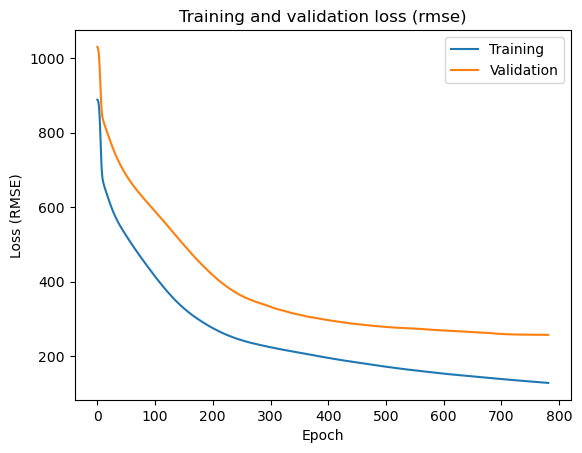

In [13]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
rmse = np.sqrt(history.history['mean_squared_error'][:782])
val_rmse = np.sqrt(history.history['val_mean_squared_error'][:782])

# Get number of epochs
epochs = range(len(rmse))

# Plot training and validation loss per epoch
plt.plot(epochs, rmse)
plt.plot(epochs, val_rmse)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and validation loss (rmse)')

print('Best Model: Min Training loss (RMSE) = {:.3f}, Min Validation loss (RMSE) = {:.3f}'
      .format(min(rmse), min(val_rmse)))

In [22]:
class MyHyperModel(HyperModel):
    def build(self, hyperparams):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
        model.add(tf.keras.layers.Dense(units=hyperparams.Int('unit_1', 32, 256, step = 2, sampling='log'),
                        activation= "relu",
                        use_bias=True,
                        bias_initializer = hyperparams.Choice("bias_l1", ["he_uniform", "he_normal"]),
                        kernel_initializer = hyperparams.Choice("kernel_l1", ["he_uniform", "he_normal"]),
#                         kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K1", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                l2=hyperparams.Float("L2_K1", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                               ),
#                         bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B1", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                              l2=hyperparams.Float("L2_B1", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                             ),
#                         activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A1", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_A1", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 )
                       ))
        
        model.add(tf.keras.layers.Dense(units=hyperparams.Int('unit_2', 8, 64, step = 2, sampling='log'),
                        activation= "relu",
                        use_bias=True,
                        bias_initializer = hyperparams.Choice("bias_l2", ["he_uniform", "he_normal"]),
                        kernel_initializer = hyperparams.Choice("kernel_l2", ["he_uniform", "he_normal"]),
#                         kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K2", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                l2=hyperparams.Float("L2_K2", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                               ),
#                         bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B2", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                              l2=hyperparams.Float("L2_B2", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                             ),
#                         activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A2", 0.001, 10000.0, step = 10, sampling = 'log'),
#                                                                  l2=hyperparams.Float("L2_A2", 0.001, 10000.0, step = 10, sampling = 'log')
#                                                                 )
                       ))
        
        model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                                        use_bias=True,
                                        bias_initializer = hyperparams.Choice("bias_o", ["he_normal", "he_uniform"]),
                                        kernel_initializer = hyperparams.Choice("kernel_o", ["he_uniform", "he_normal"]),
                                        #                         kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ko", 0.001, 10000.0, step = 10, sampling = 'log'),
                                        #                                                                l2=hyperparams.Float("L2_Ko", 0.001, 10000.0, step = 10, sampling = 'log')
                                        #                                                               ),
                                        #                         bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Bo", 0.001, 10000.0, step = 10, sampling = 'log'),
                                        #                                                              l2=hyperparams.Float("L2_Bo", 0.001, 10000.0, step = 10, sampling = 'log')
                                        #                                                             ),
                                        #                         activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ao", 0.001, 10000.0, step = 10, sampling = 'log'),
                                        #                                                                  l2=hyperparams.Float("L2_Ao", 0.001, 10000.0, step = 10, sampling = 'log')
                                        #                                                                 )
                 ))
        
        model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
        
        return model
    
    def fit(self, hyperparams, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=8,
            **kwargs,
        )

In [23]:
tuner =  BayesianOptimization(hypermodel=MyHyperModel(),
                              objective="val_mean_squared_error",
                              max_trials = 150,
                              seed = 15,
                              project_name="Coba 11 May 7am",
                              directory = "Coba_nn_rev",
                              overwrite = True
                             )

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
tuner.search(X_train.values, y_train.values, epochs=2000, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters

tuner.get_best_hyperparameters()[0].values

Trial 500 Complete [00h 00m 41s]
val_mean_squared_error: 80107.6328125

Best val_mean_squared_error So Far: 64688.05078125
Total elapsed time: 04h 21m 46s
INFO:tensorflow:Oracle triggered exit


{'unit_1': 128,
 'bias_l1': 'he_normal',
 'kernel_l1': 'he_uniform',
 'unit_2': 64,
 'bias_l2': 'he_normal',
 'kernel_l2': 'he_uniform',
 'bias_o': 'he_uniform',
 'kernel_o': 'he_uniform'}

In [24]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7168      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


In [9]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
    model.add(tf.keras.layers.Dense(units=128,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=1.0, l2=0.001),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 0.1),
#                     activity_regularizer = tf.keras.regularizers.L2(l2=0.1)
                   ))
    
    model.add(tf.keras.layers.Dense(units=64,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.001),
#                     activity_regularizer = tf.keras.regularizers.L2(l2=1.00)
                   ))       
    
    model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                    use_bias=True,
                    bias_initializer = "he_uniform",
                    kernel_initializer = "he_uniform",
#                     kernel_regularizer = tf.keras.regularizers.L1L2(l1=1.00, l2=0.1),
#                     bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
#                     activity_regularizer = tf.keras.regularizers.L1(l1=0.01)
                   ))
    
    model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
    
    return model

In [10]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
mc = tf.keras.callbacks.ModelCheckpoint('best_model_110523_12pm.h5', monitor='val_mean_squared_error', verbose=1, save_best_only=True)

model = build_model()
history = model.fit(X_train.values, y_train.values, epochs=2000, batch_size=8, verbose=2, shuffle = False,
                           validation_split = 0.2, callbacks = [stop_early, mc])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 1055299.12500, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 786234.2500 - mean_squared_error: 786234.2500 - val_loss: 1055299.1250 - val_mean_squared_error: 1055299.1250 - 488ms/epoch - 20ms/step
Epoch 2/2000

Epoch 2: val_loss improved from 1055299.12500 to 1038289.18750, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 776100.0625 - mean_squared_error: 776100.0625 - val_loss: 1038289.1875 - val_mean_squared_error: 1038289.1875 - 61ms/epoch - 2ms/step
Epoch 3/2000

Epoch 3: val_loss improved from 1038289.18750 to 995329.75000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 748947.2500 - mean_squared_error: 748947.2500 - val_loss: 995329.7500 - val_mean_squared_error: 995329.7500 - 55ms/epoch - 2ms/step
Epoch 4/2000

Epoch 4: val_loss improved from 995329.75000 to 915889.12500, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 690494.0000 - mean_squared_error: 690494.0000 - val_los

25/25 - 0s - loss: 292383.2188 - mean_squared_error: 292383.2188 - val_loss: 495980.5312 - val_mean_squared_error: 495980.5312 - 48ms/epoch - 2ms/step
Epoch 32/2000

Epoch 32: val_loss improved from 495980.53125 to 490002.84375, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 288283.2812 - mean_squared_error: 288283.2812 - val_loss: 490002.8438 - val_mean_squared_error: 490002.8438 - 49ms/epoch - 2ms/step
Epoch 33/2000

Epoch 33: val_loss improved from 490002.84375 to 484201.96875, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 284263.5000 - mean_squared_error: 284263.5000 - val_loss: 484201.9688 - val_mean_squared_error: 484201.9688 - 52ms/epoch - 2ms/step
Epoch 34/2000

Epoch 34: val_loss improved from 484201.96875 to 478509.56250, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 280331.9062 - mean_squared_error: 280331.9062 - val_loss: 478509.5625 - val_mean_squared_error: 478509.5625 - 55ms/epoch - 2ms/step
Epoch 35/2000

Epoch 35: val_loss im

Epoch 62/2000

Epoch 62: val_loss improved from 368748.46875 to 365634.03125, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 188007.6094 - mean_squared_error: 188007.6094 - val_loss: 365634.0312 - val_mean_squared_error: 365634.0312 - 57ms/epoch - 2ms/step
Epoch 63/2000

Epoch 63: val_loss improved from 365634.03125 to 362583.12500, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 185299.1875 - mean_squared_error: 185299.1875 - val_loss: 362583.1250 - val_mean_squared_error: 362583.1250 - 54ms/epoch - 2ms/step
Epoch 64/2000

Epoch 64: val_loss improved from 362583.12500 to 359493.03125, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 182608.8906 - mean_squared_error: 182608.8906 - val_loss: 359493.0312 - val_mean_squared_error: 359493.0312 - 57ms/epoch - 2ms/step
Epoch 65/2000

Epoch 65: val_loss improved from 359493.03125 to 356382.43750, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 179953.6562 - mean_squared_error: 179953.6562 - 

25/25 - 0s - loss: 121718.4062 - mean_squared_error: 121718.4062 - val_loss: 274673.5938 - val_mean_squared_error: 274673.5938 - 51ms/epoch - 2ms/step
Epoch 93/2000

Epoch 93: val_loss improved from 274673.59375 to 271772.62500, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 120053.7109 - mean_squared_error: 120053.7109 - val_loss: 271772.6250 - val_mean_squared_error: 271772.6250 - 51ms/epoch - 2ms/step
Epoch 94/2000

Epoch 94: val_loss improved from 271772.62500 to 268885.18750, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 118418.8047 - mean_squared_error: 118418.8047 - val_loss: 268885.1875 - val_mean_squared_error: 268885.1875 - 50ms/epoch - 2ms/step
Epoch 95/2000

Epoch 95: val_loss improved from 268885.18750 to 266001.75000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 116817.2812 - mean_squared_error: 116817.2812 - val_loss: 266001.7500 - val_mean_squared_error: 266001.7500 - 47ms/epoch - 2ms/step
Epoch 96/2000

Epoch 96: val_loss im

Epoch 123/2000

Epoch 123: val_loss improved from 198818.64062 to 196762.06250, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 83641.2812 - mean_squared_error: 83641.2812 - val_loss: 196762.0625 - val_mean_squared_error: 196762.0625 - 52ms/epoch - 2ms/step
Epoch 124/2000

Epoch 124: val_loss improved from 196762.06250 to 194696.57812, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 82736.8203 - mean_squared_error: 82736.8203 - val_loss: 194696.5781 - val_mean_squared_error: 194696.5781 - 54ms/epoch - 2ms/step
Epoch 125/2000

Epoch 125: val_loss improved from 194696.57812 to 192675.85938, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 81857.5938 - mean_squared_error: 81857.5938 - val_loss: 192675.8594 - val_mean_squared_error: 192675.8594 - 50ms/epoch - 2ms/step
Epoch 126/2000

Epoch 126: val_loss improved from 192675.85938 to 190667.04688, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 80991.1016 - mean_squared_error: 80991.1016 - 

25/25 - 0s - loss: 62378.3555 - mean_squared_error: 62378.3555 - val_loss: 147921.9375 - val_mean_squared_error: 147921.9375 - 58ms/epoch - 2ms/step
Epoch 154/2000

Epoch 154: val_loss improved from 147921.93750 to 146740.76562, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 61843.1914 - mean_squared_error: 61843.1914 - val_loss: 146740.7656 - val_mean_squared_error: 146740.7656 - 51ms/epoch - 2ms/step
Epoch 155/2000

Epoch 155: val_loss improved from 146740.76562 to 145591.73438, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 61331.0859 - mean_squared_error: 61331.0859 - val_loss: 145591.7344 - val_mean_squared_error: 145591.7344 - 49ms/epoch - 2ms/step
Epoch 156/2000

Epoch 156: val_loss improved from 145591.73438 to 144465.37500, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 60824.1328 - mean_squared_error: 60824.1328 - val_loss: 144465.3750 - val_mean_squared_error: 144465.3750 - 50ms/epoch - 2ms/step
Epoch 157/2000

Epoch 157: val_loss im

Epoch 184/2000

Epoch 184: val_loss improved from 122468.35156 to 121918.57812, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 49720.7930 - mean_squared_error: 49720.7930 - val_loss: 121918.5781 - val_mean_squared_error: 121918.5781 - 53ms/epoch - 2ms/step
Epoch 185/2000

Epoch 185: val_loss improved from 121918.57812 to 121340.46875, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 49417.7461 - mean_squared_error: 49417.7461 - val_loss: 121340.4688 - val_mean_squared_error: 121340.4688 - 58ms/epoch - 2ms/step
Epoch 186/2000

Epoch 186: val_loss improved from 121340.46875 to 120797.97656, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 49112.7773 - mean_squared_error: 49112.7773 - val_loss: 120797.9766 - val_mean_squared_error: 120797.9766 - 62ms/epoch - 2ms/step
Epoch 187/2000

Epoch 187: val_loss improved from 120797.97656 to 120278.04688, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 48824.1602 - mean_squared_error: 48824.1602 - 

25/25 - 0s - loss: 42368.3164 - mean_squared_error: 42368.3164 - val_loss: 109174.5703 - val_mean_squared_error: 109174.5703 - 45ms/epoch - 2ms/step
Epoch 215/2000

Epoch 215: val_loss improved from 109174.57031 to 108934.00000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 42164.5898 - mean_squared_error: 42164.5898 - val_loss: 108934.0000 - val_mean_squared_error: 108934.0000 - 49ms/epoch - 2ms/step
Epoch 216/2000

Epoch 216: val_loss improved from 108934.00000 to 108593.84375, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 41963.1055 - mean_squared_error: 41963.1055 - val_loss: 108593.8438 - val_mean_squared_error: 108593.8438 - 49ms/epoch - 2ms/step
Epoch 217/2000

Epoch 217: val_loss improved from 108593.84375 to 108329.63281, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 41759.9883 - mean_squared_error: 41759.9883 - val_loss: 108329.6328 - val_mean_squared_error: 108329.6328 - 53ms/epoch - 2ms/step
Epoch 218/2000

Epoch 218: val_loss im

Epoch 245/2000

Epoch 245: val_loss improved from 101739.95312 to 101549.03906, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 36813.3359 - mean_squared_error: 36813.3359 - val_loss: 101549.0391 - val_mean_squared_error: 101549.0391 - 50ms/epoch - 2ms/step
Epoch 246/2000

Epoch 246: val_loss improved from 101549.03906 to 101329.74219, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 36650.6406 - mean_squared_error: 36650.6406 - val_loss: 101329.7422 - val_mean_squared_error: 101329.7422 - 50ms/epoch - 2ms/step
Epoch 247/2000

Epoch 247: val_loss improved from 101329.74219 to 101154.88281, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 36480.1875 - mean_squared_error: 36480.1875 - val_loss: 101154.8828 - val_mean_squared_error: 101154.8828 - 49ms/epoch - 2ms/step
Epoch 248/2000

Epoch 248: val_loss improved from 101154.88281 to 100950.88281, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 36325.9805 - mean_squared_error: 36325.9805 - 

Epoch 276/2000

Epoch 276: val_loss improved from 96070.64062 to 95901.89062, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 31954.0781 - mean_squared_error: 31954.0781 - val_loss: 95901.8906 - val_mean_squared_error: 95901.8906 - 51ms/epoch - 2ms/step
Epoch 277/2000

Epoch 277: val_loss improved from 95901.89062 to 95684.75000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 31812.0059 - mean_squared_error: 31812.0059 - val_loss: 95684.7500 - val_mean_squared_error: 95684.7500 - 56ms/epoch - 2ms/step
Epoch 278/2000

Epoch 278: val_loss improved from 95684.75000 to 95518.06250, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 31670.7070 - mean_squared_error: 31670.7070 - val_loss: 95518.0625 - val_mean_squared_error: 95518.0625 - 55ms/epoch - 2ms/step
Epoch 279/2000

Epoch 279: val_loss improved from 95518.06250 to 95315.07031, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 31513.1621 - mean_squared_error: 31513.1621 - val_loss: 9531

Epoch 307/2000

Epoch 307: val_loss improved from 91042.32812 to 90878.42188, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 27645.4316 - mean_squared_error: 27645.4316 - val_loss: 90878.4219 - val_mean_squared_error: 90878.4219 - 58ms/epoch - 2ms/step
Epoch 308/2000

Epoch 308: val_loss improved from 90878.42188 to 90755.68750, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 27522.0508 - mean_squared_error: 27522.0508 - val_loss: 90755.6875 - val_mean_squared_error: 90755.6875 - 51ms/epoch - 2ms/step
Epoch 309/2000

Epoch 309: val_loss improved from 90755.68750 to 90685.00000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 27389.0156 - mean_squared_error: 27389.0156 - val_loss: 90685.0000 - val_mean_squared_error: 90685.0000 - 50ms/epoch - 2ms/step
Epoch 310/2000

Epoch 310: val_loss improved from 90685.00000 to 90597.40625, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 27253.9629 - mean_squared_error: 27253.9629 - val_loss: 9059

25/25 - 0s - loss: 23982.1992 - mean_squared_error: 23982.1992 - val_loss: 87081.5000 - val_mean_squared_error: 87081.5000 - 49ms/epoch - 2ms/step
Epoch 339/2000

Epoch 339: val_loss improved from 87081.50000 to 86931.75000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 23868.1094 - mean_squared_error: 23868.1094 - val_loss: 86931.7500 - val_mean_squared_error: 86931.7500 - 54ms/epoch - 2ms/step
Epoch 340/2000

Epoch 340: val_loss improved from 86931.75000 to 86789.40625, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 23779.1973 - mean_squared_error: 23779.1973 - val_loss: 86789.4062 - val_mean_squared_error: 86789.4062 - 52ms/epoch - 2ms/step
Epoch 341/2000

Epoch 341: val_loss improved from 86789.40625 to 86654.82031, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 23667.2812 - mean_squared_error: 23667.2812 - val_loss: 86654.8203 - val_mean_squared_error: 86654.8203 - 49ms/epoch - 2ms/step
Epoch 342/2000

Epoch 342: val_loss improved from 86

Epoch 370/2000

Epoch 370: val_loss did not improve from 83300.84375
25/25 - 0s - loss: 20924.1250 - mean_squared_error: 20924.1250 - val_loss: 83373.5938 - val_mean_squared_error: 83373.5938 - 46ms/epoch - 2ms/step
Epoch 371/2000

Epoch 371: val_loss improved from 83300.84375 to 83154.45312, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 20805.3184 - mean_squared_error: 20805.3184 - val_loss: 83154.4531 - val_mean_squared_error: 83154.4531 - 79ms/epoch - 3ms/step
Epoch 372/2000

Epoch 372: val_loss did not improve from 83154.45312
25/25 - 0s - loss: 20724.4512 - mean_squared_error: 20724.4512 - val_loss: 83174.8359 - val_mean_squared_error: 83174.8359 - 61ms/epoch - 2ms/step
Epoch 373/2000

Epoch 373: val_loss improved from 83154.45312 to 82954.75000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 20633.6973 - mean_squared_error: 20633.6973 - val_loss: 82954.7500 - val_mean_squared_error: 82954.7500 - 94ms/epoch - 4ms/step
Epoch 374/2000

Epoch 374: val_los


Epoch 402: val_loss did not improve from 79744.64844
25/25 - 0s - loss: 18289.8984 - mean_squared_error: 18289.8984 - val_loss: 79789.0938 - val_mean_squared_error: 79789.0938 - 59ms/epoch - 2ms/step
Epoch 403/2000

Epoch 403: val_loss did not improve from 79744.64844
25/25 - 0s - loss: 18178.8730 - mean_squared_error: 18178.8730 - val_loss: 79769.0156 - val_mean_squared_error: 79769.0156 - 55ms/epoch - 2ms/step
Epoch 404/2000

Epoch 404: val_loss improved from 79744.64844 to 79633.00000, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 18118.4492 - mean_squared_error: 18118.4492 - val_loss: 79633.0000 - val_mean_squared_error: 79633.0000 - 92ms/epoch - 4ms/step
Epoch 405/2000

Epoch 405: val_loss improved from 79633.00000 to 79503.83594, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 18028.5234 - mean_squared_error: 18028.5234 - val_loss: 79503.8359 - val_mean_squared_error: 79503.8359 - 107ms/epoch - 4ms/step
Epoch 406/2000

Epoch 406: val_loss improved fro

25/25 - 0s - loss: 16134.3965 - mean_squared_error: 16134.3965 - val_loss: 77804.0625 - val_mean_squared_error: 77804.0625 - 87ms/epoch - 3ms/step
Epoch 435/2000

Epoch 435: val_loss improved from 77804.06250 to 77802.31250, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 16058.7490 - mean_squared_error: 16058.7490 - val_loss: 77802.3125 - val_mean_squared_error: 77802.3125 - 85ms/epoch - 3ms/step
Epoch 436/2000

Epoch 436: val_loss improved from 77802.31250 to 77588.34375, saving model to best_model_110523_12pm.h5
25/25 - 0s - loss: 16024.8047 - mean_squared_error: 16024.8047 - val_loss: 77588.3438 - val_mean_squared_error: 77588.3438 - 106ms/epoch - 4ms/step
Epoch 437/2000

Epoch 437: val_loss did not improve from 77588.34375
25/25 - 0s - loss: 16012.1123 - mean_squared_error: 16012.1123 - val_loss: 77775.0781 - val_mean_squared_error: 77775.0781 - 76ms/epoch - 3ms/step
Epoch 438/2000

Epoch 438: val_loss did not improve from 77588.34375
25/25 - 0s - loss: 15905.7021 - m

Epoch 471/2000

Epoch 471: val_loss did not improve from 77460.52344
25/25 - 0s - loss: 13982.7041 - mean_squared_error: 13982.7041 - val_loss: 77617.1719 - val_mean_squared_error: 77617.1719 - 68ms/epoch - 3ms/step
Epoch 472/2000

Epoch 472: val_loss did not improve from 77460.52344
25/25 - 0s - loss: 13927.9141 - mean_squared_error: 13927.9141 - val_loss: 77577.8516 - val_mean_squared_error: 77577.8516 - 68ms/epoch - 3ms/step
Epoch 473/2000

Epoch 473: val_loss did not improve from 77460.52344
25/25 - 0s - loss: 13881.4922 - mean_squared_error: 13881.4922 - val_loss: 77541.6875 - val_mean_squared_error: 77541.6875 - 65ms/epoch - 3ms/step
Epoch 474/2000

Epoch 474: val_loss did not improve from 77460.52344
25/25 - 0s - loss: 13871.6162 - mean_squared_error: 13871.6162 - val_loss: 77696.2500 - val_mean_squared_error: 77696.2500 - 60ms/epoch - 2ms/step
Epoch 475/2000

Epoch 475: val_loss did not improve from 77460.52344
25/25 - 0s - loss: 13799.6631 - mean_squared_error: 13799.6631 - va

Best Model: Min Training loss (RMSE) = 121.402, Min Validation loss (RMSE) = 278.317


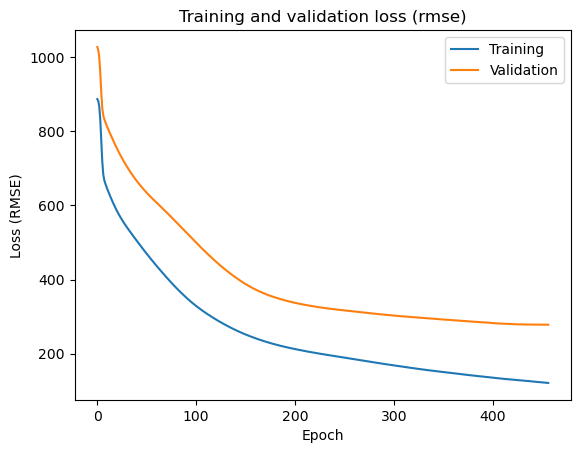

In [11]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
rmse = np.sqrt(history.history['mean_squared_error'][:457])
val_rmse = np.sqrt(history.history['val_mean_squared_error'][:457])

# Get number of epochs
epochs = range(len(rmse))

# Plot training and validation loss per epoch
plt.plot(epochs, rmse)
plt.plot(epochs, val_rmse)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and validation loss (rmse)')

print('Best Model: Min Training loss (RMSE) = {:.3f}, Min Validation loss (RMSE) = {:.3f}'
      .format(min(rmse), min(val_rmse)))

In [24]:
class MyHyperModel(HyperModel):
    def build(self, hyperparams):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
        model.add(tf.keras.layers.Dense(units=128,
                        activation= "relu",
                        use_bias=True,
                        bias_initializer = "he_normal",
                        kernel_initializer = "he_uniform",
                        kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K1", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                               l2=hyperparams.Float("L2_K1", 0.01, 10000.0, step = 10, sampling = 'log')
                                                              ),
                        bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B1", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                             l2=hyperparams.Float("L2_B1", 0.01, 10000.0, step = 10, sampling = 'log')
                                                            ),
                        activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A1", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                                 l2=hyperparams.Float("L2_A1", 0.01, 10000.0, step = 10, sampling = 'log')
                                                                )
                       ))
        
#         if hyperparams.Boolean('Dropout_l1'):
#             model.add(tf.keras.layers.Dropout(rate=))
        
        model.add(tf.keras.layers.Dense(units=64,
                        activation= "relu",
                        use_bias=True,
                        bias_initializer = "he_normal",
                        kernel_initializer = "he_uniform",
                        kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_K2", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                               l2=hyperparams.Float("L2_K2", 0.01, 10000.0, step = 10, sampling = 'log')
                                                              ),
                        bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_B2", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                             l2=hyperparams.Float("L2_B2", 0.01, 10000.0, step = 10, sampling = 'log')
                                                            ),
                        activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_A2", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                                 l2=hyperparams.Float("L2_A2", 0.01, 10000.0, step = 10, sampling = 'log')
                                                                )
                       ))
        
#         if hyperparams.Boolean('Dropout_l3'):
#             model.add(tf.keras.layers.Dropout(rate=))
        
        model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                        use_bias=True,
                        bias_initializer = "he_uniform",
                        kernel_initializer = "he_uniform",
                        kernel_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ko", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                               l2=hyperparams.Float("L2_Ko", 0.01, 10000.0, step = 10, sampling = 'log')
                                                               ),
                        bias_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Bo", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                             l2=hyperparams.Float("L2_Bo", 0.01, 10000.0, step = 10, sampling = 'log')
                                                            ),
                        activity_regularizer = tf.keras.regularizers.L1L2(l1=hyperparams.Float("L1_Ao", 0.01, 10000.0, step = 10, sampling = 'log'),
                                                                 l2=hyperparams.Float("L2_Ao", 0.01, 10000.0, step = 10, sampling = 'log')
                                                                )
                 ))
        
        model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
        
        return model
    
    def fit(self, hyperparams, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=8,
            **kwargs,
        )

In [25]:
tuner =  BayesianOptimization(hypermodel=MyHyperModel(),
                              objective="val_mean_squared_error",
                              max_trials = 500,
                              seed = 15,
                              project_name="Coba 11 May 1pm",
                              directory = "Coba_nn_rev",
                              overwrite = True
                             )

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
tuner.search(X_train.values, y_train.values, epochs=2000, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters

tuner.get_best_hyperparameters()[0].values

Trial 500 Complete [00h 00m 05s]
val_mean_squared_error: 1062319.875

Best val_mean_squared_error So Far: 96282.9765625
Total elapsed time: 02h 47m 31s
INFO:tensorflow:Oracle triggered exit


{'L1_K1': 0.1,
 'L2_K1': 1.0,
 'L1_B1': 0.01,
 'L2_B1': 10.0,
 'L1_A1': 10.0,
 'L2_A1': 10.0,
 'L1_K2': 100.0,
 'L2_K2': 1.0,
 'L1_B2': 1.0,
 'L2_B2': 10.0,
 'L1_A2': 100.0,
 'L2_A2': 0.01,
 'L1_Ko': 0.1,
 'L2_Ko': 0.01,
 'L1_Bo': 100.0,
 'L2_Bo': 1.0,
 'L1_Ao': 0.01,
 'L2_Ao': 0.01}

In [56]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7168      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


In [59]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
    model.add(tf.keras.layers.Dense(units=128,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.1, l2= 1.0),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 10.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=10.0, l2= 10.0)
                   ))
    
    model.add(tf.keras.layers.Dense(units=64,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 1.0),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=1.0, l2= 10.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 0.01),
                   ))          
    
    model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                    use_bias=True,
                    bias_initializer = "he_uniform",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.1, l2=0.01),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 1.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 0.01),
                   ))
    
    model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
    
    return model

In [60]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
mc = tf.keras.callbacks.ModelCheckpoint('best_model_fin_110523_4pm.h5', monitor='val_mean_squared_error',
                                        verbose=1, save_best_only=True)

model = build_model()
history = model.fit(X_train.values, y_train.values, epochs=2000, batch_size=8, verbose=2, shuffle = False,
                           validation_split = 0.2, callbacks = [stop_early, mc])

Epoch 1/2000

Epoch 1: val_mean_squared_error improved from inf to 1058982.50000, saving model to best_model_fin_110523_4pm.h5
25/25 - 1s - loss: 869197.5000 - mean_squared_error: 787020.1250 - val_loss: 1131654.0000 - val_mean_squared_error: 1058982.5000 - 653ms/epoch - 26ms/step
Epoch 2/2000

Epoch 2: val_mean_squared_error improved from 1058982.50000 to 1057350.25000, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 850231.0000 - mean_squared_error: 785324.0625 - val_loss: 1114089.6250 - val_mean_squared_error: 1057350.2500 - 58ms/epoch - 2ms/step
Epoch 3/2000

Epoch 3: val_mean_squared_error improved from 1057350.25000 to 1054142.37500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 833480.5625 - mean_squared_error: 783131.2500 - val_loss: 1097925.0000 - val_mean_squared_error: 1054142.3750 - 55ms/epoch - 2ms/step
Epoch 4/2000

Epoch 4: val_mean_squared_error improved from 1054142.37500 to 1047162.81250, saving model to best_model_fin_110523_4pm.h5
2

25/25 - 0s - loss: 441944.1875 - mean_squared_error: 346146.1562 - val_loss: 669814.1875 - val_mean_squared_error: 575328.6250 - 51ms/epoch - 2ms/step
Epoch 30/2000

Epoch 30: val_mean_squared_error improved from 575328.62500 to 569843.62500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 437330.0312 - mean_squared_error: 342164.5312 - val_loss: 663760.6250 - val_mean_squared_error: 569843.6250 - 54ms/epoch - 2ms/step
Epoch 31/2000

Epoch 31: val_mean_squared_error improved from 569843.62500 to 564504.50000, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 432900.9375 - mean_squared_error: 338342.3125 - val_loss: 657882.0625 - val_mean_squared_error: 564504.5000 - 48ms/epoch - 2ms/step
Epoch 32/2000

Epoch 32: val_mean_squared_error improved from 564504.50000 to 559303.62500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 428652.1562 - mean_squared_error: 334667.6875 - val_loss: 652167.5000 - val_mean_squared_error: 559303.6250 - 48ms/ep

Epoch 58/2000

Epoch 58: val_mean_squared_error improved from 460740.31250 to 457651.71875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 351171.7188 - mean_squared_error: 265180.6562 - val_loss: 543165.9375 - val_mean_squared_error: 457651.7188 - 51ms/epoch - 2ms/step
Epoch 59/2000

Epoch 59: val_mean_squared_error improved from 457651.71875 to 454616.37500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 348764.1250 - mean_squared_error: 262913.1562 - val_loss: 539992.0625 - val_mean_squared_error: 454616.3750 - 49ms/epoch - 2ms/step
Epoch 60/2000

Epoch 60: val_mean_squared_error improved from 454616.37500 to 451614.37500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 346380.3125 - mean_squared_error: 260662.0781 - val_loss: 536867.9375 - val_mean_squared_error: 451614.3750 - 50ms/epoch - 2ms/step
Epoch 61/2000

Epoch 61: val_mean_squared_error improved from 451614.37500 to 448655.68750, saving model to best_model_fin_110523_4pm.h5

25/25 - 0s - loss: 290565.8750 - mean_squared_error: 206359.7344 - val_loss: 470417.7500 - val_mean_squared_error: 386411.8438 - 52ms/epoch - 2ms/step
Epoch 87/2000

Epoch 87: val_mean_squared_error improved from 386411.84375 to 384261.62500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 288654.0938 - mean_squared_error: 204455.5625 - val_loss: 468282.6250 - val_mean_squared_error: 384261.6250 - 51ms/epoch - 2ms/step
Epoch 88/2000

Epoch 88: val_mean_squared_error improved from 384261.62500 to 382142.90625, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 286762.9375 - mean_squared_error: 202562.8125 - val_loss: 466182.5312 - val_mean_squared_error: 382142.9062 - 49ms/epoch - 2ms/step
Epoch 89/2000

Epoch 89: val_mean_squared_error improved from 382142.90625 to 380042.03125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 284902.6562 - mean_squared_error: 200695.6719 - val_loss: 464104.7500 - val_mean_squared_error: 380042.0312 - 47ms/ep

Epoch 115/2000

Epoch 115: val_mean_squared_error improved from 331873.87500 to 330033.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 242833.1250 - mean_squared_error: 158398.1875 - val_loss: 414603.2812 - val_mean_squared_error: 330033.8438 - 66ms/epoch - 3ms/step
Epoch 116/2000

Epoch 116: val_mean_squared_error improved from 330033.84375 to 328196.18750, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 241442.1406 - mean_squared_error: 156989.3438 - val_loss: 412790.3750 - val_mean_squared_error: 328196.1875 - 50ms/epoch - 2ms/step
Epoch 117/2000

Epoch 117: val_mean_squared_error improved from 328196.18750 to 326361.53125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 240068.2031 - mean_squared_error: 155598.5000 - val_loss: 410977.6250 - val_mean_squared_error: 326361.5312 - 52ms/epoch - 2ms/step
Epoch 118/2000

Epoch 118: val_mean_squared_error improved from 326361.53125 to 324542.15625, saving model to best_model_fin_11052

25/25 - 0s - loss: 209350.7812 - mean_squared_error: 124751.6172 - val_loss: 365397.6875 - val_mean_squared_error: 280662.0625 - 54ms/epoch - 2ms/step
Epoch 144/2000

Epoch 144: val_mean_squared_error improved from 280662.06250 to 278991.78125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 208358.7031 - mean_squared_error: 123759.7891 - val_loss: 363719.8125 - val_mean_squared_error: 278991.7812 - 51ms/epoch - 2ms/step
Epoch 145/2000

Epoch 145: val_mean_squared_error improved from 278991.78125 to 277335.21875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 207381.1250 - mean_squared_error: 122788.5234 - val_loss: 362043.8125 - val_mean_squared_error: 277335.2188 - 52ms/epoch - 2ms/step
Epoch 146/2000

Epoch 146: val_mean_squared_error improved from 277335.21875 to 275681.90625, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 206413.9062 - mean_squared_error: 121836.9062 - val_loss: 360373.0312 - val_mean_squared_error: 275681.9062 - 5

Epoch 172/2000

Epoch 172: val_mean_squared_error improved from 238874.04688 to 237616.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 185228.1406 - mean_squared_error: 101432.6875 - val_loss: 321239.0000 - val_mean_squared_error: 237616.8438 - 54ms/epoch - 2ms/step
Epoch 173/2000

Epoch 173: val_mean_squared_error improved from 237616.84375 to 236364.73438, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 184530.1406 - mean_squared_error: 100799.3203 - val_loss: 319918.1250 - val_mean_squared_error: 236364.7344 - 51ms/epoch - 2ms/step
Epoch 174/2000

Epoch 174: val_mean_squared_error improved from 236364.73438 to 235118.35938, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 183841.3125 - mean_squared_error: 100165.8359 - val_loss: 318600.8438 - val_mean_squared_error: 235118.3594 - 51ms/epoch - 2ms/step
Epoch 175/2000

Epoch 175: val_mean_squared_error improved from 235118.35938 to 233874.28125, saving model to best_model_fin_11052

25/25 - 0s - loss: 168028.2656 - mean_squared_error: 86171.8672 - val_loss: 288118.6562 - val_mean_squared_error: 206888.0781 - 56ms/epoch - 2ms/step
Epoch 201/2000

Epoch 201: val_mean_squared_error improved from 206888.07812 to 205951.18750, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 167482.4375 - mean_squared_error: 85718.7109 - val_loss: 287078.8125 - val_mean_squared_error: 205951.1875 - 52ms/epoch - 2ms/step
Epoch 202/2000

Epoch 202: val_mean_squared_error improved from 205951.18750 to 204985.20312, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 166941.8594 - mean_squared_error: 85263.0078 - val_loss: 286016.3438 - val_mean_squared_error: 204985.2031 - 52ms/epoch - 2ms/step
Epoch 203/2000

Epoch 203: val_mean_squared_error improved from 204985.20312 to 204056.29688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 166399.5156 - mean_squared_error: 84799.3906 - val_loss: 284987.7188 - val_mean_squared_error: 204056.2969 - 53ms/

Epoch 229/2000

Epoch 229: val_mean_squared_error improved from 183218.57812 to 182472.64062, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 153539.0156 - mean_squared_error: 74273.3828 - val_loss: 260718.9375 - val_mean_squared_error: 182472.6406 - 55ms/epoch - 2ms/step
Epoch 230/2000

Epoch 230: val_mean_squared_error improved from 182472.64062 to 181747.21875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 153086.7344 - mean_squared_error: 73913.5625 - val_loss: 259885.7344 - val_mean_squared_error: 181747.2188 - 53ms/epoch - 2ms/step
Epoch 231/2000

Epoch 231: val_mean_squared_error improved from 181747.21875 to 181024.64062, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 152638.3906 - mean_squared_error: 73559.5078 - val_loss: 259053.9375 - val_mean_squared_error: 181024.6406 - 57ms/epoch - 2ms/step
Epoch 232/2000

Epoch 232: val_mean_squared_error improved from 181024.64062 to 180327.54688, saving model to best_model_fin_110523_4

25/25 - 0s - loss: 142039.9531 - mean_squared_error: 65485.0977 - val_loss: 239801.4062 - val_mean_squared_error: 164585.4844 - 52ms/epoch - 2ms/step
Epoch 258/2000

Epoch 258: val_mean_squared_error improved from 164585.48438 to 164046.23438, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 141674.8594 - mean_squared_error: 65235.0859 - val_loss: 239149.1562 - val_mean_squared_error: 164046.2344 - 52ms/epoch - 2ms/step
Epoch 259/2000

Epoch 259: val_mean_squared_error improved from 164046.23438 to 163451.59375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 141308.3594 - mean_squared_error: 64959.0898 - val_loss: 238456.7344 - val_mean_squared_error: 163451.5938 - 57ms/epoch - 2ms/step
Epoch 260/2000

Epoch 260: val_mean_squared_error improved from 163451.59375 to 162953.56250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 140946.2500 - mean_squared_error: 64699.6367 - val_loss: 237836.9219 - val_mean_squared_error: 162953.5625 - 51ms/

Epoch 286/2000

Epoch 286: val_mean_squared_error improved from 151803.82812 to 151473.29688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 132396.8125 - mean_squared_error: 58892.1523 - val_loss: 223392.2656 - val_mean_squared_error: 151473.2969 - 69ms/epoch - 3ms/step
Epoch 287/2000

Epoch 287: val_mean_squared_error improved from 151473.29688 to 151082.45312, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 132096.7812 - mean_squared_error: 58705.0195 - val_loss: 222889.4844 - val_mean_squared_error: 151082.4531 - 50ms/epoch - 2ms/step
Epoch 288/2000

Epoch 288: val_mean_squared_error improved from 151082.45312 to 150718.46875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 131803.3594 - mean_squared_error: 58521.4805 - val_loss: 222409.6406 - val_mean_squared_error: 150718.4688 - 54ms/epoch - 2ms/step
Epoch 289/2000

Epoch 289: val_mean_squared_error improved from 150718.46875 to 150385.65625, saving model to best_model_fin_110523_4

25/25 - 0s - loss: 124755.9609 - mean_squared_error: 54379.5352 - val_loss: 211463.7188 - val_mean_squared_error: 142854.2969 - 51ms/epoch - 2ms/step
Epoch 315/2000

Epoch 315: val_mean_squared_error improved from 142854.29688 to 142583.54688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 124510.6875 - mean_squared_error: 54259.1914 - val_loss: 211080.4219 - val_mean_squared_error: 142583.5469 - 54ms/epoch - 2ms/step
Epoch 316/2000

Epoch 316: val_mean_squared_error improved from 142583.54688 to 142338.14062, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 124258.3906 - mean_squared_error: 54113.4453 - val_loss: 210713.4531 - val_mean_squared_error: 142338.1406 - 50ms/epoch - 2ms/step
Epoch 317/2000

Epoch 317: val_mean_squared_error improved from 142338.14062 to 142108.71875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 124011.4609 - mean_squared_error: 53980.8242 - val_loss: 210364.4531 - val_mean_squared_error: 142108.7188 - 53ms/

Epoch 343/2000

Epoch 343: val_mean_squared_error improved from 136707.45312 to 136505.59375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 118080.6172 - mean_squared_error: 50910.9453 - val_loss: 201797.9062 - val_mean_squared_error: 136505.5938 - 50ms/epoch - 2ms/step
Epoch 344/2000

Epoch 344: val_mean_squared_error improved from 136505.59375 to 136304.03125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 117872.9375 - mean_squared_error: 50818.3945 - val_loss: 201493.7188 - val_mean_squared_error: 136304.0312 - 55ms/epoch - 2ms/step
Epoch 345/2000

Epoch 345: val_mean_squared_error improved from 136304.03125 to 136089.51562, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 117657.1953 - mean_squared_error: 50698.7305 - val_loss: 201173.2969 - val_mean_squared_error: 136089.5156 - 58ms/epoch - 2ms/step
Epoch 346/2000

Epoch 346: val_mean_squared_error improved from 136089.51562 to 135892.26562, saving model to best_model_fin_110523_4

25/25 - 0s - loss: 112544.4219 - mean_squared_error: 48249.4258 - val_loss: 193731.1406 - val_mean_squared_error: 131331.1406 - 51ms/epoch - 2ms/step
Epoch 372/2000

Epoch 372: val_mean_squared_error improved from 131331.14062 to 131090.09375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 112360.9219 - mean_squared_error: 48162.2617 - val_loss: 193401.3125 - val_mean_squared_error: 131090.0938 - 58ms/epoch - 2ms/step
Epoch 373/2000

Epoch 373: val_mean_squared_error improved from 131090.09375 to 130971.96875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 112178.1953 - mean_squared_error: 48066.8086 - val_loss: 193176.5000 - val_mean_squared_error: 130971.9688 - 53ms/epoch - 2ms/step
Epoch 374/2000

Epoch 374: val_mean_squared_error improved from 130971.96875 to 130769.81250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 111999.4219 - mean_squared_error: 47998.0547 - val_loss: 192878.8594 - val_mean_squared_error: 130769.8125 - 51ms/

Epoch 400/2000

Epoch 400: val_mean_squared_error improved from 126942.22656 to 126786.09375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 107572.1406 - mean_squared_error: 46040.5547 - val_loss: 186457.0156 - val_mean_squared_error: 126786.0938 - 50ms/epoch - 2ms/step
Epoch 401/2000

Epoch 401: val_mean_squared_error improved from 126786.09375 to 126648.03906, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 107412.5156 - mean_squared_error: 45968.0898 - val_loss: 186230.9062 - val_mean_squared_error: 126648.0391 - 50ms/epoch - 2ms/step
Epoch 402/2000

Epoch 402: val_mean_squared_error improved from 126648.03906 to 126517.42188, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 107252.8984 - mean_squared_error: 45897.2305 - val_loss: 186002.6562 - val_mean_squared_error: 126517.4219 - 51ms/epoch - 2ms/step
Epoch 403/2000

Epoch 403: val_mean_squared_error improved from 126517.42188 to 126384.93750, saving model to best_model_fin_110523_4

25/25 - 0s - loss: 103344.4844 - mean_squared_error: 44225.3906 - val_loss: 180490.4219 - val_mean_squared_error: 123186.7812 - 53ms/epoch - 2ms/step
Epoch 429/2000

Epoch 429: val_mean_squared_error improved from 123186.78125 to 123085.25781, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 103201.5547 - mean_squared_error: 44171.8477 - val_loss: 180305.6562 - val_mean_squared_error: 123085.2578 - 50ms/epoch - 2ms/step
Epoch 430/2000

Epoch 430: val_mean_squared_error improved from 123085.25781 to 122950.47656, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 103062.6797 - mean_squared_error: 44120.4180 - val_loss: 180090.3438 - val_mean_squared_error: 122950.4766 - 55ms/epoch - 2ms/step
Epoch 431/2000

Epoch 431: val_mean_squared_error improved from 122950.47656 to 122844.53125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 102921.6641 - mean_squared_error: 44050.2969 - val_loss: 179901.7031 - val_mean_squared_error: 122844.5312 - 53ms/

Epoch 457/2000

Epoch 457: val_mean_squared_error improved from 120070.13281 to 119962.06250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 99471.5469 - mean_squared_error: 42652.3555 - val_loss: 175051.6406 - val_mean_squared_error: 119962.0625 - 51ms/epoch - 2ms/step
Epoch 458/2000

Epoch 458: val_mean_squared_error improved from 119962.06250 to 119904.13281, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 99343.2188 - mean_squared_error: 42597.4844 - val_loss: 174908.3594 - val_mean_squared_error: 119904.1328 - 52ms/epoch - 2ms/step
Epoch 459/2000

Epoch 459: val_mean_squared_error improved from 119904.13281 to 119758.15625, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 99218.6953 - mean_squared_error: 42553.8164 - val_loss: 174700.2656 - val_mean_squared_error: 119758.1562 - 52ms/epoch - 2ms/step
Epoch 460/2000

Epoch 460: val_mean_squared_error improved from 119758.15625 to 119676.28125, saving model to best_model_fin_110523_4pm.

25/25 - 0s - loss: 96050.0781 - mean_squared_error: 41223.2734 - val_loss: 170159.6875 - val_mean_squared_error: 116968.2031 - 50ms/epoch - 2ms/step
Epoch 486/2000

Epoch 486: val_mean_squared_error improved from 116968.20312 to 116881.42969, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 95935.2812 - mean_squared_error: 41174.1602 - val_loss: 170003.7812 - val_mean_squared_error: 116881.4297 - 49ms/epoch - 2ms/step
Epoch 487/2000

Epoch 487: val_mean_squared_error improved from 116881.42969 to 116730.90625, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 95820.4844 - mean_squared_error: 41119.9883 - val_loss: 169802.2031 - val_mean_squared_error: 116730.9062 - 52ms/epoch - 2ms/step
Epoch 488/2000

Epoch 488: val_mean_squared_error improved from 116730.90625 to 116636.67969, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 95705.6875 - mean_squared_error: 41078.2773 - val_loss: 169645.1406 - val_mean_squared_error: 116636.6797 - 52ms/epoc

Epoch 514/2000

Epoch 514: val_mean_squared_error improved from 114202.49219 to 114128.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 92839.1484 - mean_squared_error: 39853.4922 - val_loss: 165599.2969 - val_mean_squared_error: 114128.8438 - 51ms/epoch - 2ms/step
Epoch 515/2000

Epoch 515: val_mean_squared_error improved from 114128.84375 to 113961.71875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 92733.3359 - mean_squared_error: 39806.3164 - val_loss: 165390.6094 - val_mean_squared_error: 113961.7188 - 54ms/epoch - 2ms/step
Epoch 516/2000

Epoch 516: val_mean_squared_error improved from 113961.71875 to 113929.78906, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 92625.2031 - mean_squared_error: 39749.3633 - val_loss: 165291.0938 - val_mean_squared_error: 113929.7891 - 52ms/epoch - 2ms/step
Epoch 517/2000

Epoch 517: val_mean_squared_error improved from 113929.78906 to 113795.54688, saving model to best_model_fin_110523_4pm.

25/25 - 0s - loss: 90000.4375 - mean_squared_error: 38611.8398 - val_loss: 161412.9531 - val_mean_squared_error: 111405.1094 - 49ms/epoch - 2ms/step
Epoch 543/2000

Epoch 543: val_mean_squared_error improved from 111405.10938 to 111247.25781, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 89904.2188 - mean_squared_error: 38576.7539 - val_loss: 161217.5469 - val_mean_squared_error: 111247.2578 - 52ms/epoch - 2ms/step
Epoch 544/2000

Epoch 544: val_mean_squared_error improved from 111247.25781 to 111190.92188, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 89807.2734 - mean_squared_error: 38526.4102 - val_loss: 161100.4844 - val_mean_squared_error: 111190.9219 - 52ms/epoch - 2ms/step
Epoch 545/2000

Epoch 545: val_mean_squared_error improved from 111190.92188 to 111052.56250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 89710.3672 - mean_squared_error: 38480.7500 - val_loss: 160926.6875 - val_mean_squared_error: 111052.5625 - 54ms/epoc

Epoch 571/2000

Epoch 571: val_mean_squared_error improved from 108725.56250 to 108632.85156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 87330.7578 - mean_squared_error: 37445.2305 - val_loss: 157284.7344 - val_mean_squared_error: 108632.8516 - 61ms/epoch - 2ms/step
Epoch 572/2000

Epoch 572: val_mean_squared_error improved from 108632.85156 to 108522.53906, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 87245.2031 - mean_squared_error: 37415.9062 - val_loss: 157131.4375 - val_mean_squared_error: 108522.5391 - 49ms/epoch - 2ms/step
Epoch 573/2000

Epoch 573: val_mean_squared_error improved from 108522.53906 to 108437.27344, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 87154.6953 - mean_squared_error: 37363.9492 - val_loss: 157005.1719 - val_mean_squared_error: 108437.2734 - 50ms/epoch - 2ms/step
Epoch 574/2000

Epoch 574: val_mean_squared_error improved from 108437.27344 to 108304.25781, saving model to best_model_fin_110523_4pm.

25/25 - 0s - loss: 84967.1953 - mean_squared_error: 36399.5664 - val_loss: 153613.9375 - val_mean_squared_error: 106151.7969 - 52ms/epoch - 2ms/step
Epoch 600/2000

Epoch 600: val_mean_squared_error improved from 106151.79688 to 106021.29688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 84889.8203 - mean_squared_error: 36373.4727 - val_loss: 153457.6250 - val_mean_squared_error: 106021.2969 - 54ms/epoch - 2ms/step
Epoch 601/2000

Epoch 601: val_mean_squared_error improved from 106021.29688 to 105987.45312, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 84802.6484 - mean_squared_error: 36325.1172 - val_loss: 153372.1875 - val_mean_squared_error: 105987.4531 - 52ms/epoch - 2ms/step
Epoch 602/2000

Epoch 602: val_mean_squared_error improved from 105987.45312 to 105881.97656, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 84727.2578 - mean_squared_error: 36294.9844 - val_loss: 153231.2188 - val_mean_squared_error: 105881.9766 - 54ms/epoc

25/25 - 0s - loss: 82685.7500 - mean_squared_error: 35357.8828 - val_loss: 150095.6875 - val_mean_squared_error: 103719.9062 - 61ms/epoch - 2ms/step
Epoch 629/2000

Epoch 629: val_mean_squared_error improved from 103719.90625 to 103630.10156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 82608.0078 - mean_squared_error: 35322.4336 - val_loss: 149970.9688 - val_mean_squared_error: 103630.1016 - 59ms/epoch - 2ms/step
Epoch 630/2000

Epoch 630: val_mean_squared_error improved from 103630.10156 to 103552.42969, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 82531.3750 - mean_squared_error: 35284.2109 - val_loss: 149858.2969 - val_mean_squared_error: 103552.4297 - 52ms/epoch - 2ms/step
Epoch 631/2000

Epoch 631: val_mean_squared_error improved from 103552.42969 to 103525.06250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 82452.9688 - mean_squared_error: 35247.1797 - val_loss: 149786.8125 - val_mean_squared_error: 103525.0625 - 51ms/epoc

25/25 - 0s - loss: 80552.6875 - mean_squared_error: 34369.3594 - val_loss: 146824.7812 - val_mean_squared_error: 101455.1016 - 56ms/epoch - 2ms/step
Epoch 658/2000

Epoch 658: val_mean_squared_error improved from 101455.10156 to 101372.89844, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 80480.7578 - mean_squared_error: 34332.9023 - val_loss: 146713.2812 - val_mean_squared_error: 101372.8984 - 53ms/epoch - 2ms/step
Epoch 659/2000

Epoch 659: val_mean_squared_error improved from 101372.89844 to 101337.60156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 80408.0000 - mean_squared_error: 34305.2031 - val_loss: 146632.2344 - val_mean_squared_error: 101337.6016 - 57ms/epoch - 2ms/step
Epoch 660/2000

Epoch 660: val_mean_squared_error improved from 101337.60156 to 101205.10938, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 80340.0469 - mean_squared_error: 34266.9844 - val_loss: 146480.4062 - val_mean_squared_error: 101205.1094 - 51ms/epoc


Epoch 686: val_mean_squared_error improved from 99379.17969 to 99264.31250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 78554.6641 - mean_squared_error: 33434.4141 - val_loss: 143716.9375 - val_mean_squared_error: 99264.3125 - 60ms/epoch - 2ms/step
Epoch 687/2000

Epoch 687: val_mean_squared_error improved from 99264.31250 to 99210.29688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 78484.9375 - mean_squared_error: 33398.0508 - val_loss: 143627.3281 - val_mean_squared_error: 99210.2969 - 50ms/epoch - 2ms/step
Epoch 688/2000

Epoch 688: val_mean_squared_error improved from 99210.29688 to 99145.17969, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 78417.8359 - mean_squared_error: 33366.1445 - val_loss: 143531.0469 - val_mean_squared_error: 99145.1797 - 48ms/epoch - 2ms/step
Epoch 689/2000

Epoch 689: val_mean_squared_error improved from 99145.17969 to 99025.82031, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 7835

Epoch 715/2000

Epoch 715: val_mean_squared_error improved from 97009.96875 to 96952.88281, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 76659.9062 - mean_squared_error: 32503.6367 - val_loss: 140567.5781 - val_mean_squared_error: 96952.8828 - 53ms/epoch - 2ms/step
Epoch 716/2000

Epoch 716: val_mean_squared_error improved from 96952.88281 to 96890.52344, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 76599.8672 - mean_squared_error: 32481.0332 - val_loss: 140483.0781 - val_mean_squared_error: 96890.5234 - 53ms/epoch - 2ms/step
Epoch 717/2000

Epoch 717: val_mean_squared_error improved from 96890.52344 to 96817.17188, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 76532.2812 - mean_squared_error: 32439.0430 - val_loss: 140378.6875 - val_mean_squared_error: 96817.1719 - 57ms/epoch - 2ms/step
Epoch 718/2000

Epoch 718: val_mean_squared_error improved from 96817.17188 to 96720.32812, saving model to best_model_fin_110523_4pm.h5
25/25 - 

Epoch 744/2000

Epoch 744: val_mean_squared_error improved from 94968.10156 to 94888.46875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 74872.1953 - mean_squared_error: 31602.0059 - val_loss: 137757.4375 - val_mean_squared_error: 94888.4688 - 51ms/epoch - 2ms/step
Epoch 745/2000

Epoch 745: val_mean_squared_error improved from 94888.46875 to 94835.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 74813.1719 - mean_squared_error: 31575.8555 - val_loss: 137677.1562 - val_mean_squared_error: 94835.8438 - 52ms/epoch - 2ms/step
Epoch 746/2000

Epoch 746: val_mean_squared_error improved from 94835.84375 to 94723.77344, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 74758.1797 - mean_squared_error: 31552.2617 - val_loss: 137546.8438 - val_mean_squared_error: 94723.7734 - 54ms/epoch - 2ms/step
Epoch 747/2000

Epoch 747: val_mean_squared_error did not improve from 94723.77344
25/25 - 0s - loss: 74691.6953 - mean_squared_error: 31514.6523

Epoch 773/2000

Epoch 773: val_mean_squared_error improved from 92967.42188 to 92896.25000, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 73189.2344 - mean_squared_error: 30759.6270 - val_loss: 135060.9219 - val_mean_squared_error: 92896.2500 - 51ms/epoch - 2ms/step
Epoch 774/2000

Epoch 774: val_mean_squared_error improved from 92896.25000 to 92854.03906, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 73132.8047 - mean_squared_error: 30731.1094 - val_loss: 134990.2031 - val_mean_squared_error: 92854.0391 - 49ms/epoch - 2ms/step
Epoch 775/2000

Epoch 775: val_mean_squared_error improved from 92854.03906 to 92728.09375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 73079.1094 - mean_squared_error: 30709.6230 - val_loss: 134852.9062 - val_mean_squared_error: 92728.0938 - 49ms/epoch - 2ms/step
Epoch 776/2000

Epoch 776: val_mean_squared_error improved from 92728.09375 to 92706.20312, saving model to best_model_fin_110523_4pm.h5
25/25 - 

Epoch 802/2000

Epoch 802: val_mean_squared_error improved from 90942.20312 to 90852.38281, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 71591.9297 - mean_squared_error: 29923.7129 - val_loss: 132391.6719 - val_mean_squared_error: 90852.3828 - 50ms/epoch - 2ms/step
Epoch 803/2000

Epoch 803: val_mean_squared_error improved from 90852.38281 to 90814.27344, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 71540.5859 - mean_squared_error: 29906.7188 - val_loss: 132326.8750 - val_mean_squared_error: 90814.2734 - 54ms/epoch - 2ms/step
Epoch 804/2000

Epoch 804: val_mean_squared_error improved from 90814.27344 to 90730.96875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 71480.9766 - mean_squared_error: 29861.6973 - val_loss: 132226.3438 - val_mean_squared_error: 90730.9688 - 51ms/epoch - 2ms/step
Epoch 805/2000

Epoch 805: val_mean_squared_error improved from 90730.96875 to 90651.46875, saving model to best_model_fin_110523_4pm.h5
25/25 - 

Epoch 831/2000

Epoch 831: val_mean_squared_error improved from 88914.64844 to 88858.04688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 70049.4688 - mean_squared_error: 29076.5234 - val_loss: 129843.5625 - val_mean_squared_error: 88858.0469 - 52ms/epoch - 2ms/step
Epoch 832/2000

Epoch 832: val_mean_squared_error improved from 88858.04688 to 88767.21875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 69998.6641 - mean_squared_error: 29048.0957 - val_loss: 129735.7031 - val_mean_squared_error: 88767.2188 - 53ms/epoch - 2ms/step
Epoch 833/2000

Epoch 833: val_mean_squared_error improved from 88767.21875 to 88717.60156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 69946.7656 - mean_squared_error: 29024.3125 - val_loss: 129666.3984 - val_mean_squared_error: 88717.6016 - 49ms/epoch - 2ms/step
Epoch 834/2000

Epoch 834: val_mean_squared_error improved from 88717.60156 to 88629.46094, saving model to best_model_fin_110523_4pm.h5
25/25 - 

Epoch 860/2000

Epoch 860: val_mean_squared_error improved from 86983.02344 to 86961.71875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 68570.3281 - mean_squared_error: 28255.9648 - val_loss: 127423.5781 - val_mean_squared_error: 86961.7188 - 49ms/epoch - 2ms/step
Epoch 861/2000

Epoch 861: val_mean_squared_error improved from 86961.71875 to 86854.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 68518.2656 - mean_squared_error: 28223.2871 - val_loss: 127307.3281 - val_mean_squared_error: 86854.8438 - 53ms/epoch - 2ms/step
Epoch 862/2000

Epoch 862: val_mean_squared_error improved from 86854.84375 to 86782.75000, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 68471.4062 - mean_squared_error: 28198.9688 - val_loss: 127220.8828 - val_mean_squared_error: 86782.7500 - 50ms/epoch - 2ms/step
Epoch 863/2000

Epoch 863: val_mean_squared_error improved from 86782.75000 to 86719.57031, saving model to best_model_fin_110523_4pm.h5
25/25 - 

25/25 - 0s - loss: 67145.0469 - mean_squared_error: 27450.4062 - val_loss: 125090.3516 - val_mean_squared_error: 85117.9375 - 51ms/epoch - 2ms/step
Epoch 890/2000

Epoch 890: val_mean_squared_error improved from 85117.93750 to 85014.14844, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 67100.3047 - mean_squared_error: 27426.0879 - val_loss: 124980.6406 - val_mean_squared_error: 85014.1484 - 58ms/epoch - 2ms/step
Epoch 891/2000

Epoch 891: val_mean_squared_error improved from 85014.14844 to 85006.60156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 67049.3359 - mean_squared_error: 27392.0176 - val_loss: 124947.9688 - val_mean_squared_error: 85006.6016 - 55ms/epoch - 2ms/step
Epoch 892/2000

Epoch 892: val_mean_squared_error improved from 85006.60156 to 84939.32812, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 67005.8594 - mean_squared_error: 27374.2383 - val_loss: 124867.0312 - val_mean_squared_error: 84939.3281 - 53ms/epoch - 2ms/st

Epoch 919/2000

Epoch 919: val_mean_squared_error improved from 83582.55469 to 83541.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 65745.7500 - mean_squared_error: 26662.4277 - val_loss: 123036.1484 - val_mean_squared_error: 83541.8438 - 50ms/epoch - 2ms/step
Epoch 920/2000

Epoch 920: val_mean_squared_error improved from 83541.84375 to 83489.39844, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 65697.5312 - mean_squared_error: 26635.1191 - val_loss: 122967.6406 - val_mean_squared_error: 83489.3984 - 51ms/epoch - 2ms/step
Epoch 921/2000

Epoch 921: val_mean_squared_error improved from 83489.39844 to 83482.77344, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 65652.7812 - mean_squared_error: 26609.2012 - val_loss: 122940.1797 - val_mean_squared_error: 83482.7734 - 54ms/epoch - 2ms/step
Epoch 922/2000

Epoch 922: val_mean_squared_error improved from 83482.77344 to 83400.88281, saving model to best_model_fin_110523_4pm.h5
25/25 - 

Epoch 949/2000

Epoch 949: val_mean_squared_error improved from 82241.23438 to 82185.67969, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 64400.8828 - mean_squared_error: 25899.3379 - val_loss: 121241.0781 - val_mean_squared_error: 82185.6797 - 49ms/epoch - 2ms/step
Epoch 950/2000

Epoch 950: val_mean_squared_error did not improve from 82185.67969
25/25 - 0s - loss: 64351.8125 - mean_squared_error: 25861.9395 - val_loss: 121229.8672 - val_mean_squared_error: 82198.7734 - 35ms/epoch - 1ms/step
Epoch 951/2000

Epoch 951: val_mean_squared_error improved from 82185.67969 to 82125.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 64310.4102 - mean_squared_error: 25844.1992 - val_loss: 121148.6719 - val_mean_squared_error: 82125.8438 - 49ms/epoch - 2ms/step
Epoch 952/2000

Epoch 952: val_mean_squared_error improved from 82125.84375 to 82096.26562, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 64267.7969 - mean_squared_error: 25820.1211

Epoch 979/2000

Epoch 979: val_mean_squared_error improved from 81102.81250 to 81069.50781, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 63111.5898 - mean_squared_error: 25163.7578 - val_loss: 119693.0391 - val_mean_squared_error: 81069.5078 - 52ms/epoch - 2ms/step
Epoch 980/2000

Epoch 980: val_mean_squared_error improved from 81069.50781 to 81004.81250, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 63076.1953 - mean_squared_error: 25146.1914 - val_loss: 119619.3906 - val_mean_squared_error: 81004.8125 - 51ms/epoch - 2ms/step
Epoch 981/2000

Epoch 981: val_mean_squared_error did not improve from 81004.81250
25/25 - 0s - loss: 63028.5312 - mean_squared_error: 25116.2988 - val_loss: 119601.2891 - val_mean_squared_error: 81010.9453 - 37ms/epoch - 1ms/step
Epoch 982/2000

Epoch 982: val_mean_squared_error improved from 81004.81250 to 80926.60156, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 62990.2266 - mean_squared_error: 25098.6738

25/25 - 0s - loss: 61904.5508 - mean_squared_error: 24496.0879 - val_loss: 118260.2891 - val_mean_squared_error: 80053.1172 - 37ms/epoch - 1ms/step
Epoch 1010/2000

Epoch 1010: val_mean_squared_error did not improve from 80035.47656
25/25 - 0s - loss: 61860.6445 - mean_squared_error: 24472.3164 - val_loss: 118222.1719 - val_mean_squared_error: 80037.4141 - 40ms/epoch - 2ms/step
Epoch 1011/2000

Epoch 1011: val_mean_squared_error improved from 80035.47656 to 79972.62500, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 61823.3438 - mean_squared_error: 24456.6016 - val_loss: 118157.4375 - val_mean_squared_error: 79972.6250 - 51ms/epoch - 2ms/step
Epoch 1012/2000

Epoch 1012: val_mean_squared_error did not improve from 79972.62500
25/25 - 0s - loss: 61789.5156 - mean_squared_error: 24436.2832 - val_loss: 118145.8203 - val_mean_squared_error: 79980.1484 - 37ms/epoch - 1ms/step
Epoch 1013/2000

Epoch 1013: val_mean_squared_error improved from 79972.62500 to 79915.92188, savin

25/25 - 0s - loss: 60743.0195 - mean_squared_error: 23850.6582 - val_loss: 117010.9062 - val_mean_squared_error: 79202.2734 - 37ms/epoch - 1ms/step
Epoch 1040/2000

Epoch 1040: val_mean_squared_error improved from 79186.31250 to 79117.82812, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 60708.5000 - mean_squared_error: 23837.8086 - val_loss: 116923.4219 - val_mean_squared_error: 79117.8281 - 61ms/epoch - 2ms/step
Epoch 1041/2000

Epoch 1041: val_mean_squared_error did not improve from 79117.82812
25/25 - 0s - loss: 60671.3047 - mean_squared_error: 23817.8477 - val_loss: 116917.0625 - val_mean_squared_error: 79131.8984 - 38ms/epoch - 2ms/step
Epoch 1042/2000

Epoch 1042: val_mean_squared_error improved from 79117.82812 to 79109.32812, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 60625.5352 - mean_squared_error: 23787.8008 - val_loss: 116881.2422 - val_mean_squared_error: 79109.3281 - 50ms/epoch - 2ms/step
Epoch 1043/2000

Epoch 1043: val_mean_squared

Epoch 1070/2000

Epoch 1070: val_mean_squared_error improved from 78279.20312 to 78253.58594, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 59571.9141 - mean_squared_error: 23173.0410 - val_loss: 115697.6172 - val_mean_squared_error: 78253.5859 - 48ms/epoch - 2ms/step
Epoch 1071/2000

Epoch 1071: val_mean_squared_error improved from 78253.58594 to 78211.89062, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 59545.3789 - mean_squared_error: 23179.7773 - val_loss: 115646.4922 - val_mean_squared_error: 78211.8906 - 53ms/epoch - 2ms/step
Epoch 1072/2000

Epoch 1072: val_mean_squared_error did not improve from 78211.89062
25/25 - 0s - loss: 59499.7031 - mean_squared_error: 23142.8086 - val_loss: 115629.4531 - val_mean_squared_error: 78213.3984 - 38ms/epoch - 2ms/step
Epoch 1073/2000

Epoch 1073: val_mean_squared_error improved from 78211.89062 to 78170.04688, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 59464.3555 - mean_squared_error: 23

Epoch 1101/2000

Epoch 1101: val_mean_squared_error did not improve from 77439.52344
25/25 - 0s - loss: 58463.1016 - mean_squared_error: 22540.7578 - val_loss: 114550.0391 - val_mean_squared_error: 77444.1953 - 37ms/epoch - 1ms/step
Epoch 1102/2000

Epoch 1102: val_mean_squared_error improved from 77439.52344 to 77406.84375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 58433.3906 - mean_squared_error: 22529.8730 - val_loss: 114502.9766 - val_mean_squared_error: 77406.8438 - 52ms/epoch - 2ms/step
Epoch 1103/2000

Epoch 1103: val_mean_squared_error improved from 77406.84375 to 77375.40625, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 58392.4141 - mean_squared_error: 22500.6641 - val_loss: 114455.3828 - val_mean_squared_error: 77375.4062 - 53ms/epoch - 2ms/step
Epoch 1104/2000

Epoch 1104: val_mean_squared_error improved from 77375.40625 to 77355.19531, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 58361.6445 - mean_squared_error: 22


Epoch 1131: val_mean_squared_error improved from 76679.90625 to 76669.34375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 57418.4141 - mean_squared_error: 21925.9375 - val_loss: 113469.0000 - val_mean_squared_error: 76669.3438 - 64ms/epoch - 3ms/step
Epoch 1132/2000

Epoch 1132: val_mean_squared_error improved from 76669.34375 to 76623.71875, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 57389.3242 - mean_squared_error: 21912.0859 - val_loss: 113417.4609 - val_mean_squared_error: 76623.7188 - 69ms/epoch - 3ms/step
Epoch 1133/2000

Epoch 1133: val_mean_squared_error improved from 76623.71875 to 76616.38281, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 57352.4688 - mean_squared_error: 21893.2383 - val_loss: 113393.8672 - val_mean_squared_error: 76616.3828 - 68ms/epoch - 3ms/step
Epoch 1134/2000

Epoch 1134: val_mean_squared_error improved from 76616.38281 to 76592.41406, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - los

Epoch 1161/2000

Epoch 1161: val_mean_squared_error improved from 76125.60938 to 76076.67188, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 56436.3242 - mean_squared_error: 21376.1621 - val_loss: 112583.5938 - val_mean_squared_error: 76076.6719 - 52ms/epoch - 2ms/step
Epoch 1162/2000

Epoch 1162: val_mean_squared_error did not improve from 76076.67188
25/25 - 0s - loss: 56392.2227 - mean_squared_error: 21335.1406 - val_loss: 112557.0234 - val_mean_squared_error: 76079.3594 - 36ms/epoch - 1ms/step
Epoch 1163/2000

Epoch 1163: val_mean_squared_error improved from 76076.67188 to 76025.03125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 56364.1562 - mean_squared_error: 21324.0957 - val_loss: 112512.5000 - val_mean_squared_error: 76025.0312 - 59ms/epoch - 2ms/step
Epoch 1164/2000

Epoch 1164: val_mean_squared_error did not improve from 76025.03125
25/25 - 0s - loss: 56332.4453 - mean_squared_error: 21306.3418 - val_loss: 112514.2500 - val_mean_squared_er

Epoch 1192/2000

Epoch 1192: val_mean_squared_error improved from 75582.91406 to 75557.50781, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 55441.6680 - mean_squared_error: 20799.6172 - val_loss: 111750.4688 - val_mean_squared_error: 75557.5078 - 51ms/epoch - 2ms/step
Epoch 1193/2000

Epoch 1193: val_mean_squared_error improved from 75557.50781 to 75535.03125, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 55413.3672 - mean_squared_error: 20782.6953 - val_loss: 111715.3828 - val_mean_squared_error: 75535.0312 - 54ms/epoch - 2ms/step
Epoch 1194/2000

Epoch 1194: val_mean_squared_error improved from 75535.03125 to 75534.19531, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 55381.4961 - mean_squared_error: 20769.0098 - val_loss: 111698.2891 - val_mean_squared_error: 75534.1953 - 50ms/epoch - 2ms/step
Epoch 1195/2000

Epoch 1195: val_mean_squared_error improved from 75534.19531 to 75518.36719, saving model to best_model_fin_110523_4pm.h5


25/25 - 0s - loss: 54520.7461 - mean_squared_error: 20282.5938 - val_loss: 110981.1016 - val_mean_squared_error: 75076.2891 - 76ms/epoch - 3ms/step
Epoch 1223/2000

Epoch 1223: val_mean_squared_error improved from 75076.28906 to 75072.46094, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 54495.3477 - mean_squared_error: 20280.1113 - val_loss: 110963.7109 - val_mean_squared_error: 75072.4609 - 49ms/epoch - 2ms/step
Epoch 1224/2000

Epoch 1224: val_mean_squared_error improved from 75072.46094 to 75053.09375, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 54461.5039 - mean_squared_error: 20249.1426 - val_loss: 110940.3828 - val_mean_squared_error: 75053.0938 - 63ms/epoch - 3ms/step
Epoch 1225/2000

Epoch 1225: val_mean_squared_error did not improve from 75053.09375
25/25 - 0s - loss: 54425.4883 - mean_squared_error: 20224.2559 - val_loss: 110932.1719 - val_mean_squared_error: 75071.6484 - 56ms/epoch - 2ms/step
Epoch 1226/2000

Epoch 1226: val_mean_squared

Epoch 1253/2000

Epoch 1253: val_mean_squared_error improved from 74550.42188 to 74531.93750, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 53590.5547 - mean_squared_error: 19766.8379 - val_loss: 110128.4766 - val_mean_squared_error: 74531.9375 - 55ms/epoch - 2ms/step
Epoch 1254/2000

Epoch 1254: val_mean_squared_error did not improve from 74531.93750
25/25 - 0s - loss: 53566.0000 - mean_squared_error: 19755.5137 - val_loss: 110137.3672 - val_mean_squared_error: 74539.1484 - 38ms/epoch - 2ms/step
Epoch 1255/2000

Epoch 1255: val_mean_squared_error improved from 74531.93750 to 74507.13281, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 53530.4531 - mean_squared_error: 19729.1797 - val_loss: 110083.1094 - val_mean_squared_error: 74507.1328 - 50ms/epoch - 2ms/step
Epoch 1256/2000

Epoch 1256: val_mean_squared_error did not improve from 74507.13281
25/25 - 0s - loss: 53505.6094 - mean_squared_error: 19718.0039 - val_loss: 110113.3984 - val_mean_squared_er

Epoch 1284/2000

Epoch 1284: val_mean_squared_error did not improve from 74078.74219
25/25 - 0s - loss: 52684.1094 - mean_squared_error: 19264.2285 - val_loss: 109404.0000 - val_mean_squared_error: 74118.9766 - 36ms/epoch - 1ms/step
Epoch 1285/2000

Epoch 1285: val_mean_squared_error improved from 74078.74219 to 74037.98438, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 52661.5117 - mean_squared_error: 19252.9297 - val_loss: 109340.9688 - val_mean_squared_error: 74037.9844 - 51ms/epoch - 2ms/step
Epoch 1286/2000

Epoch 1286: val_mean_squared_error did not improve from 74037.98438
25/25 - 0s - loss: 52634.7461 - mean_squared_error: 19236.3418 - val_loss: 109330.8125 - val_mean_squared_error: 74053.4219 - 44ms/epoch - 2ms/step
Epoch 1287/2000

Epoch 1287: val_mean_squared_error did not improve from 74037.98438
25/25 - 0s - loss: 52605.3945 - mean_squared_error: 19224.1973 - val_loss: 109374.6328 - val_mean_squared_error: 74108.7656 - 42ms/epoch - 2ms/step
Epoch 1288/200

25/25 - 0s - loss: 51794.3125 - mean_squared_error: 18767.2812 - val_loss: 108935.0469 - val_mean_squared_error: 73912.6875 - 51ms/epoch - 2ms/step
Epoch 1317/2000

Epoch 1317: val_mean_squared_error did not improve from 73912.68750
25/25 - 0s - loss: 51768.0664 - mean_squared_error: 18754.9609 - val_loss: 108923.2969 - val_mean_squared_error: 73920.8672 - 38ms/epoch - 2ms/step
Epoch 1318/2000

Epoch 1318: val_mean_squared_error did not improve from 73912.68750
25/25 - 0s - loss: 51735.6953 - mean_squared_error: 18730.4883 - val_loss: 108961.5391 - val_mean_squared_error: 73960.9375 - 38ms/epoch - 2ms/step
Epoch 1319/2000

Epoch 1319: val_mean_squared_error improved from 73912.68750 to 73912.25781, saving model to best_model_fin_110523_4pm.h5
25/25 - 0s - loss: 51716.3125 - mean_squared_error: 18727.3320 - val_loss: 108899.5312 - val_mean_squared_error: 73912.2578 - 51ms/epoch - 2ms/step
Epoch 1320/2000

Epoch 1320: val_mean_squared_error improved from 73912.25781 to 73908.80469, savin

Best Model: Min Training loss (RMSE) = 136.495, Min Validation loss (RMSE) = 271.854


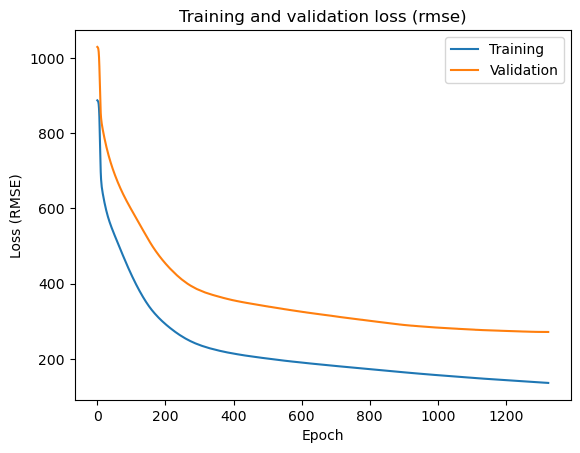

In [61]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
rmse = np.sqrt(history.history['mean_squared_error'][:1325])
val_rmse = np.sqrt(history.history['val_mean_squared_error'][:1325])

# Get number of epochs
epochs = range(len(rmse))

# Plot training and validation loss per epoch
plt.plot(epochs, rmse)
plt.plot(epochs, val_rmse)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and validation loss (rmse)')

print('Best Model: Min Training loss (RMSE) = {:.3f}, Min Validation loss (RMSE) = {:.3f}'
      .format(min(rmse), min(val_rmse)))

In [86]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))        
    model.add(tf.keras.layers.Dense(units=32,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.1, l2= 1.0),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 10.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=10.0, l2= 10.0)
                   ))
    
    model.add(tf.keras.layers.Dense(units=4,
                    activation= "relu",
                    use_bias=True,
                    bias_initializer = "he_normal",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 1.0),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=1.0, l2= 10.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 0.01),
                   ))          
    
#     model.add(tf.keras.layers.Dropout(rate=0.05))
    
    model.add(tf.keras.layers.Dense(units=1, activation = "relu",
                    use_bias=True,
                    bias_initializer = "he_uniform",
                    kernel_initializer = "he_uniform",
                    kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.1, l2=0.01),
                    bias_regularizer = tf.keras.regularizers.L1L2(l1=100.0, l2= 1.0),
                    activity_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2= 0.01),
                   ))
    
    model.compile(optimizer = 'adam', loss="mean_squared_error", metrics=["mean_squared_error"])
    
    return model

In [92]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=20)
mc = tf.keras.callbacks.ModelCheckpoint('best_model_fin_150523_6pm_3.h5', monitor='val_mean_squared_error', verbose=1, save_best_only=True)

model = build_model()
history = model.fit(X_train.values, y_train.values, epochs=2000, batch_size=8, verbose=2, shuffle = False,
                           validation_split = 0.2, callbacks = [stop_early, mc])

Epoch 1/5000

Epoch 1: val_mean_squared_error improved from inf to 1062347.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 1s - loss: 791367.9375 - mean_squared_error: 789288.1875 - val_loss: 1064313.5000 - val_mean_squared_error: 1062347.0000 - 807ms/epoch - 32ms/step
Epoch 2/5000

Epoch 2: val_mean_squared_error improved from 1062347.00000 to 1062298.37500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 791132.5000 - mean_squared_error: 789253.8750 - val_loss: 1064096.5000 - val_mean_squared_error: 1062298.3750 - 81ms/epoch - 3ms/step
Epoch 3/5000

Epoch 3: val_mean_squared_error improved from 1062298.37500 to 1061988.37500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 790831.0000 - mean_squared_error: 789095.3750 - val_loss: 1063667.7500 - val_mean_squared_error: 1061988.3750 - 86ms/epoch - 3ms/step
Epoch 4/5000

Epoch 4: val_mean_squared_error improved from 1061988.37500 to 1061351.00000, saving model to best_model_fin_150523_6p

25/25 - 0s - loss: 567571.6875 - mean_squared_error: 535063.1250 - val_loss: 827029.1250 - val_mean_squared_error: 794531.6875 - 65ms/epoch - 3ms/step
Epoch 30/5000

Epoch 30: val_mean_squared_error improved from 794531.68750 to 781827.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 556800.7500 - mean_squared_error: 522540.1875 - val_loss: 815957.4375 - val_mean_squared_error: 781827.6250 - 51ms/epoch - 2ms/step
Epoch 31/5000

Epoch 31: val_mean_squared_error improved from 781827.62500 to 770303.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 547107.6250 - mean_squared_error: 511219.4375 - val_loss: 805945.5000 - val_mean_squared_error: 770303.1875 - 57ms/epoch - 2ms/step
Epoch 32/5000

Epoch 32: val_mean_squared_error improved from 770303.18750 to 759926.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 538473.0625 - mean_squared_error: 501078.4375 - val_loss: 796970.1875 - val_mean_squared_error: 759926.8125 - 5

Epoch 58/5000

Epoch 58: val_mean_squared_error improved from 662504.25000 to 660454.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 457210.3438 - mean_squared_error: 411584.7188 - val_loss: 704850.5625 - val_mean_squared_error: 660454.6250 - 64ms/epoch - 3ms/step
Epoch 59/5000

Epoch 59: val_mean_squared_error improved from 660454.62500 to 658430.25000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 455389.1250 - mean_squared_error: 409906.5000 - val_loss: 702690.1875 - val_mean_squared_error: 658430.2500 - 54ms/epoch - 2ms/step
Epoch 60/5000

Epoch 60: val_mean_squared_error improved from 658430.25000 to 656428.68750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 453585.5000 - mean_squared_error: 408250.1562 - val_loss: 700553.1250 - val_mean_squared_error: 656428.6875 - 64ms/epoch - 3ms/step
Epoch 61/5000

Epoch 61: val_mean_squared_error improved from 656428.68750 to 654447.81250, saving model to best_model_fin_150523_

25/25 - 0s - loss: 411188.5625 - mean_squared_error: 370100.7812 - val_loss: 649193.9375 - val_mean_squared_error: 609029.0625 - 64ms/epoch - 3ms/step
Epoch 87/5000

Epoch 87: val_mean_squared_error improved from 609029.06250 to 607339.75000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 409722.1875 - mean_squared_error: 368789.4062 - val_loss: 647359.9375 - val_mean_squared_error: 607339.7500 - 53ms/epoch - 2ms/step
Epoch 88/5000

Epoch 88: val_mean_squared_error improved from 607339.75000 to 605659.93750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 408268.5625 - mean_squared_error: 367489.2812 - val_loss: 645536.5625 - val_mean_squared_error: 605659.9375 - 52ms/epoch - 2ms/step
Epoch 89/5000

Epoch 89: val_mean_squared_error improved from 605659.93750 to 603989.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 406827.4688 - mean_squared_error: 366200.5312 - val_loss: 643724.0000 - val_mean_squared_error: 603989.6250 - 6

Epoch 115/5000

Epoch 115: val_mean_squared_error improved from 565459.93750 to 564049.06250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 373796.8438 - mean_squared_error: 336606.0312 - val_loss: 600561.9375 - val_mean_squared_error: 564049.0625 - 64ms/epoch - 3ms/step
Epoch 116/5000

Epoch 116: val_mean_squared_error improved from 564049.06250 to 562647.68750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 372690.1875 - mean_squared_error: 335611.2812 - val_loss: 599055.3125 - val_mean_squared_error: 562647.6875 - 62ms/epoch - 2ms/step
Epoch 117/5000

Epoch 117: val_mean_squared_error improved from 562647.68750 to 561255.68750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 371594.7188 - mean_squared_error: 334626.1875 - val_loss: 597559.5000 - val_mean_squared_error: 561255.6875 - 77ms/epoch - 3ms/step
Epoch 118/5000

Epoch 118: val_mean_squared_error improved from 561255.68750 to 559872.06250, saving model to best_model_fin

25/25 - 0s - loss: 346368.1562 - mean_squared_error: 311809.9688 - val_loss: 562031.7500 - val_mean_squared_error: 528014.3750 - 54ms/epoch - 2ms/step
Epoch 144/5000

Epoch 144: val_mean_squared_error improved from 528014.37500 to 526833.06250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 345500.7812 - mean_squared_error: 311019.5625 - val_loss: 560776.9375 - val_mean_squared_error: 526833.0625 - 54ms/epoch - 2ms/step
Epoch 145/5000

Epoch 145: val_mean_squared_error improved from 526833.06250 to 525658.68750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 344639.4062 - mean_squared_error: 310234.1875 - val_loss: 559529.8125 - val_mean_squared_error: 525658.6875 - 50ms/epoch - 2ms/step
Epoch 146/5000

Epoch 146: val_mean_squared_error improved from 525658.68750 to 524491.68750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 343783.8750 - mean_squared_error: 309453.9062 - val_loss: 558290.5000 - val_mean_squared_error: 524491.68

Epoch 172/5000

Epoch 172: val_mean_squared_error improved from 497402.96875 to 496393.96875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 323310.0938 - mean_squared_error: 290664.4375 - val_loss: 528566.9375 - val_mean_squared_error: 496393.9688 - 56ms/epoch - 2ms/step
Epoch 173/5000

Epoch 173: val_mean_squared_error improved from 496393.96875 to 495390.46875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 322577.0312 - mean_squared_error: 289987.3438 - val_loss: 527509.5000 - val_mean_squared_error: 495390.4688 - 53ms/epoch - 2ms/step
Epoch 174/5000

Epoch 174: val_mean_squared_error improved from 495390.46875 to 494392.28125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 321847.2188 - mean_squared_error: 289312.7500 - val_loss: 526457.8125 - val_mean_squared_error: 494392.2812 - 58ms/epoch - 2ms/step
Epoch 175/5000

Epoch 175: val_mean_squared_error improved from 494392.28125 to 493399.59375, saving model to best_model_fin

25/25 - 0s - loss: 303770.8438 - mean_squared_error: 272528.5000 - val_loss: 500903.4375 - val_mean_squared_error: 470074.8125 - 54ms/epoch - 2ms/step
Epoch 201/5000

Epoch 201: val_mean_squared_error improved from 470074.81250 to 469197.96875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 303105.9688 - mean_squared_error: 271905.8125 - val_loss: 499986.5312 - val_mean_squared_error: 469197.9688 - 53ms/epoch - 2ms/step
Epoch 202/5000

Epoch 202: val_mean_squared_error improved from 469197.96875 to 468325.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 302443.5312 - mean_squared_error: 271284.7188 - val_loss: 499074.4062 - val_mean_squared_error: 468325.6250 - 50ms/epoch - 2ms/step
Epoch 203/5000

Epoch 203: val_mean_squared_error improved from 468325.62500 to 467458.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 301782.8750 - mean_squared_error: 270665.2188 - val_loss: 498167.5625 - val_mean_squared_error: 467458.31

Epoch 229/5000

Epoch 229: val_mean_squared_error improved from 447207.18750 to 446441.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 285076.8438 - mean_squared_error: 254990.0156 - val_loss: 476170.5625 - val_mean_squared_error: 446441.1562 - 94ms/epoch - 4ms/step
Epoch 230/5000

Epoch 230: val_mean_squared_error improved from 446441.15625 to 445678.59375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 284446.0312 - mean_squared_error: 254396.2500 - val_loss: 475377.4688 - val_mean_squared_error: 445678.5938 - 54ms/epoch - 2ms/step
Epoch 231/5000

Epoch 231: val_mean_squared_error improved from 445678.59375 to 444918.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 283816.3750 - mean_squared_error: 253802.4844 - val_loss: 474577.1562 - val_mean_squared_error: 444918.1562 - 66ms/epoch - 3ms/step
Epoch 232/5000

Epoch 232: val_mean_squared_error improved from 444918.15625 to 444158.46875, saving model to best_model_fin

25/25 - 0s - loss: 267653.2500 - mean_squared_error: 238481.2188 - val_loss: 454796.0000 - val_mean_squared_error: 425915.0000 - 61ms/epoch - 2ms/step
Epoch 258/5000

Epoch 258: val_mean_squared_error improved from 425915.00000 to 425210.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 267041.8750 - mean_squared_error: 237899.0312 - val_loss: 454065.2500 - val_mean_squared_error: 425210.1875 - 55ms/epoch - 2ms/step
Epoch 259/5000

Epoch 259: val_mean_squared_error improved from 425210.18750 to 424505.87500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 266430.8438 - mean_squared_error: 237317.2969 - val_loss: 453335.1250 - val_mean_squared_error: 424505.8750 - 65ms/epoch - 3ms/step
Epoch 260/5000

Epoch 260: val_mean_squared_error improved from 424505.87500 to 423803.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 265821.3438 - mean_squared_error: 236736.3594 - val_loss: 452608.0312 - val_mean_squared_error: 423803.31

Epoch 286/5000

Epoch 286: val_mean_squared_error improved from 406867.12500 to 406202.03125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 250209.9375 - mean_squared_error: 221820.4375 - val_loss: 434415.0312 - val_mean_squared_error: 406202.0312 - 51ms/epoch - 2ms/step
Epoch 287/5000

Epoch 287: val_mean_squared_error improved from 406202.03125 to 405534.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 249615.9219 - mean_squared_error: 221252.0156 - val_loss: 433727.6875 - val_mean_squared_error: 405534.6250 - 61ms/epoch - 2ms/step
Epoch 288/5000

Epoch 288: val_mean_squared_error improved from 405534.62500 to 404867.37500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 249022.8438 - mean_squared_error: 220683.7969 - val_loss: 433040.5625 - val_mean_squared_error: 404867.3750 - 69ms/epoch - 3ms/step
Epoch 289/5000

Epoch 289: val_mean_squared_error improved from 404867.37500 to 404200.90625, saving model to best_model_fin

25/25 - 0s - loss: 234056.4844 - mean_squared_error: 206249.6562 - val_loss: 415721.5625 - val_mean_squared_error: 387960.2812 - 66ms/epoch - 3ms/step
Epoch 315/5000

Epoch 315: val_mean_squared_error improved from 387960.28125 to 387325.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 233497.6719 - mean_squared_error: 205709.0469 - val_loss: 415071.6875 - val_mean_squared_error: 387325.4062 - 56ms/epoch - 2ms/step
Epoch 316/5000

Epoch 316: val_mean_squared_error improved from 387325.40625 to 386692.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 232939.8438 - mean_squared_error: 205170.0469 - val_loss: 414422.6250 - val_mean_squared_error: 386692.1562 - 58ms/epoch - 2ms/step
Epoch 317/5000

Epoch 317: val_mean_squared_error improved from 386692.15625 to 386061.53125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 232382.3594 - mean_squared_error: 204632.6094 - val_loss: 413775.4375 - val_mean_squared_error: 386061.53

Epoch 343/5000

Epoch 343: val_mean_squared_error improved from 370558.71875 to 369944.75000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 218231.1719 - mean_squared_error: 190951.9062 - val_loss: 397283.8750 - val_mean_squared_error: 369944.7500 - 56ms/epoch - 2ms/step
Epoch 344/5000

Epoch 344: val_mean_squared_error improved from 369944.75000 to 369334.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 217706.3438 - mean_squared_error: 190441.0156 - val_loss: 396664.5625 - val_mean_squared_error: 369334.4062 - 71ms/epoch - 3ms/step
Epoch 345/5000

Epoch 345: val_mean_squared_error improved from 369334.40625 to 368731.28125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 217188.2969 - mean_squared_error: 189934.7031 - val_loss: 396054.4375 - val_mean_squared_error: 368731.2812 - 52ms/epoch - 2ms/step
Epoch 346/5000

Epoch 346: val_mean_squared_error improved from 368731.28125 to 368132.84375, saving model to best_model_fin

25/25 - 0s - loss: 203951.5312 - mean_squared_error: 177119.9062 - val_loss: 380468.2500 - val_mean_squared_error: 353469.6250 - 60ms/epoch - 2ms/step
Epoch 372/5000

Epoch 372: val_mean_squared_error improved from 353469.62500 to 352870.90625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 203446.1250 - mean_squared_error: 176628.1250 - val_loss: 379859.4688 - val_mean_squared_error: 352870.9062 - 58ms/epoch - 2ms/step
Epoch 373/5000

Epoch 373: val_mean_squared_error improved from 352870.90625 to 352273.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 202941.6406 - mean_squared_error: 176136.6250 - val_loss: 379252.2500 - val_mean_squared_error: 352273.1875 - 67ms/epoch - 3ms/step
Epoch 374/5000

Epoch 374: val_mean_squared_error improved from 352273.18750 to 351674.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 202438.6719 - mean_squared_error: 175645.7969 - val_loss: 378645.0938 - val_mean_squared_error: 351674.81

Epoch 400/5000

Epoch 400: val_mean_squared_error improved from 336534.81250 to 335923.59375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 189807.0156 - mean_squared_error: 163308.3281 - val_loss: 362682.1562 - val_mean_squared_error: 335923.5938 - 57ms/epoch - 2ms/step
Epoch 401/5000

Epoch 401: val_mean_squared_error improved from 335923.59375 to 335313.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 189334.7031 - mean_squared_error: 162847.5781 - val_loss: 362062.3125 - val_mean_squared_error: 335313.4062 - 76ms/epoch - 3ms/step
Epoch 402/5000

Epoch 402: val_mean_squared_error improved from 335313.40625 to 334702.25000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 188862.6719 - mean_squared_error: 162387.1250 - val_loss: 361442.9062 - val_mean_squared_error: 334702.2500 - 55ms/epoch - 2ms/step
Epoch 403/5000

Epoch 403: val_mean_squared_error improved from 334702.25000 to 334090.03125, saving model to best_model_fin

25/25 - 0s - loss: 177010.8750 - mean_squared_error: 150794.5781 - val_loss: 345389.1562 - val_mean_squared_error: 318848.0938 - 69ms/epoch - 3ms/step
Epoch 429/5000

Epoch 429: val_mean_squared_error improved from 318848.09375 to 318223.28125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 176564.9688 - mean_squared_error: 150358.1875 - val_loss: 344758.1562 - val_mean_squared_error: 318223.2812 - 57ms/epoch - 2ms/step
Epoch 430/5000

Epoch 430: val_mean_squared_error improved from 318223.28125 to 317602.03125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 176121.3125 - mean_squared_error: 149920.9531 - val_loss: 344133.1562 - val_mean_squared_error: 317602.0312 - 62ms/epoch - 2ms/step
Epoch 431/5000

Epoch 431: val_mean_squared_error improved from 317602.03125 to 316979.46875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 175679.2188 - mean_squared_error: 149484.8750 - val_loss: 343506.8125 - val_mean_squared_error: 316979.46

Epoch 457/5000

Epoch 457: val_mean_squared_error improved from 301506.40625 to 300879.46875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 164554.1875 - mean_squared_error: 138552.3281 - val_loss: 327258.1250 - val_mean_squared_error: 300879.4688 - 67ms/epoch - 3ms/step
Epoch 458/5000

Epoch 458: val_mean_squared_error improved from 300879.46875 to 300252.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 164140.2812 - mean_squared_error: 138146.1094 - val_loss: 326626.0938 - val_mean_squared_error: 300252.8125 - 64ms/epoch - 3ms/step
Epoch 459/5000

Epoch 459: val_mean_squared_error improved from 300252.81250 to 299627.46875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 163725.6562 - mean_squared_error: 137740.0469 - val_loss: 325992.6250 - val_mean_squared_error: 299627.4688 - 52ms/epoch - 2ms/step
Epoch 460/5000

Epoch 460: val_mean_squared_error improved from 299627.46875 to 299001.18750, saving model to best_model_fin

25/25 - 0s - loss: 153422.4062 - mean_squared_error: 127577.1953 - val_loss: 309651.3750 - val_mean_squared_error: 283377.5938 - 54ms/epoch - 2ms/step
Epoch 486/5000

Epoch 486: val_mean_squared_error improved from 283377.59375 to 282769.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 153051.6406 - mean_squared_error: 127210.9062 - val_loss: 309039.4062 - val_mean_squared_error: 282769.1562 - 57ms/epoch - 2ms/step
Epoch 487/5000

Epoch 487: val_mean_squared_error improved from 282769.15625 to 282160.78125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 152682.7500 - mean_squared_error: 126846.5156 - val_loss: 308427.9688 - val_mean_squared_error: 282160.7812 - 87ms/epoch - 3ms/step
Epoch 488/5000

Epoch 488: val_mean_squared_error improved from 282160.78125 to 281553.93750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 152315.6719 - mean_squared_error: 126483.8281 - val_loss: 307817.4688 - val_mean_squared_error: 281553.93

Epoch 514/5000

Epoch 514: val_mean_squared_error improved from 266681.31250 to 266105.93750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 143333.0781 - mean_squared_error: 117599.3047 - val_loss: 292287.9062 - val_mean_squared_error: 266105.9375 - 66ms/epoch - 3ms/step
Epoch 515/5000

Epoch 515: val_mean_squared_error improved from 266105.93750 to 265532.46875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 143011.9844 - mean_squared_error: 117279.5938 - val_loss: 291712.2500 - val_mean_squared_error: 265532.4688 - 49ms/epoch - 2ms/step
Epoch 516/5000

Epoch 516: val_mean_squared_error improved from 265532.46875 to 264962.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 142690.9375 - mean_squared_error: 116960.8281 - val_loss: 291139.8438 - val_mean_squared_error: 264962.8125 - 58ms/epoch - 2ms/step
Epoch 517/5000

Epoch 517: val_mean_squared_error improved from 264962.81250 to 264394.15625, saving model to best_model_fin

25/25 - 0s - loss: 134665.5000 - mean_squared_error: 109040.6875 - val_loss: 276754.2500 - val_mean_squared_error: 250712.8594 - 60ms/epoch - 2ms/step
Epoch 543/5000

Epoch 543: val_mean_squared_error improved from 250712.85938 to 250165.64062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 134376.7188 - mean_squared_error: 108753.5938 - val_loss: 276202.7812 - val_mean_squared_error: 250165.6406 - 55ms/epoch - 2ms/step
Epoch 544/5000

Epoch 544: val_mean_squared_error improved from 250165.64062 to 249615.54688, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 134089.2812 - mean_squared_error: 108468.3750 - val_loss: 275649.6250 - val_mean_squared_error: 249615.5469 - 51ms/epoch - 2ms/step
Epoch 545/5000

Epoch 545: val_mean_squared_error improved from 249615.54688 to 249065.98438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 133802.9844 - mean_squared_error: 108184.3203 - val_loss: 275095.1875 - val_mean_squared_error: 249065.98

Epoch 571/5000

Epoch 571: val_mean_squared_error improved from 235649.87500 to 235128.34375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 126855.3906 - mean_squared_error: 101293.3516 - val_loss: 261063.9219 - val_mean_squared_error: 235128.3438 - 56ms/epoch - 2ms/step
Epoch 572/5000

Epoch 572: val_mean_squared_error improved from 235128.34375 to 234613.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 126609.9219 - mean_squared_error: 101047.0469 - val_loss: 260546.9062 - val_mean_squared_error: 234613.0000 - 54ms/epoch - 2ms/step
Epoch 573/5000

Epoch 573: val_mean_squared_error improved from 234613.00000 to 234100.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 126365.8906 - mean_squared_error: 100803.9688 - val_loss: 260030.2031 - val_mean_squared_error: 234100.0000 - 80ms/epoch - 3ms/step
Epoch 574/5000

Epoch 574: val_mean_squared_error improved from 234100.00000 to 233585.21875, saving model to best_model_fin

25/25 - 0s - loss: 120334.6172 - mean_squared_error: 94832.5781 - val_loss: 246710.0000 - val_mean_squared_error: 220892.5156 - 63ms/epoch - 3ms/step
Epoch 600/5000

Epoch 600: val_mean_squared_error improved from 220892.51562 to 220396.35938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 120115.2656 - mean_squared_error: 94614.3203 - val_loss: 246210.9219 - val_mean_squared_error: 220396.3594 - 69ms/epoch - 3ms/step
Epoch 601/5000

Epoch 601: val_mean_squared_error improved from 220396.35938 to 219901.43750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 119896.1250 - mean_squared_error: 94397.3750 - val_loss: 245710.2656 - val_mean_squared_error: 219901.4375 - 64ms/epoch - 3ms/step
Epoch 602/5000

Epoch 602: val_mean_squared_error improved from 219901.43750 to 219405.95312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 119678.0234 - mean_squared_error: 94181.9375 - val_loss: 245212.3594 - val_mean_squared_error: 219405.9531 -

Epoch 628/5000

Epoch 628: val_mean_squared_error improved from 207381.71875 to 206922.54688, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 114252.4531 - mean_squared_error: 88815.0703 - val_loss: 232603.9219 - val_mean_squared_error: 206922.5469 - 86ms/epoch - 3ms/step
Epoch 629/5000

Epoch 629: val_mean_squared_error improved from 206922.54688 to 206462.51562, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 114054.1484 - mean_squared_error: 88620.4531 - val_loss: 232137.3594 - val_mean_squared_error: 206462.5156 - 53ms/epoch - 2ms/step
Epoch 630/5000

Epoch 630: val_mean_squared_error improved from 206462.51562 to 206001.51562, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 113854.3906 - mean_squared_error: 88423.8984 - val_loss: 231670.8594 - val_mean_squared_error: 206001.5156 - 69ms/epoch - 3ms/step
Epoch 631/5000

Epoch 631: val_mean_squared_error improved from 206001.51562 to 205540.37500, saving model to best_model_fin_15

25/25 - 0s - loss: 108939.8594 - mean_squared_error: 83557.3516 - val_loss: 219912.4531 - val_mean_squared_error: 194369.4219 - 75ms/epoch - 3ms/step
Epoch 657/5000

Epoch 657: val_mean_squared_error improved from 194369.42188 to 193939.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 108762.1797 - mean_squared_error: 83379.5312 - val_loss: 219479.5156 - val_mean_squared_error: 193939.4062 - 60ms/epoch - 2ms/step
Epoch 658/5000

Epoch 658: val_mean_squared_error improved from 193939.40625 to 193511.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 108586.2422 - mean_squared_error: 83204.6406 - val_loss: 219046.4219 - val_mean_squared_error: 193511.1562 - 60ms/epoch - 2ms/step
Epoch 659/5000

Epoch 659: val_mean_squared_error improved from 193511.15625 to 193085.23438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 108410.1797 - mean_squared_error: 83030.2812 - val_loss: 218616.0781 - val_mean_squared_error: 193085.2344 -

Epoch 685/5000

Epoch 685: val_mean_squared_error improved from 182636.01562 to 182233.20312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 104005.8516 - mean_squared_error: 78676.3672 - val_loss: 207628.4844 - val_mean_squared_error: 182233.2031 - 82ms/epoch - 3ms/step
Epoch 686/5000

Epoch 686: val_mean_squared_error improved from 182233.20312 to 181828.48438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 103844.9062 - mean_squared_error: 78518.4297 - val_loss: 207218.4844 - val_mean_squared_error: 181828.4844 - 69ms/epoch - 3ms/step
Epoch 687/5000

Epoch 687: val_mean_squared_error improved from 181828.48438 to 181427.04688, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 103683.9766 - mean_squared_error: 78359.6094 - val_loss: 206811.2969 - val_mean_squared_error: 181427.0469 - 53ms/epoch - 2ms/step
Epoch 688/5000

Epoch 688: val_mean_squared_error improved from 181427.04688 to 181024.29688, saving model to best_model_fin_15

25/25 - 0s - loss: 99681.6328 - mean_squared_error: 74412.9141 - val_loss: 196871.7344 - val_mean_squared_error: 171635.7031 - 52ms/epoch - 2ms/step
Epoch 714/5000

Epoch 714: val_mean_squared_error improved from 171635.70312 to 171267.59375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 99533.9766 - mean_squared_error: 74268.6641 - val_loss: 196499.0625 - val_mean_squared_error: 171267.5938 - 61ms/epoch - 2ms/step
Epoch 715/5000

Epoch 715: val_mean_squared_error improved from 171267.59375 to 170899.20312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 99386.9922 - mean_squared_error: 74121.4375 - val_loss: 196126.3125 - val_mean_squared_error: 170899.2031 - 82ms/epoch - 3ms/step
Epoch 716/5000

Epoch 716: val_mean_squared_error improved from 170899.20312 to 170533.23438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 99241.2812 - mean_squared_error: 73977.7578 - val_loss: 195755.1875 - val_mean_squared_error: 170533.2344 - 79m

Epoch 742/5000

Epoch 742: val_mean_squared_error improved from 161744.26562 to 161421.04688, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 95586.1328 - mean_squared_error: 70380.2656 - val_loss: 186495.5469 - val_mean_squared_error: 161421.0469 - 59ms/epoch - 2ms/step
Epoch 743/5000

Epoch 743: val_mean_squared_error improved from 161421.04688 to 161090.14062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 95451.5156 - mean_squared_error: 70247.9141 - val_loss: 186160.5469 - val_mean_squared_error: 161090.1406 - 59ms/epoch - 2ms/step
Epoch 744/5000

Epoch 744: val_mean_squared_error improved from 161090.14062 to 160765.98438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 95317.3438 - mean_squared_error: 70115.4766 - val_loss: 185830.1875 - val_mean_squared_error: 160765.9844 - 55ms/epoch - 2ms/step
Epoch 745/5000

Epoch 745: val_mean_squared_error improved from 160765.98438 to 160435.37500, saving model to best_model_fin_15052

25/25 - 0s - loss: 91873.1953 - mean_squared_error: 66719.5703 - val_loss: 177660.2656 - val_mean_squared_error: 152729.0938 - 64ms/epoch - 3ms/step
Epoch 771/5000

Epoch 771: val_mean_squared_error improved from 152729.09375 to 152444.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 91747.4141 - mean_squared_error: 66596.5469 - val_loss: 177365.2969 - val_mean_squared_error: 152444.0000 - 50ms/epoch - 2ms/step
Epoch 772/5000

Epoch 772: val_mean_squared_error improved from 152444.00000 to 152147.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 91618.1094 - mean_squared_error: 66470.1250 - val_loss: 177066.3594 - val_mean_squared_error: 152147.0000 - 58ms/epoch - 2ms/step
Epoch 773/5000

Epoch 773: val_mean_squared_error improved from 152147.00000 to 151855.26562, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 91492.6250 - mean_squared_error: 66345.2812 - val_loss: 176769.6562 - val_mean_squared_error: 151855.2656 - 65m

Epoch 799/5000

Epoch 799: val_mean_squared_error improved from 145225.15625 to 144977.98438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 88536.4062 - mean_squared_error: 63406.8086 - val_loss: 169801.5469 - val_mean_squared_error: 144977.9844 - 53ms/epoch - 2ms/step
Epoch 800/5000

Epoch 800: val_mean_squared_error improved from 144977.98438 to 144740.10938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 88434.8672 - mean_squared_error: 63305.8477 - val_loss: 169557.8750 - val_mean_squared_error: 144740.1094 - 55ms/epoch - 2ms/step
Epoch 801/5000

Epoch 801: val_mean_squared_error improved from 144740.10938 to 144492.07812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 88333.6328 - mean_squared_error: 63207.2617 - val_loss: 169308.0000 - val_mean_squared_error: 144492.0781 - 64ms/epoch - 3ms/step
Epoch 802/5000

Epoch 802: val_mean_squared_error improved from 144492.07812 to 144257.34375, saving model to best_model_fin_15052

25/25 - 0s - loss: 85810.1328 - mean_squared_error: 60734.7617 - val_loss: 163418.7969 - val_mean_squared_error: 138713.5312 - 68ms/epoch - 3ms/step
Epoch 828/5000

Epoch 828: val_mean_squared_error improved from 138713.53125 to 138501.48438, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 85716.9219 - mean_squared_error: 60645.6250 - val_loss: 163203.8750 - val_mean_squared_error: 138501.4844 - 62ms/epoch - 2ms/step
Epoch 829/5000

Epoch 829: val_mean_squared_error improved from 138501.48438 to 138281.39062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 85624.2188 - mean_squared_error: 60552.4648 - val_loss: 162983.3438 - val_mean_squared_error: 138281.3906 - 66ms/epoch - 3ms/step
Epoch 830/5000

Epoch 830: val_mean_squared_error improved from 138281.39062 to 138087.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 85532.9609 - mean_squared_error: 60462.4844 - val_loss: 162780.7344 - val_mean_squared_error: 138087.0000 - 61m

Epoch 856/5000

Epoch 856: val_mean_squared_error improved from 133147.12500 to 132971.89062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 83243.3906 - mean_squared_error: 58216.7383 - val_loss: 157574.2344 - val_mean_squared_error: 132971.8906 - 61ms/epoch - 2ms/step
Epoch 857/5000

Epoch 857: val_mean_squared_error improved from 132971.89062 to 132785.90625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 83159.2656 - mean_squared_error: 58136.6172 - val_loss: 157385.0938 - val_mean_squared_error: 132785.9062 - 54ms/epoch - 2ms/step
Epoch 858/5000

Epoch 858: val_mean_squared_error improved from 132785.90625 to 132606.76562, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 83074.5156 - mean_squared_error: 58053.0859 - val_loss: 157200.7969 - val_mean_squared_error: 132606.7656 - 52ms/epoch - 2ms/step
Epoch 859/5000

Epoch 859: val_mean_squared_error improved from 132606.76562 to 132416.31250, saving model to best_model_fin_15052

25/25 - 0s - loss: 80996.7969 - mean_squared_error: 56024.0742 - val_loss: 152602.0469 - val_mean_squared_error: 128104.1484 - 57ms/epoch - 2ms/step
Epoch 885/5000

Epoch 885: val_mean_squared_error improved from 128104.14844 to 127961.42969, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 80922.7500 - mean_squared_error: 55952.2461 - val_loss: 152450.8281 - val_mean_squared_error: 127961.4297 - 59ms/epoch - 2ms/step
Epoch 886/5000

Epoch 886: val_mean_squared_error improved from 127961.42969 to 127781.24219, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 80847.0703 - mean_squared_error: 55879.7812 - val_loss: 152271.8906 - val_mean_squared_error: 127781.2422 - 66ms/epoch - 3ms/step
Epoch 887/5000

Epoch 887: val_mean_squared_error improved from 127781.24219 to 127633.14844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 80772.7031 - mean_squared_error: 55804.2070 - val_loss: 152118.0156 - val_mean_squared_error: 127633.1484 - 53m

Epoch 913/5000

Epoch 913: val_mean_squared_error improved from 123870.06250 to 123727.50781, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 78927.1328 - mean_squared_error: 54008.9648 - val_loss: 148125.1562 - val_mean_squared_error: 123727.5078 - 74ms/epoch - 3ms/step
Epoch 914/5000

Epoch 914: val_mean_squared_error improved from 123727.50781 to 123578.07031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 78860.6953 - mean_squared_error: 53943.6719 - val_loss: 147974.3438 - val_mean_squared_error: 123578.0703 - 91ms/epoch - 4ms/step
Epoch 915/5000

Epoch 915: val_mean_squared_error improved from 123578.07031 to 123422.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 78792.6719 - mean_squared_error: 53872.5898 - val_loss: 147819.3750 - val_mean_squared_error: 123422.3125 - 69ms/epoch - 3ms/step
Epoch 916/5000

Epoch 916: val_mean_squared_error improved from 123422.31250 to 123285.46094, saving model to best_model_fin_15052

25/25 - 0s - loss: 77106.1094 - mean_squared_error: 52224.7617 - val_loss: 144161.5781 - val_mean_squared_error: 119828.6094 - 59ms/epoch - 2ms/step
Epoch 942/5000

Epoch 942: val_mean_squared_error improved from 119828.60938 to 119706.32031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 77047.4609 - mean_squared_error: 52166.8281 - val_loss: 144037.6250 - val_mean_squared_error: 119706.3203 - 62ms/epoch - 2ms/step
Epoch 943/5000

Epoch 943: val_mean_squared_error improved from 119706.32031 to 119586.82812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 76990.0000 - mean_squared_error: 52110.4180 - val_loss: 143915.5156 - val_mean_squared_error: 119586.8281 - 65ms/epoch - 3ms/step
Epoch 944/5000

Epoch 944: val_mean_squared_error improved from 119586.82812 to 119470.02344, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 76933.4375 - mean_squared_error: 52057.8242 - val_loss: 143794.0469 - val_mean_squared_error: 119470.0234 - 68m

Epoch 970/5000

Epoch 970: val_mean_squared_error improved from 116531.77344 to 116424.85938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 75508.3906 - mean_squared_error: 50686.5977 - val_loss: 140681.2969 - val_mean_squared_error: 116424.8594 - 60ms/epoch - 2ms/step
Epoch 971/5000

Epoch 971: val_mean_squared_error improved from 116424.85938 to 116316.63281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 75454.5391 - mean_squared_error: 50636.0820 - val_loss: 140569.5469 - val_mean_squared_error: 116316.6328 - 50ms/epoch - 2ms/step
Epoch 972/5000

Epoch 972: val_mean_squared_error improved from 116316.63281 to 116211.21875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 75403.4375 - mean_squared_error: 50589.3281 - val_loss: 140460.5938 - val_mean_squared_error: 116211.2188 - 50ms/epoch - 2ms/step
Epoch 973/5000

Epoch 973: val_mean_squared_error improved from 116211.21875 to 116096.65625, saving model to best_model_fin_15052

25/25 - 0s - loss: 74073.8516 - mean_squared_error: 49308.1406 - val_loss: 137670.6719 - val_mean_squared_error: 113476.6172 - 68ms/epoch - 3ms/step
Epoch 999/5000

Epoch 999: val_mean_squared_error improved from 113476.61719 to 113380.64844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 74024.9062 - mean_squared_error: 49260.3047 - val_loss: 137573.8906 - val_mean_squared_error: 113380.6484 - 60ms/epoch - 2ms/step
Epoch 1000/5000

Epoch 1000: val_mean_squared_error improved from 113380.64844 to 113301.92188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 73977.4922 - mean_squared_error: 49216.2578 - val_loss: 137489.5469 - val_mean_squared_error: 113301.9219 - 54ms/epoch - 2ms/step
Epoch 1001/5000

Epoch 1001: val_mean_squared_error improved from 113301.92188 to 113199.72656, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 73927.7500 - mean_squared_error: 49169.2578 - val_loss: 137386.4219 - val_mean_squared_error: 113199.7266 -

Epoch 1027/5000

Epoch 1027: val_mean_squared_error improved from 111041.79688 to 110957.11719, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 72734.2031 - mean_squared_error: 48026.2812 - val_loss: 135094.0156 - val_mean_squared_error: 110957.1172 - 69ms/epoch - 3ms/step
Epoch 1028/5000

Epoch 1028: val_mean_squared_error improved from 110957.11719 to 110864.89844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 72689.8672 - mean_squared_error: 47982.6875 - val_loss: 134999.8750 - val_mean_squared_error: 110864.8984 - 61ms/epoch - 2ms/step
Epoch 1029/5000

Epoch 1029: val_mean_squared_error improved from 110864.89844 to 110760.10938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 72646.6484 - mean_squared_error: 47940.8828 - val_loss: 134898.6250 - val_mean_squared_error: 110760.1094 - 63ms/epoch - 3ms/step
Epoch 1030/5000

Epoch 1030: val_mean_squared_error improved from 110760.10938 to 110678.03125, saving model to best_model_f

25/25 - 0s - loss: 71543.1875 - mean_squared_error: 46888.3906 - val_loss: 132789.9062 - val_mean_squared_error: 108694.0469 - 56ms/epoch - 2ms/step
Epoch 1056/5000

Epoch 1056: val_mean_squared_error improved from 108694.04688 to 108616.75000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 71502.4375 - mean_squared_error: 46848.3398 - val_loss: 132713.6250 - val_mean_squared_error: 108616.7500 - 62ms/epoch - 2ms/step
Epoch 1057/5000

Epoch 1057: val_mean_squared_error improved from 108616.75000 to 108552.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 71463.7734 - mean_squared_error: 46813.1680 - val_loss: 132642.1562 - val_mean_squared_error: 108552.1875 - 66ms/epoch - 3ms/step
Epoch 1058/5000

Epoch 1058: val_mean_squared_error improved from 108552.18750 to 108463.28125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 71422.1016 - mean_squared_error: 46774.6875 - val_loss: 132554.7969 - val_mean_squared_error: 108463.2812

Epoch 1084/5000

Epoch 1084: val_mean_squared_error improved from 106557.09375 to 106487.59375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 70412.4219 - mean_squared_error: 45821.2891 - val_loss: 130541.6094 - val_mean_squared_error: 106487.5938 - 62ms/epoch - 2ms/step
Epoch 1085/5000

Epoch 1085: val_mean_squared_error improved from 106487.59375 to 106419.82812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 70372.8359 - mean_squared_error: 45785.4844 - val_loss: 130470.8203 - val_mean_squared_error: 106419.8281 - 68ms/epoch - 3ms/step
Epoch 1086/5000

Epoch 1086: val_mean_squared_error improved from 106419.82812 to 106321.15625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 70333.9609 - mean_squared_error: 45748.8125 - val_loss: 130376.1875 - val_mean_squared_error: 106321.1562 - 62ms/epoch - 2ms/step
Epoch 1087/5000

Epoch 1087: val_mean_squared_error improved from 106321.15625 to 106258.17969, saving model to best_model_f


Epoch 1112: val_mean_squared_error improved from 104497.82812 to 104409.20312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 69347.4219 - mean_squared_error: 44818.0469 - val_loss: 128433.5469 - val_mean_squared_error: 104409.2031 - 64ms/epoch - 3ms/step
Epoch 1113/5000

Epoch 1113: val_mean_squared_error improved from 104409.20312 to 104347.03906, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 69313.3750 - mean_squared_error: 44785.5312 - val_loss: 128366.0234 - val_mean_squared_error: 104347.0391 - 52ms/epoch - 2ms/step
Epoch 1114/5000

Epoch 1114: val_mean_squared_error improved from 104347.03906 to 104276.35156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 69274.5859 - mean_squared_error: 44750.1914 - val_loss: 128295.2891 - val_mean_squared_error: 104276.3516 - 51ms/epoch - 2ms/step
Epoch 1115/5000

Epoch 1115: val_mean_squared_error improved from 104276.35156 to 104206.89844, saving model to best_model_fin_150523_6pm_3.

25/25 - 0s - loss: 68326.0312 - mean_squared_error: 43860.6055 - val_loss: 126589.3516 - val_mean_squared_error: 102599.0938 - 55ms/epoch - 2ms/step
Epoch 1141/5000

Epoch 1141: val_mean_squared_error improved from 102599.09375 to 102543.10938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 68289.3438 - mean_squared_error: 43822.6914 - val_loss: 126532.5703 - val_mean_squared_error: 102543.1094 - 50ms/epoch - 2ms/step
Epoch 1142/5000

Epoch 1142: val_mean_squared_error improved from 102543.10938 to 102498.67188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 68256.9609 - mean_squared_error: 43797.3477 - val_loss: 126480.9766 - val_mean_squared_error: 102498.6719 - 54ms/epoch - 2ms/step
Epoch 1143/5000

Epoch 1143: val_mean_squared_error improved from 102498.67188 to 102418.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 68216.4766 - mean_squared_error: 43756.8086 - val_loss: 126406.0781 - val_mean_squared_error: 102418.8125

Epoch 1169/5000

Epoch 1169: val_mean_squared_error improved from 100809.46094 to 100735.88281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 67314.7266 - mean_squared_error: 42903.4141 - val_loss: 124702.6797 - val_mean_squared_error: 100735.8828 - 54ms/epoch - 2ms/step
Epoch 1170/5000

Epoch 1170: val_mean_squared_error improved from 100735.88281 to 100669.09375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 67284.3281 - mean_squared_error: 42877.3555 - val_loss: 124633.2578 - val_mean_squared_error: 100669.0938 - 50ms/epoch - 2ms/step
Epoch 1171/5000

Epoch 1171: val_mean_squared_error improved from 100669.09375 to 100614.39062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 67247.7891 - mean_squared_error: 42839.5664 - val_loss: 124578.4062 - val_mean_squared_error: 100614.3906 - 56ms/epoch - 2ms/step
Epoch 1172/5000

Epoch 1172: val_mean_squared_error improved from 100614.39062 to 100549.57812, saving model to best_model_f

25/25 - 0s - loss: 66380.4531 - mean_squared_error: 42028.1602 - val_loss: 122966.7891 - val_mean_squared_error: 99025.8828 - 63ms/epoch - 3ms/step
Epoch 1198/5000

Epoch 1198: val_mean_squared_error improved from 99025.88281 to 98984.84375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 66349.6484 - mean_squared_error: 42002.3477 - val_loss: 122919.3125 - val_mean_squared_error: 98984.8438 - 59ms/epoch - 2ms/step
Epoch 1199/5000

Epoch 1199: val_mean_squared_error improved from 98984.84375 to 98898.06250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 66313.0234 - mean_squared_error: 41966.9688 - val_loss: 122840.0938 - val_mean_squared_error: 98898.0625 - 59ms/epoch - 2ms/step
Epoch 1200/5000

Epoch 1200: val_mean_squared_error improved from 98898.06250 to 98852.27344, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 66284.5781 - mean_squared_error: 41939.1602 - val_loss: 122787.4688 - val_mean_squared_error: 98852.2734 - 55ms/ep

Epoch 1226/5000

Epoch 1226: val_mean_squared_error improved from 97305.82812 to 97263.92188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 65431.1211 - mean_squared_error: 41140.0312 - val_loss: 121184.8516 - val_mean_squared_error: 97263.9219 - 65ms/epoch - 3ms/step
Epoch 1227/5000

Epoch 1227: val_mean_squared_error improved from 97263.92188 to 97192.82812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 65397.0664 - mean_squared_error: 41107.4180 - val_loss: 121116.5312 - val_mean_squared_error: 97192.8281 - 59ms/epoch - 2ms/step
Epoch 1228/5000

Epoch 1228: val_mean_squared_error improved from 97192.82812 to 97141.85938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 65368.2109 - mean_squared_error: 41081.6836 - val_loss: 121062.4375 - val_mean_squared_error: 97141.8594 - 60ms/epoch - 2ms/step
Epoch 1229/5000

Epoch 1229: val_mean_squared_error improved from 97141.85938 to 97084.36719, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 64495.6562 - mean_squared_error: 40266.6602 - val_loss: 119739.5469 - val_mean_squared_error: 95827.3672 - 65ms/epoch - 3ms/step
Epoch 1255/5000

Epoch 1255: val_mean_squared_error improved from 95827.36719 to 95755.67969, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 64462.0195 - mean_squared_error: 40232.2422 - val_loss: 119669.0312 - val_mean_squared_error: 95755.6797 - 61ms/epoch - 2ms/step
Epoch 1256/5000

Epoch 1256: val_mean_squared_error improved from 95755.67969 to 95695.61719, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 64429.7891 - mean_squared_error: 40200.3164 - val_loss: 119611.2500 - val_mean_squared_error: 95695.6172 - 57ms/epoch - 2ms/step
Epoch 1257/5000

Epoch 1257: val_mean_squared_error improved from 95695.61719 to 95641.36719, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 64398.4609 - mean_squared_error: 40171.0234 - val_loss: 119553.8516 - val_mean_squared_error: 95641.3672 - 69ms/ep

Epoch 1283/5000

Epoch 1283: val_mean_squared_error improved from 94397.46094 to 94343.28906, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 63516.6016 - mean_squared_error: 39348.0781 - val_loss: 118244.8438 - val_mean_squared_error: 94343.2891 - 56ms/epoch - 2ms/step
Epoch 1284/5000

Epoch 1284: val_mean_squared_error improved from 94343.28906 to 94288.85156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 63480.6602 - mean_squared_error: 39315.1484 - val_loss: 118191.6406 - val_mean_squared_error: 94288.8516 - 73ms/epoch - 3ms/step
Epoch 1285/5000

Epoch 1285: val_mean_squared_error improved from 94288.85156 to 94244.10156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 63447.2383 - mean_squared_error: 39284.3242 - val_loss: 118143.8594 - val_mean_squared_error: 94244.1016 - 66ms/epoch - 3ms/step
Epoch 1286/5000

Epoch 1286: val_mean_squared_error improved from 94244.10156 to 94175.28906, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 62575.1055 - mean_squared_error: 38461.3242 - val_loss: 116585.2734 - val_mean_squared_error: 92687.6094 - 64ms/epoch - 3ms/step
Epoch 1312/5000

Epoch 1312: val_mean_squared_error improved from 92687.60938 to 92611.67969, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 62540.8594 - mean_squared_error: 38434.1836 - val_loss: 116512.1406 - val_mean_squared_error: 92611.6797 - 52ms/epoch - 2ms/step
Epoch 1313/5000

Epoch 1313: val_mean_squared_error improved from 92611.67969 to 92554.88281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 62507.5000 - mean_squared_error: 38397.7188 - val_loss: 116454.1797 - val_mean_squared_error: 92554.8828 - 52ms/epoch - 2ms/step
Epoch 1314/5000

Epoch 1314: val_mean_squared_error improved from 92554.88281 to 92496.07031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 62474.8789 - mean_squared_error: 38369.2109 - val_loss: 116398.4531 - val_mean_squared_error: 92496.0703 - 65ms/ep

Epoch 1340/5000

Epoch 1340: val_mean_squared_error improved from 90992.59375 to 90934.06250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 61663.0000 - mean_squared_error: 37600.5820 - val_loss: 114838.4609 - val_mean_squared_error: 90934.0625 - 52ms/epoch - 2ms/step
Epoch 1341/5000

Epoch 1341: val_mean_squared_error improved from 90934.06250 to 90905.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 61633.1953 - mean_squared_error: 37576.7969 - val_loss: 114805.0234 - val_mean_squared_error: 90905.1875 - 68ms/epoch - 3ms/step
Epoch 1342/5000

Epoch 1342: val_mean_squared_error improved from 90905.18750 to 90831.95312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 61602.0391 - mean_squared_error: 37548.7852 - val_loss: 114736.0234 - val_mean_squared_error: 90831.9531 - 63ms/epoch - 3ms/step
Epoch 1343/5000

Epoch 1343: val_mean_squared_error improved from 90831.95312 to 90759.25781, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 60841.3594 - mean_squared_error: 36837.1055 - val_loss: 113348.5234 - val_mean_squared_error: 89448.5312 - 54ms/epoch - 2ms/step
Epoch 1369/5000

Epoch 1369: val_mean_squared_error improved from 89448.53125 to 89373.67188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 60813.3477 - mean_squared_error: 36809.6680 - val_loss: 113276.8125 - val_mean_squared_error: 89373.6719 - 51ms/epoch - 2ms/step
Epoch 1370/5000

Epoch 1370: val_mean_squared_error improved from 89373.67188 to 89334.85938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 60781.8984 - mean_squared_error: 36776.6016 - val_loss: 113236.1016 - val_mean_squared_error: 89334.8594 - 52ms/epoch - 2ms/step
Epoch 1371/5000

Epoch 1371: val_mean_squared_error improved from 89334.85938 to 89275.14062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 60755.9102 - mean_squared_error: 36756.6055 - val_loss: 113177.5391 - val_mean_squared_error: 89275.1406 - 71ms/ep

Epoch 1397/5000

Epoch 1397: val_mean_squared_error improved from 88039.10156 to 87997.35938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 60017.9258 - mean_squared_error: 36063.2266 - val_loss: 111898.2188 - val_mean_squared_error: 87997.3594 - 68ms/epoch - 3ms/step
Epoch 1398/5000

Epoch 1398: val_mean_squared_error improved from 87997.35938 to 87959.77344, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 59992.9336 - mean_squared_error: 36041.5898 - val_loss: 111858.0391 - val_mean_squared_error: 87959.7734 - 68ms/epoch - 3ms/step
Epoch 1399/5000

Epoch 1399: val_mean_squared_error improved from 87959.77344 to 87929.32812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 59963.7383 - mean_squared_error: 36018.8906 - val_loss: 111826.5781 - val_mean_squared_error: 87929.3281 - 54ms/epoch - 2ms/step
Epoch 1400/5000

Epoch 1400: val_mean_squared_error improved from 87929.32812 to 87880.17969, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 59265.5820 - mean_squared_error: 35368.8477 - val_loss: 110667.3516 - val_mean_squared_error: 86769.9609 - 80ms/epoch - 3ms/step
Epoch 1426/5000

Epoch 1426: val_mean_squared_error improved from 86769.96094 to 86723.17188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 59237.8633 - mean_squared_error: 35340.1133 - val_loss: 110622.2734 - val_mean_squared_error: 86723.1719 - 57ms/epoch - 2ms/step
Epoch 1427/5000

Epoch 1427: val_mean_squared_error improved from 86723.17188 to 86670.17188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 59214.0312 - mean_squared_error: 35316.0820 - val_loss: 110574.2422 - val_mean_squared_error: 86670.1719 - 59ms/epoch - 2ms/step
Epoch 1428/5000

Epoch 1428: val_mean_squared_error improved from 86670.17188 to 86650.93750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 59188.6602 - mean_squared_error: 35295.9844 - val_loss: 110545.7891 - val_mean_squared_error: 86650.9375 - 81ms/ep

Epoch 1454/5000

Epoch 1454: val_mean_squared_error improved from 85565.82031 to 85523.82031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 58521.8125 - mean_squared_error: 34671.6016 - val_loss: 109425.3828 - val_mean_squared_error: 85523.8203 - 57ms/epoch - 2ms/step
Epoch 1455/5000

Epoch 1455: val_mean_squared_error improved from 85523.82031 to 85476.64844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 58495.2969 - mean_squared_error: 34649.6250 - val_loss: 109383.7109 - val_mean_squared_error: 85476.6484 - 59ms/epoch - 2ms/step
Epoch 1456/5000

Epoch 1456: val_mean_squared_error improved from 85476.64844 to 85427.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 58473.1602 - mean_squared_error: 34623.6875 - val_loss: 109334.5234 - val_mean_squared_error: 85427.8125 - 51ms/epoch - 2ms/step
Epoch 1457/5000

Epoch 1457: val_mean_squared_error improved from 85427.81250 to 85414.49219, saving model to best_model_fin_150523_6

Epoch 1483/5000

Epoch 1483: val_mean_squared_error improved from 84461.82031 to 84388.38281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57817.9492 - mean_squared_error: 34021.5078 - val_loss: 108299.9375 - val_mean_squared_error: 84388.3828 - 54ms/epoch - 2ms/step
Epoch 1484/5000

Epoch 1484: val_mean_squared_error improved from 84388.38281 to 84369.14062, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57797.2734 - mean_squared_error: 34003.7266 - val_loss: 108272.3438 - val_mean_squared_error: 84369.1406 - 49ms/epoch - 2ms/step
Epoch 1485/5000

Epoch 1485: val_mean_squared_error improved from 84369.14062 to 84315.03906, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57769.6445 - mean_squared_error: 33975.2656 - val_loss: 108225.9688 - val_mean_squared_error: 84315.0391 - 49ms/epoch - 2ms/step
Epoch 1486/5000

Epoch 1486: val_mean_squared_error improved from 84315.03906 to 84309.21094, saving model to best_model_fin_150523_6

Epoch 1512/5000

Epoch 1512: val_mean_squared_error improved from 83383.82812 to 83350.64844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57144.7422 - mean_squared_error: 33406.3281 - val_loss: 107253.5781 - val_mean_squared_error: 83350.6484 - 70ms/epoch - 3ms/step
Epoch 1513/5000

Epoch 1513: val_mean_squared_error improved from 83350.64844 to 83306.63281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57121.5703 - mean_squared_error: 33381.4062 - val_loss: 107209.5703 - val_mean_squared_error: 83306.6328 - 68ms/epoch - 3ms/step
Epoch 1514/5000

Epoch 1514: val_mean_squared_error improved from 83306.63281 to 83283.70312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 57101.2539 - mean_squared_error: 33369.2188 - val_loss: 107184.2969 - val_mean_squared_error: 83283.7031 - 60ms/epoch - 2ms/step
Epoch 1515/5000

Epoch 1515: val_mean_squared_error improved from 83283.70312 to 83237.96875, saving model to best_model_fin_150523_6

Epoch 1541/5000

Epoch 1541: val_mean_squared_error improved from 82363.88281 to 82342.58594, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 56485.5234 - mean_squared_error: 32806.3203 - val_loss: 106233.5625 - val_mean_squared_error: 82342.5859 - 54ms/epoch - 2ms/step
Epoch 1542/5000

Epoch 1542: val_mean_squared_error improved from 82342.58594 to 82272.42188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 56455.5039 - mean_squared_error: 32774.4023 - val_loss: 106173.3516 - val_mean_squared_error: 82272.4219 - 58ms/epoch - 2ms/step
Epoch 1543/5000

Epoch 1543: val_mean_squared_error did not improve from 82272.42188
25/25 - 0s - loss: 56439.9805 - mean_squared_error: 32768.1602 - val_loss: 106162.7578 - val_mean_squared_error: 82277.9688 - 43ms/epoch - 2ms/step
Epoch 1544/5000

Epoch 1544: val_mean_squared_error improved from 82272.42188 to 82216.25781, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 56410.4883 - mean_squared_err

Epoch 1570/5000

Epoch 1570: val_mean_squared_error improved from 81378.23438 to 81320.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55767.5820 - mean_squared_error: 32146.6699 - val_loss: 105219.6328 - val_mean_squared_error: 81320.4062 - 64ms/epoch - 3ms/step
Epoch 1571/5000

Epoch 1571: val_mean_squared_error improved from 81320.40625 to 81306.03125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55745.6367 - mean_squared_error: 32122.8418 - val_loss: 105197.5312 - val_mean_squared_error: 81306.0312 - 57ms/epoch - 2ms/step
Epoch 1572/5000

Epoch 1572: val_mean_squared_error improved from 81306.03125 to 81250.20312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55719.7109 - mean_squared_error: 32100.8848 - val_loss: 105149.3672 - val_mean_squared_error: 81250.2031 - 66ms/epoch - 3ms/step
Epoch 1573/5000

Epoch 1573: val_mean_squared_error improved from 81250.20312 to 81196.58594, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 55097.4023 - mean_squared_error: 31515.0684 - val_loss: 104378.6719 - val_mean_squared_error: 80468.6875 - 66ms/epoch - 3ms/step
Epoch 1600/5000

Epoch 1600: val_mean_squared_error improved from 80468.68750 to 80437.21875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55075.8047 - mean_squared_error: 31497.5684 - val_loss: 104343.1094 - val_mean_squared_error: 80437.2188 - 57ms/epoch - 2ms/step
Epoch 1601/5000

Epoch 1601: val_mean_squared_error improved from 80437.21875 to 80418.35156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55053.1680 - mean_squared_error: 31479.2598 - val_loss: 104323.9297 - val_mean_squared_error: 80418.3516 - 51ms/epoch - 2ms/step
Epoch 1602/5000

Epoch 1602: val_mean_squared_error improved from 80418.35156 to 80387.28906, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 55029.3477 - mean_squared_error: 31455.9727 - val_loss: 104294.5938 - val_mean_squared_error: 80387.2891 - 73ms/ep


Epoch 1628: val_mean_squared_error improved from 79529.11719 to 79491.32031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 54431.9766 - mean_squared_error: 30910.5625 - val_loss: 103399.3516 - val_mean_squared_error: 79491.3203 - 68ms/epoch - 3ms/step
Epoch 1629/5000

Epoch 1629: val_mean_squared_error improved from 79491.32031 to 79441.89844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 54404.7578 - mean_squared_error: 30886.9082 - val_loss: 103354.8438 - val_mean_squared_error: 79441.8984 - 61ms/epoch - 2ms/step
Epoch 1630/5000

Epoch 1630: val_mean_squared_error improved from 79441.89844 to 79407.62500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 54384.7578 - mean_squared_error: 30867.0547 - val_loss: 103319.0000 - val_mean_squared_error: 79407.6250 - 54ms/epoch - 2ms/step
Epoch 1631/5000

Epoch 1631: val_mean_squared_error improved from 79407.62500 to 79370.89844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 

Epoch 1657/5000

Epoch 1657: val_mean_squared_error improved from 78506.61719 to 78437.46094, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53777.5508 - mean_squared_error: 30309.4746 - val_loss: 102358.2734 - val_mean_squared_error: 78437.4609 - 55ms/epoch - 2ms/step
Epoch 1658/5000

Epoch 1658: val_mean_squared_error improved from 78437.46094 to 78423.07812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53752.3438 - mean_squared_error: 30278.8359 - val_loss: 102340.0391 - val_mean_squared_error: 78423.0781 - 66ms/epoch - 3ms/step
Epoch 1659/5000

Epoch 1659: val_mean_squared_error improved from 78423.07812 to 78373.81250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53733.2930 - mean_squared_error: 30263.9883 - val_loss: 102296.5078 - val_mean_squared_error: 78373.8125 - 65ms/epoch - 3ms/step
Epoch 1660/5000

Epoch 1660: val_mean_squared_error improved from 78373.81250 to 78365.71875, saving model to best_model_fin_150523_6

25/25 - 0s - loss: 53161.3828 - mean_squared_error: 29741.5977 - val_loss: 101387.8516 - val_mean_squared_error: 77461.6484 - 55ms/epoch - 2ms/step
Epoch 1686/5000

Epoch 1686: val_mean_squared_error improved from 77461.64844 to 77449.12500, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53134.6719 - mean_squared_error: 29712.8867 - val_loss: 101370.3281 - val_mean_squared_error: 77449.1250 - 48ms/epoch - 2ms/step
Epoch 1687/5000

Epoch 1687: val_mean_squared_error improved from 77449.12500 to 77395.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53118.3477 - mean_squared_error: 29705.5371 - val_loss: 101323.3594 - val_mean_squared_error: 77395.1875 - 51ms/epoch - 2ms/step
Epoch 1688/5000

Epoch 1688: val_mean_squared_error improved from 77395.18750 to 77363.47656, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 53093.0234 - mean_squared_error: 29674.7227 - val_loss: 101287.0625 - val_mean_squared_error: 77363.4766 - 67ms/ep

Epoch 1714/5000

Epoch 1714: val_mean_squared_error improved from 76415.17969 to 76372.75781, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 52517.3633 - mean_squared_error: 29142.7266 - val_loss: 100320.9688 - val_mean_squared_error: 76372.7578 - 68ms/epoch - 3ms/step
Epoch 1715/5000

Epoch 1715: val_mean_squared_error improved from 76372.75781 to 76329.41406, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 52500.5859 - mean_squared_error: 29130.1484 - val_loss: 100273.1875 - val_mean_squared_error: 76329.4141 - 76ms/epoch - 3ms/step
Epoch 1716/5000

Epoch 1716: val_mean_squared_error improved from 76329.41406 to 76289.00000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 52469.1406 - mean_squared_error: 29096.5781 - val_loss: 100237.6016 - val_mean_squared_error: 76289.0000 - 62ms/epoch - 2ms/step
Epoch 1717/5000

Epoch 1717: val_mean_squared_error improved from 76289.00000 to 76248.43750, saving model to best_model_fin_150523_6

Epoch 1743/5000

Epoch 1743: val_mean_squared_error improved from 75447.87500 to 75423.53125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51887.3438 - mean_squared_error: 28556.9883 - val_loss: 99394.7031 - val_mean_squared_error: 75423.5312 - 54ms/epoch - 2ms/step
Epoch 1744/5000

Epoch 1744: val_mean_squared_error improved from 75423.53125 to 75392.26562, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51860.1328 - mean_squared_error: 28526.7676 - val_loss: 99371.9219 - val_mean_squared_error: 75392.2656 - 52ms/epoch - 2ms/step
Epoch 1745/5000

Epoch 1745: val_mean_squared_error improved from 75392.26562 to 75377.86719, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51846.8633 - mean_squared_error: 28519.2754 - val_loss: 99350.5312 - val_mean_squared_error: 75377.8672 - 59ms/epoch - 2ms/step
Epoch 1746/5000

Epoch 1746: val_mean_squared_error improved from 75377.86719 to 75340.86719, saving model to best_model_fin_150523_6pm_

25/25 - 0s - loss: 51305.8125 - mean_squared_error: 28019.5410 - val_loss: 98590.2969 - val_mean_squared_error: 74586.9219 - 57ms/epoch - 2ms/step
Epoch 1772/5000

Epoch 1772: val_mean_squared_error improved from 74586.92188 to 74571.43750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51288.0039 - mean_squared_error: 28003.2188 - val_loss: 98568.7891 - val_mean_squared_error: 74571.4375 - 56ms/epoch - 2ms/step
Epoch 1773/5000

Epoch 1773: val_mean_squared_error improved from 74571.43750 to 74523.06250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51266.9102 - mean_squared_error: 27986.1406 - val_loss: 98529.5625 - val_mean_squared_error: 74523.0625 - 53ms/epoch - 2ms/step
Epoch 1774/5000

Epoch 1774: val_mean_squared_error improved from 74523.06250 to 74496.00781, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 51247.4609 - mean_squared_error: 27962.1152 - val_loss: 98501.4922 - val_mean_squared_error: 74496.0078 - 49ms/epoch 

25/25 - 0s - loss: 50755.8438 - mean_squared_error: 27514.8555 - val_loss: 97841.0391 - val_mean_squared_error: 73810.3750 - 60ms/epoch - 2ms/step
Epoch 1801/5000

Epoch 1801: val_mean_squared_error did not improve from 73810.37500
25/25 - 0s - loss: 50743.2188 - mean_squared_error: 27503.2598 - val_loss: 97837.7109 - val_mean_squared_error: 73821.7656 - 38ms/epoch - 2ms/step
Epoch 1802/5000

Epoch 1802: val_mean_squared_error improved from 73810.37500 to 73778.70312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 50717.6445 - mean_squared_error: 27482.4590 - val_loss: 97800.7266 - val_mean_squared_error: 73778.7031 - 51ms/epoch - 2ms/step
Epoch 1803/5000

Epoch 1803: val_mean_squared_error improved from 73778.70312 to 73738.71094, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 50703.0352 - mean_squared_error: 27466.5430 - val_loss: 97764.5625 - val_mean_squared_error: 73738.7109 - 50ms/epoch - 2ms/step
Epoch 1804/5000

Epoch 1804: val_mean_squared

25/25 - 0s - loss: 50211.9648 - mean_squared_error: 27022.9453 - val_loss: 97129.5312 - val_mean_squared_error: 73097.5312 - 60ms/epoch - 2ms/step
Epoch 1831/5000

Epoch 1831: val_mean_squared_error improved from 73097.53125 to 73066.18750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 50186.7070 - mean_squared_error: 26997.4746 - val_loss: 97104.2188 - val_mean_squared_error: 73066.1875 - 67ms/epoch - 3ms/step
Epoch 1832/5000

Epoch 1832: val_mean_squared_error improved from 73066.18750 to 73033.20312, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 50177.7188 - mean_squared_error: 26997.6230 - val_loss: 97067.4531 - val_mean_squared_error: 73033.2031 - 52ms/epoch - 2ms/step
Epoch 1833/5000

Epoch 1833: val_mean_squared_error improved from 73033.20312 to 73014.89844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 50154.6914 - mean_squared_error: 26972.1484 - val_loss: 97049.6484 - val_mean_squared_error: 73014.8984 - 52ms/epoch 

25/25 - 0s - loss: 49678.6914 - mean_squared_error: 26544.4043 - val_loss: 96442.2500 - val_mean_squared_error: 72391.9531 - 61ms/epoch - 2ms/step
Epoch 1861/5000

Epoch 1861: val_mean_squared_error improved from 72391.95312 to 72383.93750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 49669.4258 - mean_squared_error: 26541.3535 - val_loss: 96418.5781 - val_mean_squared_error: 72383.9375 - 59ms/epoch - 2ms/step
Epoch 1862/5000

Epoch 1862: val_mean_squared_error improved from 72383.93750 to 72331.61719, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 49646.2109 - mean_squared_error: 26520.8125 - val_loss: 96383.6016 - val_mean_squared_error: 72331.6172 - 54ms/epoch - 2ms/step
Epoch 1863/5000

Epoch 1863: val_mean_squared_error did not improve from 72331.61719
25/25 - 0s - loss: 49631.0625 - mean_squared_error: 26506.6035 - val_loss: 96411.2422 - val_mean_squared_error: 72376.6328 - 39ms/epoch - 2ms/step
Epoch 1864/5000

Epoch 1864: val_mean_squared

25/25 - 0s - loss: 49170.0664 - mean_squared_error: 26100.9668 - val_loss: 95781.2031 - val_mean_squared_error: 71727.7578 - 62ms/epoch - 2ms/step
Epoch 1891/5000

Epoch 1891: val_mean_squared_error improved from 71727.75781 to 71703.64844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 49147.1523 - mean_squared_error: 26073.1230 - val_loss: 95760.5078 - val_mean_squared_error: 71703.6484 - 65ms/epoch - 3ms/step
Epoch 1892/5000

Epoch 1892: val_mean_squared_error did not improve from 71703.64844
25/25 - 0s - loss: 49138.1406 - mean_squared_error: 26072.5195 - val_loss: 95757.7031 - val_mean_squared_error: 71707.1953 - 47ms/epoch - 2ms/step
Epoch 1893/5000

Epoch 1893: val_mean_squared_error improved from 71703.64844 to 71677.72656, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 49117.1055 - mean_squared_error: 26056.6797 - val_loss: 95733.2969 - val_mean_squared_error: 71677.7266 - 57ms/epoch - 2ms/step
Epoch 1894/5000

Epoch 1894: val_mean_squared

Epoch 1920/5000

Epoch 1920: val_mean_squared_error did not improve from 71069.32812
25/25 - 0s - loss: 48668.9805 - mean_squared_error: 25649.0527 - val_loss: 95140.6484 - val_mean_squared_error: 71071.5938 - 39ms/epoch - 2ms/step
Epoch 1921/5000

Epoch 1921: val_mean_squared_error improved from 71069.32812 to 71049.92969, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48656.8086 - mean_squared_error: 25644.6230 - val_loss: 95126.7188 - val_mean_squared_error: 71049.9297 - 60ms/epoch - 2ms/step
Epoch 1922/5000

Epoch 1922: val_mean_squared_error improved from 71049.92969 to 71018.25000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48640.6602 - mean_squared_error: 25625.6270 - val_loss: 95084.4766 - val_mean_squared_error: 71018.2500 - 63ms/epoch - 3ms/step
Epoch 1923/5000

Epoch 1923: val_mean_squared_error improved from 71018.25000 to 70982.17188, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48624.2617 - mean_squared_error:


Epoch 1949: val_mean_squared_error improved from 70482.43750 to 70481.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48207.6445 - mean_squared_error: 25243.3223 - val_loss: 94564.8672 - val_mean_squared_error: 70481.3125 - 57ms/epoch - 2ms/step
Epoch 1950/5000

Epoch 1950: val_mean_squared_error improved from 70481.31250 to 70436.78125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48198.5195 - mean_squared_error: 25238.9570 - val_loss: 94518.2266 - val_mean_squared_error: 70436.7812 - 63ms/epoch - 3ms/step
Epoch 1951/5000

Epoch 1951: val_mean_squared_error improved from 70436.78125 to 70416.60156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 48176.8633 - mean_squared_error: 25212.4805 - val_loss: 94501.1016 - val_mean_squared_error: 70416.6016 - 62ms/epoch - 2ms/step
Epoch 1952/5000

Epoch 1952: val_mean_squared_error improved from 70416.60156 to 70414.96875, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s 

Epoch 1979/5000

Epoch 1979: val_mean_squared_error did not improve from 69918.08594
25/25 - 0s - loss: 47753.2773 - mean_squared_error: 24852.0156 - val_loss: 94031.2109 - val_mean_squared_error: 69954.7578 - 50ms/epoch - 2ms/step
Epoch 1980/5000

Epoch 1980: val_mean_squared_error improved from 69918.08594 to 69879.10156, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 47727.5820 - mean_squared_error: 24820.9062 - val_loss: 93975.3125 - val_mean_squared_error: 69879.1016 - 65ms/epoch - 3ms/step
Epoch 1981/5000

Epoch 1981: val_mean_squared_error did not improve from 69879.10156
25/25 - 0s - loss: 47722.4492 - mean_squared_error: 24818.6133 - val_loss: 93978.1094 - val_mean_squared_error: 69897.5625 - 47ms/epoch - 2ms/step
Epoch 1982/5000

Epoch 1982: val_mean_squared_error improved from 69879.10156 to 69853.24219, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 47699.6953 - mean_squared_error: 24798.6191 - val_loss: 93947.4531 - val_mean_squared_er

25/25 - 0s - loss: 47299.3672 - mean_squared_error: 24452.8340 - val_loss: 93550.3594 - val_mean_squared_error: 69460.5703 - 49ms/epoch - 2ms/step
Epoch 2010/5000

Epoch 2010: val_mean_squared_error improved from 69450.29688 to 69422.07812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 47287.1211 - mean_squared_error: 24445.0977 - val_loss: 93511.2734 - val_mean_squared_error: 69422.0781 - 58ms/epoch - 2ms/step
Epoch 2011/5000

Epoch 2011: val_mean_squared_error improved from 69422.07812 to 69412.75000, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 47264.1406 - mean_squared_error: 24419.7695 - val_loss: 93504.1016 - val_mean_squared_error: 69412.7500 - 61ms/epoch - 2ms/step
Epoch 2012/5000

Epoch 2012: val_mean_squared_error improved from 69412.75000 to 69397.40625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 47250.0977 - mean_squared_error: 24406.5547 - val_loss: 93494.0703 - val_mean_squared_error: 69397.4062 - 61ms/epoch 

Epoch 2040/5000

Epoch 2040: val_mean_squared_error did not improve from 68935.67969
25/25 - 0s - loss: 46773.4297 - mean_squared_error: 23982.3613 - val_loss: 93036.9922 - val_mean_squared_error: 68937.2031 - 55ms/epoch - 2ms/step
Epoch 2041/5000

Epoch 2041: val_mean_squared_error improved from 68935.67969 to 68919.99219, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 46756.6602 - mean_squared_error: 23971.9043 - val_loss: 93020.0000 - val_mean_squared_error: 68919.9922 - 67ms/epoch - 3ms/step
Epoch 2042/5000

Epoch 2042: val_mean_squared_error improved from 68919.99219 to 68866.82031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 46736.4805 - mean_squared_error: 23942.7617 - val_loss: 92982.4219 - val_mean_squared_error: 68866.8203 - 66ms/epoch - 3ms/step
Epoch 2043/5000

Epoch 2043: val_mean_squared_error did not improve from 68866.82031
25/25 - 0s - loss: 46729.7812 - mean_squared_error: 23942.3652 - val_loss: 92979.7969 - val_mean_squared_er

Epoch 2070/5000

Epoch 2070: val_mean_squared_error did not improve from 68244.72656
25/25 - 0s - loss: 46256.6211 - mean_squared_error: 23519.8965 - val_loss: 92366.6016 - val_mean_squared_error: 68258.9453 - 39ms/epoch - 2ms/step
Epoch 2071/5000

Epoch 2071: val_mean_squared_error improved from 68244.72656 to 68214.43750, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 46234.1445 - mean_squared_error: 23495.0352 - val_loss: 92330.2891 - val_mean_squared_error: 68214.4375 - 62ms/epoch - 2ms/step
Epoch 2072/5000

Epoch 2072: val_mean_squared_error improved from 68214.43750 to 68213.65625, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 46219.4375 - mean_squared_error: 23481.9902 - val_loss: 92326.2812 - val_mean_squared_error: 68213.6562 - 59ms/epoch - 2ms/step
Epoch 2073/5000

Epoch 2073: val_mean_squared_error improved from 68213.65625 to 68176.67969, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 46200.2070 - mean_squared_error:

25/25 - 0s - loss: 45755.1055 - mean_squared_error: 23066.7227 - val_loss: 91861.8984 - val_mean_squared_error: 67731.4062 - 59ms/epoch - 2ms/step
Epoch 2101/5000

Epoch 2101: val_mean_squared_error improved from 67731.40625 to 67694.03125, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 45736.8750 - mean_squared_error: 23047.5957 - val_loss: 91833.4062 - val_mean_squared_error: 67694.0312 - 57ms/epoch - 2ms/step
Epoch 2102/5000

Epoch 2102: val_mean_squared_error did not improve from 67694.03125
25/25 - 0s - loss: 45726.5742 - mean_squared_error: 23043.3203 - val_loss: 91851.3516 - val_mean_squared_error: 67721.4062 - 39ms/epoch - 2ms/step
Epoch 2103/5000

Epoch 2103: val_mean_squared_error improved from 67694.03125 to 67656.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 45701.8984 - mean_squared_error: 23013.6562 - val_loss: 91792.8438 - val_mean_squared_error: 67656.3125 - 62ms/epoch - 2ms/step
Epoch 2104/5000

Epoch 2104: val_mean_squared

25/25 - 0s - loss: 45250.7617 - mean_squared_error: 22616.0371 - val_loss: 91450.7266 - val_mean_squared_error: 67296.1328 - 60ms/epoch - 2ms/step
Epoch 2132/5000

Epoch 2132: val_mean_squared_error did not improve from 67296.13281
25/25 - 0s - loss: 45236.0195 - mean_squared_error: 22597.8477 - val_loss: 91467.5078 - val_mean_squared_error: 67317.2578 - 43ms/epoch - 2ms/step
Epoch 2133/5000

Epoch 2133: val_mean_squared_error did not improve from 67296.13281
25/25 - 0s - loss: 45218.2891 - mean_squared_error: 22583.1641 - val_loss: 91467.6875 - val_mean_squared_error: 67313.9375 - 39ms/epoch - 2ms/step
Epoch 2134/5000

Epoch 2134: val_mean_squared_error did not improve from 67296.13281
25/25 - 0s - loss: 45204.3320 - mean_squared_error: 22569.6777 - val_loss: 91453.9219 - val_mean_squared_error: 67303.0000 - 49ms/epoch - 2ms/step
Epoch 2135/5000

Epoch 2135: val_mean_squared_error improved from 67296.13281 to 67279.89844, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - los


Epoch 2163: val_mean_squared_error did not improve from 67038.81250
25/25 - 0s - loss: 44747.8945 - mean_squared_error: 22163.9375 - val_loss: 91212.3438 - val_mean_squared_error: 67043.3438 - 48ms/epoch - 2ms/step
Epoch 2164/5000

Epoch 2164: val_mean_squared_error improved from 67038.81250 to 67014.13281, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 44728.0664 - mean_squared_error: 22140.7168 - val_loss: 91186.1797 - val_mean_squared_error: 67014.1328 - 66ms/epoch - 3ms/step
Epoch 2165/5000

Epoch 2165: val_mean_squared_error improved from 67014.13281 to 67013.07812, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 44711.3086 - mean_squared_error: 22127.5410 - val_loss: 91186.8984 - val_mean_squared_error: 67013.0781 - 61ms/epoch - 2ms/step
Epoch 2166/5000

Epoch 2166: val_mean_squared_error improved from 67013.07812 to 66982.32031, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 44692.5391 - mean_squared_error: 22105.5762 - va

25/25 - 0s - loss: 44230.0117 - mean_squared_error: 21689.0664 - val_loss: 90871.0391 - val_mean_squared_error: 66669.0312 - 60ms/epoch - 2ms/step
Epoch 2194/5000

Epoch 2194: val_mean_squared_error improved from 66669.03125 to 66660.35938, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 44208.9297 - mean_squared_error: 21666.4688 - val_loss: 90863.7031 - val_mean_squared_error: 66660.3594 - 52ms/epoch - 2ms/step
Epoch 2195/5000

Epoch 2195: val_mean_squared_error improved from 66660.35938 to 66626.34375, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 44195.5117 - mean_squared_error: 21654.4688 - val_loss: 90834.9375 - val_mean_squared_error: 66626.3438 - 59ms/epoch - 2ms/step
Epoch 2196/5000

Epoch 2196: val_mean_squared_error did not improve from 66626.34375
25/25 - 0s - loss: 44175.3789 - mean_squared_error: 21636.9336 - val_loss: 90861.0391 - val_mean_squared_error: 66658.8828 - 50ms/epoch - 2ms/step
Epoch 2197/5000

Epoch 2197: val_mean_squared

25/25 - 0s - loss: 43712.5117 - mean_squared_error: 21202.7090 - val_loss: 90654.3203 - val_mean_squared_error: 66412.7578 - 54ms/epoch - 2ms/step
Epoch 2225/5000

Epoch 2225: val_mean_squared_error did not improve from 66412.75781
25/25 - 0s - loss: 43695.4102 - mean_squared_error: 21194.2266 - val_loss: 90667.7109 - val_mean_squared_error: 66432.9375 - 38ms/epoch - 2ms/step
Epoch 2226/5000

Epoch 2226: val_mean_squared_error did not improve from 66412.75781
25/25 - 0s - loss: 43682.8594 - mean_squared_error: 21183.1582 - val_loss: 90651.2891 - val_mean_squared_error: 66414.1719 - 44ms/epoch - 2ms/step
Epoch 2227/5000

Epoch 2227: val_mean_squared_error did not improve from 66412.75781
25/25 - 0s - loss: 43661.8750 - mean_squared_error: 21163.3262 - val_loss: 90662.0000 - val_mean_squared_error: 66425.3047 - 49ms/epoch - 2ms/step
Epoch 2228/5000

Epoch 2228: val_mean_squared_error did not improve from 66412.75781
25/25 - 0s - loss: 43650.1172 - mean_squared_error: 21153.0801 - val_los

25/25 - 0s - loss: 43198.9141 - mean_squared_error: 20736.0156 - val_loss: 90550.0781 - val_mean_squared_error: 66285.7031 - 47ms/epoch - 2ms/step
Epoch 2258/5000

Epoch 2258: val_mean_squared_error did not improve from 66285.70312
25/25 - 0s - loss: 43188.2461 - mean_squared_error: 20735.1660 - val_loss: 90598.5000 - val_mean_squared_error: 66336.1016 - 36ms/epoch - 1ms/step
Epoch 2259/5000

Epoch 2259: val_mean_squared_error did not improve from 66285.70312
25/25 - 0s - loss: 43171.8984 - mean_squared_error: 20712.2656 - val_loss: 90582.5625 - val_mean_squared_error: 66318.4922 - 39ms/epoch - 2ms/step
Epoch 2260/5000

Epoch 2260: val_mean_squared_error improved from 66285.70312 to 66279.31250, saving model to best_model_fin_150523_6pm_3.h5
25/25 - 0s - loss: 43157.7773 - mean_squared_error: 20698.8672 - val_loss: 90547.7031 - val_mean_squared_error: 66279.3125 - 63ms/epoch - 3ms/step
Epoch 2261/5000

Epoch 2261: val_mean_squared_error did not improve from 66279.31250
25/25 - 0s - los

Epoch 2292/5000

Epoch 2292: val_mean_squared_error did not improve from 66238.87500
25/25 - 0s - loss: 42683.8164 - mean_squared_error: 20279.3945 - val_loss: 90557.8594 - val_mean_squared_error: 66274.3359 - 36ms/epoch - 1ms/step
Epoch 2293/5000

Epoch 2293: val_mean_squared_error did not improve from 66238.87500
25/25 - 0s - loss: 42673.5195 - mean_squared_error: 20265.9121 - val_loss: 90549.7266 - val_mean_squared_error: 66261.8594 - 36ms/epoch - 1ms/step
Epoch 2294/5000

Epoch 2294: val_mean_squared_error did not improve from 66238.87500
25/25 - 0s - loss: 42658.2578 - mean_squared_error: 20254.6797 - val_loss: 90555.3516 - val_mean_squared_error: 66276.0312 - 37ms/epoch - 1ms/step
Epoch 2295/5000

Epoch 2295: val_mean_squared_error did not improve from 66238.87500
25/25 - 0s - loss: 42638.9961 - mean_squared_error: 20239.7051 - val_loss: 90550.3906 - val_mean_squared_error: 66263.3594 - 53ms/epoch - 2ms/step
Epoch 2296/5000

Epoch 2296: val_mean_squared_error did not improve from

Best Model: Min Training loss (RMSE) = 141.589, Min Validation loss (RMSE) = 257.369


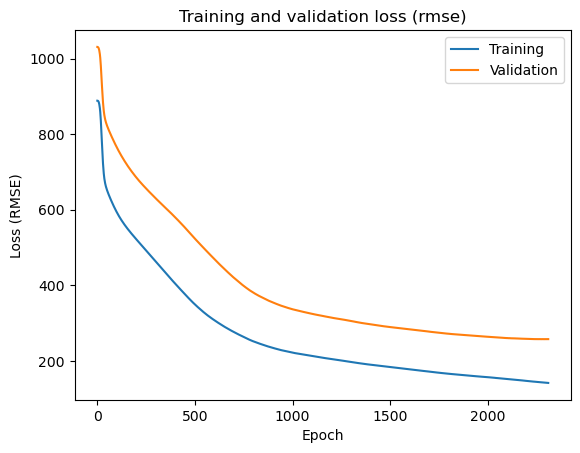

In [93]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
rmse = np.sqrt(history.history['mean_squared_error'])
val_rmse = np.sqrt(history.history['val_mean_squared_error'])

# Get number of epochs
epochs = range(len(rmse))

# Plot training and validation loss per epoch
plt.plot(epochs, rmse)
plt.plot(epochs, val_rmse)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and validation loss (rmse)')

print('Best Model: Min Training loss (RMSE) = {:.3f}, Min Validation loss (RMSE) = {:.3f}'
      .format(min(rmse), min(val_rmse)))

In [28]:
model.save('C:\\Users\\Dimas\\Documents\\TI\\TA\\3 Python\\Coba_nn')

INFO:tensorflow:Assets written to: C:\Users\Dimas\Documents\TI\TA\3 Python\Coba_nn\assets


INFO:tensorflow:Assets written to: C:\Users\Dimas\Documents\TI\TA\3 Python\Coba_nn\assets


# Final Evaluation and Visualization

In [24]:
Time_train, time_test = sklearn.model_selection.train_test_split(df.iloc[:,-2:], test_size = 0.2, random_state = 15)
time_train, time_val = sklearn.model_selection.train_test_split(Time_train, test_size = 0.2, random_state = 15)

In [31]:
print(len(time_train))
print(len(time_val))
print(len(time_test))
print(len(time_val) + len(time_test) + len(time_train))

198
50
62
310


In [32]:
x_train, x_val, y_train_, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = 15)

In [33]:
# load the saved model
saved_model = load_model('best_model_fin_150523_6pm_2.h5')
print(saved_model.summary())
y_pred_train = saved_model.predict(x_train.values)
y_pred_val = saved_model.predict(x_val.values)
y_pred_test = saved_model.predict(X_test.values)

train_score = saved_model.evaluate(x_train, y_train_)
val_score = saved_model.evaluate(x_val, y_val)
test_score = saved_model.evaluate(X_test, y_test)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                1792      
                                                                 
 dense_64 (Dense)            (None, 4)                 132       
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,929
Trainable params: 1,929
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 2ms/step - loss: 56714.5391 - mean_squared_error: 38553.6133


In [34]:
#Evaluating model prediction
y_preds = [y_pred_train, y_pred_val, y_pred_test]
ys = [y_train_, y_val, y_test]

for i in range(3):
    print('\nR2: {:.3f}'.format(sklearn.metrics.r2_score(ys[i], y_preds[i])))
    print('Mean Absolute Error: {:.2f}'.format(sklearn.metrics.mean_absolute_error(ys[i], y_preds[i])))
    print('Mean Absolute Percentage Error: {:.2f} %'.format(sklearn.metrics.mean_absolute_percentage_error(ys[i], y_preds[i])*100))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(sklearn.metrics.mean_squared_error(ys[i], y_preds[i]))))


R2: 0.942
Mean Absolute Error: 109.47
Mean Absolute Percentage Error: 58.42 %
Root Mean Squared Error: 185.44

R2: 0.940
Mean Absolute Error: 95.52
Mean Absolute Percentage Error: 39.26 %
Root Mean Squared Error: 166.55

R2: 0.896
Mean Absolute Error: 130.96
Mean Absolute Percentage Error: 89.96 %
Root Mean Squared Error: 196.35


In [98]:
#Evaluating the current/existing method used
for i in [time_train, time_val, time_test]:
    print('\nR2: {:.3f}'.format(sklearn.metrics.r2_score(i['Aktual_Detik'], i['Estimasi_Detik'])))
    print('Mean Absolute Error: {:.2f}'.format(sklearn.metrics.mean_absolute_error(i['Aktual_Detik'], i['Estimasi_Detik'])))
    print('Mean Absolute Percentage Error: {:.2f} %'.format(sklearn.metrics.mean_absolute_percentage_error(i['Aktual_Detik'], i['Estimasi_Detik'])*100))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(sklearn.metrics.mean_squared_error(i['Aktual_Detik'], i['Estimasi_Detik']))))


R2: 0.856
Mean Absolute Error: 141.53
Mean Absolute Percentage Error: 31.81 %
Root Mean Squared Error: 291.12

R2: 0.763
Mean Absolute Error: 185.12
Mean Absolute Percentage Error: 37.27 %
Root Mean Squared Error: 330.86

R2: 0.865
Mean Absolute Error: 131.27
Mean Absolute Percentage Error: 32.20 %
Root Mean Squared Error: 223.35


In [15]:
# load the saved model
saved_model = load_model('best_model_fin_150523_6pm_2.h5')
print(saved_model.summary())
y_pred_train = saved_model.predict(X_train.values)
# y_pred_val = saved_model.predict(x_val.values)
y_pred_test = saved_model.predict(X_test.values)

train_score = saved_model.evaluate(X_train, y_train)
# val_score = saved_model.evaluate(x_val, y_val)
test_score = saved_model.evaluate(X_test, y_test)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                1792      
                                                                 
 dense_64 (Dense)            (None, 4)                 132       
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,929
Trainable params: 1,929
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 2ms/step - loss: 56714.5391 - mean_squared_error: 38553.6133


In [17]:
#Evaluating model prediction
y_preds = [y_pred_train, y_pred_test]
ys = [y_train, y_test]

for i in range(2):
    print('\nR2: {:.3f}'.format(sklearn.metrics.r2_score(ys[i], y_preds[i])))
    print('Mean Absolute Error: {:.2f}'.format(sklearn.metrics.mean_absolute_error(ys[i], y_preds[i])))
    print('Mean Absolute Percentage Error: {:.2f} %'.format(sklearn.metrics.mean_absolute_percentage_error(ys[i], y_preds[i])*100))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(sklearn.metrics.mean_squared_error(ys[i], y_preds[i]))))


R2: 0.941
Mean Absolute Error: 106.66
Mean Absolute Percentage Error: 54.56 %
Root Mean Squared Error: 181.79

R2: 0.896
Mean Absolute Error: 130.96
Mean Absolute Percentage Error: 89.96 %
Root Mean Squared Error: 196.35


In [25]:
#Evaluating the current/existing method used
for i in [Time_train, time_test]:
    print('\nR2: {:.3f}'.format(sklearn.metrics.r2_score(i['Aktual_Detik'], i['Estimasi_Detik'])))
    print('Mean Absolute Error: {:.2f}'.format(sklearn.metrics.mean_absolute_error(i['Aktual_Detik'], i['Estimasi_Detik'])))
    print('Mean Absolute Percentage Error: {:.2f} %'.format(sklearn.metrics.mean_absolute_percentage_error(i['Aktual_Detik'], i['Estimasi_Detik'])*100))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(sklearn.metrics.mean_squared_error(i['Aktual_Detik'], i['Estimasi_Detik']))))


R2: 0.843
Mean Absolute Error: 192.24
Mean Absolute Percentage Error: 36.20 %
Root Mean Squared Error: 472.85

R2: 0.805
Mean Absolute Error: 291.74
Mean Absolute Percentage Error: 37.04 %
Root Mean Squared Error: 712.12


In [50]:
#Create Dataframe For The Resulted Time Estimation

result_nn = pd.DataFrame()
result_nn['Aktual (Detik)'] = y_test
result_nn['Estimasi (Detik)'] = y_pred_test

result_nn

,Aktual (Detik),Estimasi (Detik)
80,120,193.444885
52,82,5.943388
254,150,16.540554
170,59,105.641136
264,891,987.015137
...,...,...
200,12,134.171646
30,160,101.854263
121,120,196.511169
249,1698,1227.167480


In [53]:
#Convert From Seconds Unit Back Into Timestamp (HH:mm:ss) Format

result_nn['Aktual'] = result_nn['Aktual (Detik)'].apply(lambda row: str(datetime.timedelta(seconds=int(row))))
result_nn['Estimasi'] = result_nn['Estimasi (Detik)'].apply(lambda row: str(datetime.timedelta(seconds=int(row))))
result_nn['Error'] = [round(abs(result_nn['Aktual (Detik)'][x] - result_nn['Estimasi (Detik)'][x]), 2) for x in list(result_nn.index)]

result_nn

,Aktual (Detik),Estimasi (Detik),Aktual,Estimasi,Error
80,120,193.444885,0:02:00,0:03:13,73.44
52,82,5.943388,0:01:22,0:00:05,76.06
254,150,16.540554,0:02:30,0:00:16,133.46
170,59,105.641136,0:00:59,0:01:45,46.64
264,891,987.015137,0:14:51,0:16:27,96.02
...,...,...,...,...,...
200,12,134.171646,0:00:12,0:02:14,122.17
30,160,101.854263,0:02:40,0:01:41,58.15
121,120,196.511169,0:02:00,0:03:16,76.51
249,1698,1227.167480,0:28:18,0:20:27,470.83


In [60]:
analisis = result_nn.merge(df.iloc[:,:-2], how="left", left_index=True, right_index=True)
analisis.sort_values(by=['Error'], ascending=False, inplace=True)

analisis.to_excel('analisis.xlsx')
analisis

,Aktual (Detik),Estimasi (Detik),Aktual,Estimasi,Error,Machine,Strategy,Tool_Type,Tool_Diameter,Tool_Tip_Radius,...,Radial_Thickness,Axial_Thickness,Cutting_Feed_Rate,Plunge_Feed_Rate,Rapid_Feed_Rate,Spindle,Cut_Length,Stepover,Stepdown,Machining_Thickness
191,2548,1631.721558,0:42:28,0:27:11,916.28,SPLUS,Offset Area Clearance,Ball Nosed,2.0,1.00,...,0.000,0.00,1200,600.0,7000,10000,25542.7000,0.5,0.15,0.025
145,1085,586.874023,0:18:05,0:09:46,498.13,F1,Optimised Constant Z,Ball Nosed,1.5,0.75,...,0.000,0.00,1000,500.0,7000,10000,6265.5500,0.2,0.00,0.020
249,1698,1227.167480,0:28:18,0:20:27,470.83,PRO,Constant Z,End Mill,6.0,0.00,...,0.000,0.00,1500,750.0,7000,6000,30720.4000,0.0,0.40,0.000
149,430,773.508362,0:07:10,0:12:53,343.51,SPLUS,Offset Area Clearance,End Mill,8.0,0.00,...,0.000,0.00,2000,1000.0,7000,6000,4983.0000,0.3,0.00,0.000
165,526,204.741409,0:08:46,0:03:24,321.26,SPLUS,Pattern,End Mill,4.0,0.00,...,-0.100,0.00,360,36.0,7000,4500,1805.6600,5.0,0.00,-0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,342,327.293365,0:05:42,0:05:27,14.71,PRO,Offset Flat,End Mill,4.0,0.00,...,-0.010,0.00,1000,500.0,7000,9000,3745.9200,1.5,0.00,-0.010
44,74,87.590118,0:01:14,0:01:27,13.59,F1,Pattern,End Mill,8.0,0.00,...,0.000,0.07,1000,500.0,7000,6000,97.7555,5.0,0.00,0.000
98,160,152.133362,0:02:40,0:02:32,7.87,F1,Constant Z,Ball Nosed,6.0,3.00,...,-0.025,0.00,1200,600.0,7000,7000,2148.1700,0.0,0.10,-0.025
193,62,54.723743,0:01:02,0:00:54,7.28,SPLUS,Pattern,Ball Nosed,2.0,1.00,...,-0.200,0.00,600,300.0,7000,10000,402.0200,5.0,0.00,-0.200


Text(0.5, 1.0, 'Hasil Estimasi Model vs Aktual')

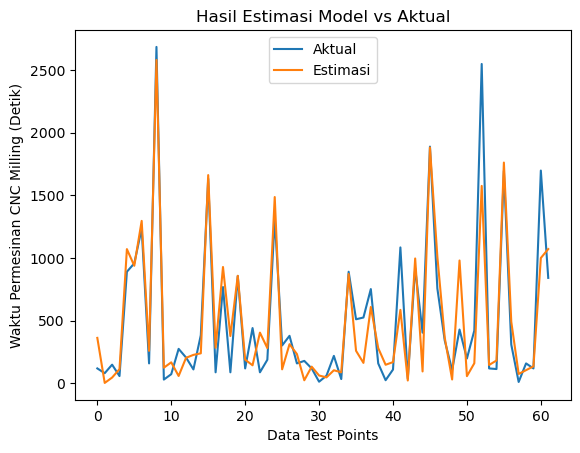

In [103]:
# Plot training and validation loss per epoch
plt.plot(result_nn['Aktual (Detik)'])
plt.plot(result_nn['Estimasi (Detik)'])
# plt.plot(range(40), time_test['Estimasi_Detik'])
legend_drawn_flag = True
plt.legend(["Aktual", "Estimasi"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Data Test Points')
plt.ylabel('Waktu Permesinan CNC Milling (Detik)')
plt.title('Hasil Estimasi Model vs Aktual')

Text(0.5, 1.0, 'Hasil Estimasi Model vs Aktual')

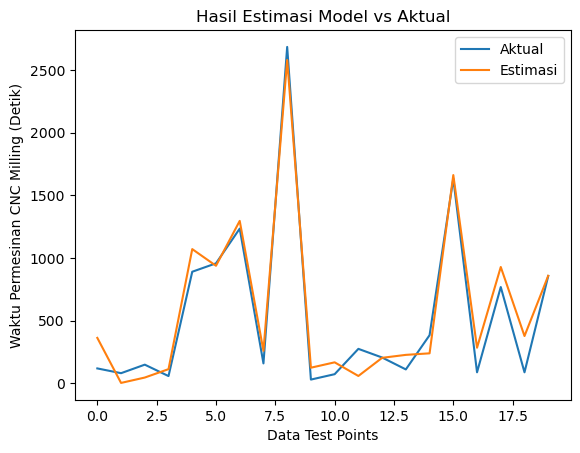

In [104]:
# Plot training and validation loss per epoch
plt.plot(range(20), y_test[:20])
plt.plot(range(20), y_pred_test[:20])
# plt.plot(range(20), time_test['Estimasi_Detik'][:20])
legend_drawn_flag = True
plt.legend(["Aktual", "Estimasi"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Data Test Points')
plt.ylabel('Waktu Permesinan CNC Milling (Detik)')
plt.title('Hasil Estimasi Model vs Aktual')

Text(0.5, 1.0, 'Hasil Estimasi Model vs Aktual')

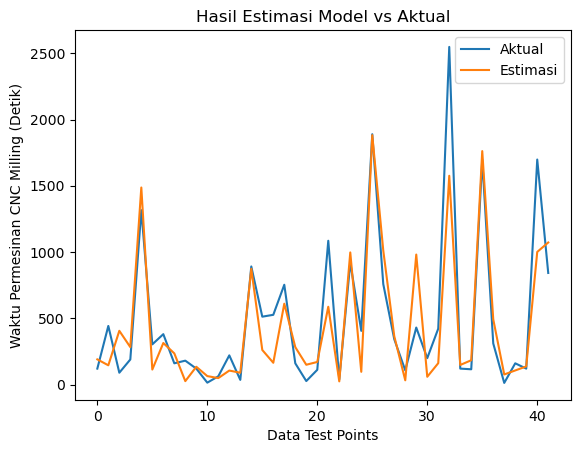

In [108]:
# Plot training and validation loss per epoch
plt.plot(range(42), y_test[20:])
plt.plot(range(42), y_pred_test[20:])
# plt.plot(range(20), time_test['Estimasi_Detik'][20:])
legend_drawn_flag = True
plt.legend(["Aktual", "Estimasi"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Data Test Points')
plt.ylabel('Waktu Permesinan CNC Milling (Detik)')
plt.title('Hasil Estimasi Model vs Aktual')

Text(0.5, 1.0, 'Hasil Estimasi Model vs Aktual')

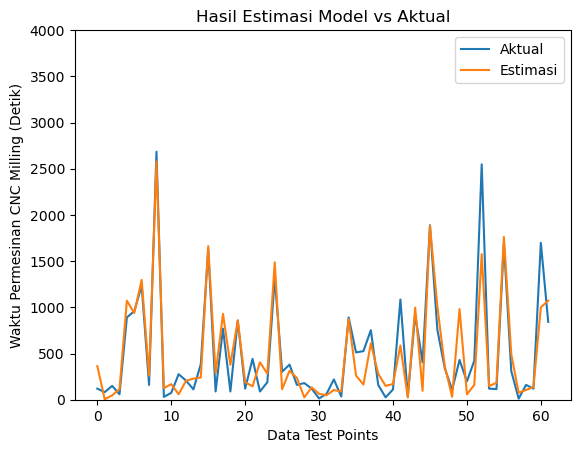

In [107]:
# Plot training and validation loss per epoch
plt.plot(range(62), y_test)
plt.plot(range(62), y_pred_test)
# plt.plot(range(40), time_test['Estimasi_Detik'])
legend_drawn_flag = True
plt.legend(["Aktual", "Estimasi"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Data Test Points')
plt.ylabel('Waktu Permesinan CNC Milling (Detik)')
plt.ylim(0, 4000)
plt.title('Hasil Estimasi Model vs Aktual')